# Sentiment Analysis on Game of Thrones Twitter Data

## Overview
This project aims to showcase how to clean textual (twitter) and perform sentiment analysis.
Data used is obtained through Kaggle - GOT'S8.
By going throught this notebook, one can expect to learn extensive data wrangling on textual data such as stop words removal, POS-tagged lemmatization, regex filtering of text etc and perform sentiment analysis using existing APIs such as *vader* and *textblob*.

## Data Source

Game of Thrones Season 8 Tweets
(https://www.kaggle.com/monogenea/game-of-thrones-twitter)

This dataset contains a collection of tweets captured from 17th April to 28th May 2019, during the airing of Game of Thrones, Season 8.

## Import Packages

In [2]:
import pandas as pd
import re
from collections import Counter
import string
from nltk.corpus import stopwords
from datetime import datetime
from textblob import TextBlob
import pandas as pd
from fuzzywuzzy import fuzz
import seaborn as sns
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
import pandas as pd
from textblob import TextBlob
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

C:\Users\hp\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Clean Data
Please follow the inline comments on specific function of each code line.

In [3]:
# Defining objects
alpha_regex = re.compile('[^a-zA-Z]')
link_regex = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)

# import data
df = pd.read_csv("Tweets data.csv")
df = df.loc[df['source'].isin(['Twitter for iPhone','Twitter for Android','Twitter for Web Client','Twitter Web App'])]

# subsetting tweets and converting to dictionary
text_df = pd.DataFrame(df['text'])
text = text_df['text'].to_dict()

# Creating stop words dictionary
stopword = stopwords.words('english')
stopword.extend(['game','got','thrones','youtube','reddit','got','gameofthrones','1','2','3','4','5','6','7','8','9','10'])
stopword.extend(list(string.punctuation))

# noting start runtime
start=datetime.now()

# cleaning tweets
for key,tweet in text.items():
    
    # removing links
    links = re.findall(link_regex, tweet)
    for link in links:
        tweet = tweet.replace(link[0], ', ')
        
    # convert to lowercase
    tweet = tweet.lower()
    
    # Non-alpha removal 
    tweet = alpha_regex.sub(' ',tweet) 
    
    # Stop words removal
    stopwords_dict = Counter(stopword)
    tweet = ' '.join([word for word in tweet.split() if word not in stopwords_dict])
    
    #Lemmatization
    tweet = " ". join([w.lemmatize() for w in TextBlob(tweet).words])
    
    # Updating text
    text.update({key:tweet})

In [4]:
text

{4: 'mrlegendarius unpopular opinion edition',
 25: 'phil marron toprak tr see moneyglass toome filming behind big wall security wild tight boyd filling station red diesel pump know mean',
 27: 'know talk much phone start autocorrecting',
 28: 'forthethrone season episode spoiler without context',
 29: 'janieblue mydognose misslynnenyc ebonibex shaniceninja grandoftwo bardgal wjm enjoy great selfies cast hanging partying',
 30: 'janieblue grandoftwo shaniceninja mydognose misslynnenyc ebonibex inside love life cast via popsugar',
 52: 'get told look like khaleesi everywhere go',
 53: 'every post see',
 57: 'went dentist morning checking teeth humming theme music loved gamesofthrones',
 86: 'highkey interesting',
 87: 'watched dad oh yeah good rated r cant watch im dad oh yeah dad really see child forever baby huh',
 88: 'okay made first two season far biggest takeaway stannis baratheon pretty much gob bluth right',
 112: 'tomorrow friend named thank gave hbogo password imma watch first

Observation: It can be seen that some words are appearing time and time again and may not be that useful to define sentiments such as episode','snow','stark','know','get' and many others. These words can be removed by extending the existing the stop words dictionary.

In [48]:
# new stop word list based on excel analysis
new_stop_words = ['gamesofthrones','see','episode','snow','stark','know','get','go','let','make','come','take','run','say',
                  'apologize','happen','add','give','keep','believe','identify','find','criticize','remember','pen',
                  'assume','realize','buy','save','keelchamber','apply','follow','disclose','lose','expect','leave','replace'
                  ,'expose','eaten','slow','rave','consider','appear','kraken','settle','elaineerose','recognize','participate',
                  'kindle','enlighten','kristen','remove','allow','rotten','summarize','ostracize','develop','ken','killingeve',
                  'kevinlove','obtain','soar','approve','regretlesslove','reduce','theorize','racilove','relaize','sympathize',
                  'be','do','sexualize','relisten','kianabridget','kitten','internalize','traumatize','karmic','organize',
                  'empathize',	'revitalize',	'runawayyslave',	'kickitrose',	'symbolize',	'socialize',	'instalove',	'rectify',	'improve',	'krysilove',	'tize',	'emphasize',	'roose',	'ensure',	'kristennetten',	'kluber',	'acquire',	'qualify',	'ineedtomove',	'evangelize',	'fountainpen',	'karaapel',	'peoplehappen',	'enslave',	'finalize',	'klkdave',	'dampen',	'succeed',	'keem',	'rationalize',	'ilove',	'impose',	'krish',	'utilize',	'kimber',	'kerrithekraken',	'romanticize',	'kendalllake',	'have',	'kailiave',	'kirsten',	'quantify',	'kagerandle',	'kirst',	'familiarize',	'sharpen',	'kstpsteve',	'revdrdickmove',	'kawaiikeem',	'synchronize',	'pigpen',	'smize',	'failopen',	'establish',	'idolize',	'maximize',	'robbysoave',	'terrorize',	'everyonesinlove',	'kendareblake',	'pippen',	'strategize',	'doesanyonehaveanepipen',	'dearmendarize',	'knave',	'repurpose',	'ewgotprize',	'ebrose',	'kingpoundcake',	'robertmoose',	'kayleycupcake',	'kiddish',	'kamillahrose',	'supersize',	'summerize',	'katieyellow',	'aspen',	'alteredsize',	'demonize',	'ktpencilandpen',	'aplogize',	'kvmalave',	'syonize',	'bullpen',	'puppen',	'redwave',	'khalilsivadd',	'optimize',	'itsshemalove',	'kaimatten',	'redandbluedave',	'epatientdave',	'klose',	'trippen',	'kooliebear',	'krebstlegend',	'reverenddave',	'knsay',	'rosalbaortize',	'sippen',	'minimize',	'specialize',	'konsisten',	'kidsmoove',	'ripen',	'rewritten',	'rooove',	'kahaanify',	'snottiedrippen',	'theologize',	'exemplify',	'klymydear',	'elysabethrose',	'trivialize',	'deepen',	'modernize',	'roblives4love',	'erikafrose',	'willneverhappen',	'makeithappen',	'remooooove',	'extemporize',	'rosieprimrose',	'tokenize',	'escoliose',	'kristykitten',	'otize',	'rapgodrose',	'eopen',	'killeddanysonlyfriend',	'dichotomize',	'rystrave',	'expensify',	'reillycosgrove',	'agonize',	'stabilize',	'kareem',	'epitomize',	'depersonalize',	'keiber',	'kudlow',	'knockedloose',	'krizoken',	'destigmatize',	'kentnish',	'intellectualize',	'kornhaber',	'koduhrose',	'kevinroose',	'kindergarten',	'serialize',	'kentownsend',	'kevinfrankish',	'penpen',	'biggreenpen',	'rickswartznose',	'overcriticize',	'reopen',	'itszerolove',	'desensitize',	'roasten',	'kalelkitten',	'kiddle',	'rattusrose',	'stigmatize',	'dramatize',	'killedthegoldengoose',	'kadoodle',	'whycultshappen',	'decentralize',	'kritiken',	'finimize',	'killakellerflow',	'makesolo2happen',	'overemphasize',	'kimterrirose',	'kristendurst',	'dehumanize',	'ravenvanderrave',	'theopen',	'kwikpen',	'kracken',	'keepsake',	'kingstoken',
                   'going','amp','really','think','called','ramin','djawadi','trailer','day','fuck','fucking','episode','snow','one','season','watch','watching','stark','show','tonight','please','retweet','character','people']

# Extending stop words dictionary
stopword.extend(new_stop_words)

# Stop words and less than 3 characters words removal
for key,tweet in text.items():
    stopwords_dict = Counter(stopword)
    tweet = ' '.join([word for word in tweet.split() if word not in stopwords_dict])
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Updating text
    text.update({key:tweet})

In [49]:
text

{4: 'mrlegendarius unpopular opinion edition',
 25: 'phil marron toprak moneyglass toome filming behind big wall security wild tight boyd filling station red diesel pump mean',
 27: 'talk much phone start autocorrecting',
 28: 'forthethrone spoiler without context',
 29: 'janieblue mydognose misslynnenyc ebonibex shaniceninja grandoftwo bardgal wjm enjoy great selfies cast hanging partying',
 30: 'janieblue grandoftwo shaniceninja mydognose misslynnenyc ebonibex inside love life cast via popsugar',
 52: 'told look like khaleesi everywhere',
 53: 'every post',
 57: 'went dentist morning checking teeth humming theme music loved',
 86: 'highkey interesting',
 87: 'watched dad yeah good rated cant dad yeah dad child forever baby huh',
 88: 'okay made first two far biggest takeaway stannis baratheon pretty much gob bluth right',
 112: 'tomorrow friend named thank gave hbogo password imma first long',
 142: 'good person right looking meme relentlessly',
 143: 'ever stop actually reverse colo

Extract tweets of major characters using *fuzzywuzzy*. I have considered the following 6 as major characters based on a seprate interaction data available at the same data source link as I've mentioned above. But I have referained from showing that analysis here. You can choose any characters of your choice and analyse use this same code.

In [50]:
# major characters
characters = ['jon', 'arya', 'bran', 'daenerys', 'cersei', 'night_king','night king']

# filtering tweets with major characters only
key = 0
character_tweet = {}
for to_match in text.values():
    for match_with in characters:
        if isinstance(to_match, str) == True:
            score = fuzz.partial_ratio(to_match,match_with)
            if score >= 99:
                if to_match not in character_tweet.values():
                    print(to_match,"\t", match_with ,"\t", score,"\n")
                    character_tweet.update( {match_with + "_" + str(key) : to_match} )
                    key += 1

arya sansa scene fan waiting 	 arya 	 100 

back boy ready stan daenerys targaryen 	 daenerys 	 100 

fantastic start final hbogo hbo jonsnow daenerys 	 jon 	 100 

look trying literally care arya everything else boring 	 arya 	 100 

bran last 	 bran 	 100 

underestimating cersei lannister exactly continued win 	 cersei 	 100 

decided hate hurting poor baby arya wonderful ray sassy sunshine behind everyone else like warn sob much 	 arya 	 100 

first much ned needed hide jon rob baratheon hatred targaryens gameofthronesrewatch 	 jon 	 100 

conspiracy theory alternate retelling new testament jon jesus christ 	 jon 	 100 

finale head head battle daenerys drogon cersei dumbo 	 daenerys 	 100 

premiere close arya hound alan sepinwall break final premiere arya reunion former guardian exemplifies calm winter storm 	 arya 	 100 

recap jon still nothing 	 jon 	 100 

took time able tell jon robb apart 	 jon 	 100 

reveal night king identity 	 night king 	 100 

end night king victoriou

walk music edition part daenerys targaryen control janet jackson bronn golddigger kanye west samwell tarly howlin black key 	 daenerys 	 100 

bran worst 	 bran 	 100 

misssp want end knowing ending would easier live asoiaf load ambiguous ending feel like would brand fully satisfying clear end anyway 	 bran 	 100 

night king funko pop 	 night king 	 100 

cupcake yucatan juegodetronos cupcake yucat meridayucatan postres jonsnow khaleesi cupcake 	 jon 	 100 

saw yet another themed wedding already misguided time bride groom styled like jon daenerys dude 	 jon 	 100 

started underwhelming like spoke word play win die middle ground cersei 	 cersei 	 100 

andrewspaduh mismaejones yeah time 	 jon 	 100 

never watched reading clip hey try zeitgeist right lone takeaway basically want arya slit throat 	 arya 	 100 

meme bran jaime stare fergie playing epitome comedy thought tbh 	 bran 	 100 

premiere recap reunion dragon bran always 	 bran 	 100 

heykayadams first john daenerys would b

process premiere realized bran stuck courtyard hodor dead want carry stair 	 bran 	 100 

ask maester rhaegal jon dragon via ringer 	 jon 	 100 

new reign podcast breakdown starks ironthrone daenerystargaryen jaimelannister jonsnow nightking branstark reignofthrones winteriscoming 	 jon 	 100 

first thinking cersei beautiful ugly person lol 	 cersei 	 100 

anybody theory night king lol 	 night king 	 100 

destiny life destiny fan brandiart isa kole thrredaygrace mrmoncus thegammatrap 	 bran 	 100 

sansastark iciness towards daenerys understandable relatable listen review premiere wherever listen podcasts apple link podernfamily 	 daenerys 	 100 

dragonflyjonez thought tweet first confused 	 jon 	 100 

fun listen thanks guy cersei banged euron claim baby leash thinking walking chamber changed mind 	 cersei 	 100 

well known nerd youtuber debut perplexed cersei would sex man hate 	 cersei 	 100 

slimlaydi gray twit pishposhn naiyoopumpey yup jon excuted disobeyed attempted kill 

lena headey originally disagreed cersei sleeping euron indiewire 	 cersei 	 100 

spoiler alert anyone talking arya threatened jon straight face king pretty boy stupid understand nothing jon 	 jon 	 100 

lukejones feel like 	 jon 	 100 

questlove fwmj imagine dmx night king dog grrrrr 	 night king 	 100 

focused set inner conflict course rest danger white walker night king rather flaw humanity end exactly 	 night king 	 100 

politico westeros playbook support cool dany narrative problem cersei ing red via politico 	 cersei 	 100 

night 	 night_king 	 100 

honestly much enjoy thing asoiaf want jon dany happy forever rule westeros 	 jon 	 100 

mgagam supply snack via amazon listed funko arya rock candy vinyl figure official trading card bundle via amazon 	 arya 	 100 

would lot easier decide nice election everyone could wth voting night king 	 night king 	 100 

watched jon finding true heir throne play love banging deanrerys dothraki queen break deanrerys throne hidden 	 jon 	 1

jontbain tweet mannn shuttupppp 	 jon 	 100 

copic marker sketch card daenerys targaryen daenerystargaryen fanart copic art 	 daenerys 	 100 

yea agree well scene become disneyish alladin like ride daenerys jon took would happened book happenstance meeting tormund surviving night member also felt forced 	 jon 	 100 

bran jaden smith phase 	 bran 	 100 

bran king buzzkills 	 bran 	 100 

kind want end daenerys crazy burning everything ground 	 daenerys 	 100 

john become new night king white walker end series 	 night king 	 100 

aight gunna harry potter towards end last year later kinda scene arya gendrys kid sits throne 	 arya 	 100 

yup always count slate bad marry aunt jon might 	 jon 	 100 

bran rus 	 bran 	 100 

bran meme king via nypost 	 bran 	 100 

finally forgot night king dragon lmfao gon die 	 night king 	 100 

could end night king taking iron throne slowly turning ice accept 	 night king 	 100 

included rent brenda kay bryant estate tax write jonathan inc hbopr r

sure conscious choice men written nincompoop sansa jon battle bastard even started tyrion advising dany casterly rock 	 jon 	 100 

never seen idk bran guy love raisin bran meme funny 	 bran 	 100 

literally realized meme something bran seriously thought joke raisin bran 	 bran 	 100 

actually good arya mini reunion brother first crush man left dead emotional rollercoaster 	 arya 	 100 

daenerys main villain owe right along 	 daenerys 	 100 

spoiled ending new thousand googlers posting gif end scene bran jamie google internal meme forum notsorry 	 bran 	 100 

night king message terrifying 	 night king 	 100 

meaning behind daenerys targaryen white coat 	 daenerys 	 100 

jon daenerys dragon riding scene worst hollywood thing ever given dumb hated anything needed chest 	 jon 	 100 

amouranth currently telling fellow fan work last bran waking pushed tower jaime lannister boy hate theory mine 	 bran 	 100 

vivvyyen cersei played best family country anything 	 cersei 	 100 

dating

bran crwepily enters scene 	 bran 	 100 

new edition faceless men else watched last night end finalseason facelessmen aryastark art clay sculping artist artinspo sculptor bronzestatue statue diy 	 arya 	 100 

class youknownothingjonsnow 	 jon 	 100 

ship ship arya gendry emotional family hear cry 	 arya 	 100 

breakneckjones reelprogress npr wbur correct intersection class gender examination violence woman 	 jon 	 100 

wan mute word like bran also wan miss spicy raisin bran tweet feed 	 bran 	 100 

nathanzegura elephant room daenerys jon aunt beaubishop 	 jon 	 100 

contrary popular opinion last night quite first time jon rode 	 jon 	 100 

nickllorente codyljones cover page right 	 jon 	 100 

prediction theon grayjoy sit iron throne end mash avenger jon thanos snap win war helped doctor strange avengersendgame gamefthrones 	 jon 	 100 

thought answer candice asked last night bran around winterfell must ton wheelchair ramp 	 bran 	 100 

jon gon aunt gameofthronesseason 	 jon 

northern kingdom perfect euphemism climate change giving shit meaningless stuff jon literally die unless work together north aint gon lead foreign dragon lady 	 jon 	 100 

may call hylaryous calgaryan gameofthronesseason badhumour jonanddannyskid yyc calgary 	 jon 	 100 

gather twitter named bran like stare 	 bran 	 100 

spoiler bran jaimie reunion like 	 bran 	 100 

brag watched last night bran psycho right like life babe 	 bran 	 100 

inadvertent eye twitch missed premeire tell exactly night king 	 night king 	 100 

happened yesterday arya drogon tyrion taken prisoner brought back cersei jaime threw bran tower daenerys stabbed jon heart everybody thank 	 jon 	 100 

thing night king look like badass frozen darth maul hope win 	 night king 	 100 

never watched imagine bran look like 	 bran 	 100 

enjoyed reading recap morning recap something jon cnn 	 jon 	 100 

best ever change mind gameofthronesseason starks hbo aryastark jonsnow targaryen chapmankiel jjaychap jolleybrandon

adam atx others love idea dany downfall thought would end king two queen cersei already mad queen disappointing simply female contender become mad 	 cersei 	 100 

jonerlichman haha mean course heard never seen hbo 	 jon 	 100 

premiere met kid named daenerys unscripted 	 daenerys 	 100 

message night king try send premiere via ringer 	 night king 	 100 

brand looking deeply autistic last night background every scene staring right last night though shit winterishere 	 bran 	 100 

recap spoiler everyone bran 	 bran 	 100 

top worst bran sister dorne sansa catelyn daenerys top best jaime lannister rob tywin lannister hound wildlings 	 bran 	 100 

bigupstojosh pretty explicitly lol jon daenerys targaryen heat thing via dailymailceleb 	 jon 	 100 

waited almost year final begin man suck waiting another week blue darth maul start messing stuff winterfell brand new zombie ice dragon nightking 	 bran 	 100 

brannanwilliams reviewing many eps finally new dream raven british accent swor

want ever end ugh glad jon though waiting year 	 jon 	 100 

maysbrian jonerys worst ship ever fact aunt helping 	 jon 	 100 

super quirky little centre good interesting kinda random lol kno nerdy good jon agh geek lol good like honestly good 	 jon 	 100 

teaser arya destiny revealed start 	 arya 	 100 

impression seven dink delight sean bean main jon boring joffrey seem nice still everyone name 	 jon 	 100 

fan analysing arya secret weapon design via mashable 	 arya 	 100 

alright watcher question even last night jon danny brother sister cousin aunt nephew never good family tree lol 	 jon 	 100 

darker ramification jon joyride vanity fair 	 jon 	 100 

also holy shit yes perfect amazing bran jamie living 	 bran 	 100 

twitter today bran meme love 	 bran 	 100 

yashr yaaa whatever cersei 	 cersei 	 100 

idiot making big deal first quickly skull crushed mountain cersei smirk sip wine 	 cersei 	 100 

jon cooper thank number jon googled today lightning nhlplayoffs spittinchiclet

dream tommen margaery iron throne moderated sparrow tyrell backing lost wildfire still side cersei army insipid actually westeros lost done fought real 	 cersei 	 100 

wife joe jonas fianc 	 jon 	 100 

wow crazy night king penis 	 night king 	 100 

prediction seven kingdom split allocated respective ruler king landing jon dany north sansa iron island yara casterly rock jaime vale old guy dorne bronn dragonstone davos everyone gon die lol 	 jon 	 100 

heart book man cat cat name garfield man name jon arbuckle 	 jon 	 100 

chelseaperetti brandonwardell itsjakknight dream 	 bran 	 100 

enough start making false promise word stop meaning anything jon king iron throne 	 jon 	 100 

prediction hope opener mad king night king sort targaryen theon greyjoy kill night king 	 night king 	 100 

even dumbo cersei crossover greenlit next hour someone failed job dumbo 	 cersei 	 100 

chrissyteigen altgeldshrugged chiquitagoloco mollyjongfast veephbo schittscreek chrissyteigen cooking craving 

jon daenerys targaryen related via thisisinsider 	 jon 	 100 

lesdoggg saddest thing final live tweet leslie jones 	 jon 	 100 

cancelling important enough every tweet bran whatever name ahead 	 bran 	 100 

great jones much 	 jon 	 100 

bet pull bran coma whole time seeing future ending bullshit 	 bran 	 100 

best reaction jon learning targaryen premiere back 	 jon 	 100 

past eight year finally understood cersei took violently attracted arrogant man aint shit felt 	 cersei 	 100 

reveal cersei golden company important via nypost 	 cersei 	 100 

spolier free daenerys world shining shimmering splendid jon ahhhhhhhh 	 jon 	 100 

greatest ever made try convince otherwise daenerys starks kingofthenorth 	 daenerys 	 100 

look forward hearing lesdoggg commentary almost much look forward lesliejones 	 jon 	 100 

caught allowed talk aside sam jon scene mural man bit weakest produced 	 jon 	 100 

best part arya formed punk band hound brienne played nazi punk battlement winterfell 	 

coffee shop silver lake working bran muffin pun right 	 bran 	 100 

katie allan watched instead brand new 	 bran 	 100 

need arya gendry together like like forget everything else plot line want 	 arya 	 100 

way cersei losing shit getting elephant gon matter point eight idk spent way much time insignificant 	 cersei 	 100 

alright gon repeat elioftheveil saying arya hound may may related cardi probably banned twitter listen instead 	 arya 	 100 

play win die middle ground cersei lannister goodnight folk 	 cersei 	 100 

itsjoey jon daenerys targaryen 	 jon 	 100 

hope ending night king army defeated yet sadly pan throne room cersei sat iron throne smile face slowly turn ice 	 cersei 	 100 

bitch housestark aryastark gon end fightme 	 arya 	 100 

fantasy jon could never afford jacket real life 	 jon 	 100 

hope everyone enjoyed dragon jon winter coming hope good 	 jon 	 100 

arya sam greyworm suing 	 arya 	 100 

damn ruthless gon kill jon fucked 	 jon 	 100 

want dramatic sw

bran guy party tolerate talking pausing time 	 bran 	 100 

slightly behind expected log wall wall dragon pervily dany jon kiss gifs wow guess 	 jon 	 100 

summary cersei lannister spirit animal elephant gameofthronesseason 	 cersei 	 100 

jonerlichman another thing exist interest andsomethingsdontchange 	 jon 	 100 

bran wait old friend 	 bran 	 100 

seeing tweet number bran yet single 	 bran 	 100 

lolacoaster liked idea thought might gendryxarya 	 arya 	 100 

reductive compare version jonathan strange norrell high budget fantasy maybe strange norrell never tried pull train dragon soarin westeros edition poopoo 	 jon 	 100 

hope george martin help solve big writer block jon daenerys fart around magic carpet dragon ride every something serious another smile hug 	 jon 	 100 

broke premiere woke jonah ryan 	 jon 	 100 

jonacuff never heard 	 jon 	 100 

easter stop second aired next week jesus canceled mean copied knight king whole schtick anyways 	 night king 	 100 

spoiler c

happy daenerys 	 daenerys 	 100 

actually referenced pilot mirroring scene robert ned reunited jon family instead memory 	 jon 	 100 

hot edition jon super freaked fucked aunt arya full blown flirt bad self sansa still stuck bitch pretty enough away 	 jon 	 100 

confusing bisexual self jon daenerys 	 jon 	 100 

bran done everyone shit waiting shit 	 bran 	 100 

missing refused literally spent two year growing hair cosplay jon 	 jon 	 100 

listen like laughed hard cersei said wanted elephant daenerys talking sam family like met lunch chipotle murdered 	 daenerys 	 100 

set arya killing night king way girl arya 	 arya 	 100 

jonacuff 	 jon 	 100 

jon reuniting arya sweetest moment 	 jon 	 100 

course jon arya reunion wanting year 	 jon 	 100 

worst case scenario arya end dead cercei end throne 	 arya 	 100 

prefer fame david jones aka david bowie 	 jon 	 100 

sanaa probably cersei equal playing thought gon meet dany gon copacetic hard enough time accepting brother ruling alo

aka everyone love arya 	 arya 	 100 

jonknows 	 jon 	 100 

norse mythology theory turning true brann odin 	 bran 	 100 

awesome jon truth forthethrone 	 jon 	 100 

back life meaning arya best 	 arya 	 100 

thing yelled premier look gershwin dragon cant everyone along live time jon time owe minute 	 jon 	 100 

spoiler bran night king 	 bran 	 100 

spoiler ant man small crawled night king butt killed getting huge 	 night king 	 100 

absolutely loved connection first arya little boy 	 arya 	 100 

excited jones sjsharks back ready vega golden knight 	 jon 	 100 

cut arya sansa 	 arya 	 100 

first complete question fuq moving bran around 	 bran 	 100 

first premiere confidence arya favorite eyebrow 	 arya 	 100 

realllly feel like missed partnership oppurtunity andme jon lineage revealed 	 jon 	 100 

omg first intense even hbocanada need four minute jamie bran 	 bran 	 100 

since start cliffhanger ughhh wanted brann jaime confrontation 	 bran 	 100 

spoiler need whether sans

hereee jamielannister cerseilannister tyrionlannister 	 cersei 	 100 

start ahhhhhhhhhhhhh soexcited winterishere yes destroycersei everything else wait daniispregnant prediction 	 cersei 	 100 

mrmacdonald msnbc nbcpolitics next guess night king already lead zombie army ruin everything touch leader dems shoe 	 night king 	 100 

want night king win hodor back life iron throne 	 night king 	 100 

winterhascome teamdaenerys 	 daenerys 	 100 

winter gameofthronesseason jonsnow 	 jon 	 100 

done new sex scene thanos jon little gratuitous killed spiderman nothing stare talking least hillary clinton around 	 jon 	 100 

duma play win die oreo always win teamarya 	 arya 	 100 

letsgoooo jonsnow 	 jon 	 100 

back baby shit jonsnow daenerys aryastark tyrionlannister sansastark jaimelannister 	 jon 	 100 

yes last prediction night king dick 	 night king 	 100 

drinking actual branded dornish red wine premier hell yeah 	 bran 	 100 

screwed death pool arya slay night king preparing who

favorite thing jon daenerys fated together related 	 jon 	 100 

thunder storm knock power exactly brand 	 bran 	 100 

care daenerys gendry brienne tormund ghost 	 daenerys 	 100 

honestly night king better win 	 night king 	 100 

mrsundaymovies rey palpatine kylo getting together like jon dany palpatine anakins father 	 jon 	 100 

fall white wind blow lone wolf pack survives representing girl favorite wolf alive sheep never safe ready sansastark aryastark 	 arya 	 100 

nice gworkout night king kill everyone 	 night king 	 100 

minute excited also love daenerys 	 daenerys 	 100 

favorite thing look foward told bran walk would fly maybe gon posse dragon 	 bran 	 100 

norbert thought daenerys played cardi cersei julie andrew 	 daenerys 	 100 

last crazy theory uncover spaceship decide westeros white walker crash land lush planet place jon call earth 	 jon 	 100 

prediction spoiler warning daenerys another dragon order beat ice king dragon jamie kill cersei jon sit top throne en

bran oren park rec 	 bran 	 100 

okay new question cersei actually preg long bran wait tell jon aunt arya kill first also 	 jon 	 100 

waiting ifdaenerysdiesweriot 	 daenerys 	 100 

minute premiere jon need way winterfell beach landed dany ship captain dem horse inna back 	 jon 	 100 

anyone trolling ask westeros experience eye average person accomplish importantly jon failing upward 	 jon 	 100 

night king win story ice age started demthrones 	 night king 	 100 

found mini khaleesi park turned dragon stone rode gon winteriscoming motherofdragons dragon khaleesi daenerystargaryen nerdingout 	 daenerys 	 100 

watched arya scene last prepare 	 arya 	 100 

hope everyone spoiler free night except ship jon sansa together 	 jon 	 100 

prediction winner daenerys house targaryen shocking death jaime lannister sansa biggest difference maker bran somehow alive cersei lannister 	 bran 	 100 

wish final arya hunt everyone list kill end 	 arya 	 100 

else jon winning housestark housetarg

gon air air hope land tweet saying night king dragon cooked daenerys stick jon workin prison camp north pole 	 jon 	 100 

tbt happy aryastark gameofthronesday 	 arya 	 100 

prediction tyrion betraying daenerys varys key lord light brandon ride dragon control dragon wrong prob delete later lol gots 	 bran 	 100 

bold prediction daenerys targaryen learns actually daenerys garcia woman named daenerys cuban 	 daenerys 	 100 

shawhelp quick example emojis work branded icon attached hashtags user pic random load picture post loading wifi lte fine 	 bran 	 100 

cersei lannister favorite entire saga perfect villain still somehow inspires empathy frankly would without nobody ready talk 	 cersei 	 100 

play win die cersei cersei winterishere forthethrone 	 cersei 	 100 

ready whose side team cersi team daenerys team whitewalkers winter gameofthronesseason winteriscomong teamtyrion tyrionlannister jonsnow aryastark 	 jon 	 100 

wendyshepherd hope reunion arya jon first waiting scene long 

internet thesis long theory corroborating evidence night king dick icicle breaking 	 night king 	 100 

hot white walker end winning killing human also night king metaphor global warming 	 night king 	 100 

honor check recent article jonsnow nightking aryastark lannister tyrion dragon winterishere fantasy kitharington khaleesi jasonmomoa peterdinklage hbo 	 jon 	 100 

kinda love took quiz black panther daenerys targaryen yeah complain 	 daenerys 	 100 

unrealistic hope final flashback battle trident via bran vision hound becomes azor ahai ned alive along disguised jaqen ghar hot pie something clutch 	 bran 	 100 

classic lol queen white privilege headed ball black army nephew jon convinced poor white redneck wilding fight starks 	 jon 	 100 

worst part shitty brand trying capitalize hype 	 bran 	 100 

wan although house death gon stroke jon throne instead daenerys throne 	 jon 	 100 

happy jonsnow kinginthenorth 	 jon 	 100 

house carbs jojo aron jonlovett 	 jon 	 100 

back ba

hope improved quality since scene magical poop faerie said created night king choice like great pop benoiff wei trash still gon drink 	 night king 	 100 

late january jones toss hat ring 	 jon 	 100 

friend jonsnow targaryen 	 jon 	 100 

everyone bran right analysis jon kind worst also kind best washington post 	 jon 	 100 

cried time already today jon probably arya cry best sunday ever 	 jon 	 100 

right thing night king white walker whole win 	 night king 	 100 

acouple hour freaking send help bout outside naked sprayed jon left cheak right cheak 	 jon 	 100 

listen jon clearly access suite hair care product available medieval time actually set several thousand year future 	 jon 	 100 

open night king marching forward destruction background pose stoically patrick reed place green jacket shoulder 	 night king 	 100 

agree never live expectation especially read book cause way near good book great though good book bad guy win way grayjoys cersei rule 	 cersei 	 100 

final pred

hopefully arya kick 	 arya 	 100 

wait jon kiss auntie 	 jon 	 100 

wait jon stupid decision like always 	 jon 	 100 

capehartj amjoyshow neither jonathan 	 jon 	 100 

cersei lannister best female also bold daenerys wont eventually become worse cersei mad queen 	 daenerys 	 100 

old still arya scott tetterman walter frey gameofthroneseve imadeyoueatyourparents imadeyoueatyourkids 	 arya 	 100 

reflecting difference premiere eagerly buying whole food bottle branded beer premiere everyone like grunt drop ship normandy side brother 	 bran 	 100 

big prediction golden company gon led jilted daario naharis jon gon kill unfairly attractive 	 jon 	 100 

long wait back jonsnow 	 jon 	 100 

finally anything happens arya talk year 	 arya 	 100 

picture bff autumn aka daenerys targaryen prom else excited 	 daenerys 	 100 

unlike jon thing thing conquered reversing singly linked list place time fight doubly linked list obviously daysofcode 	 jon 	 100 

excited new finally prediction en

messed thought jon dead 	 jon 	 100 

today till end muting following word dragon jon queen goat khaleesi danaerys tagerian wolf arya sansa baratheon cersei etc 	 jon 	 100 

spoiler jamie die arm woman love cersei arm brienne tarth 	 cersei 	 100 

final officially would arya win olympic night king jon teamcanada thought 	 jon 	 100 

look brand love love purchase product 	 bran 	 100 

cooked bought wine selection time watythe love die gameofthronesseason jonsnow winteriscoming 	 jon 	 100 

brand police must working overtime today 	 bran 	 100 

happy jonsnow 	 jon 	 100 

theory reading book matter jon stand 	 jon 	 100 

unpopular opinion end night king victorious 	 night king 	 100 

back bullshit want none tryna call text ignored cussed mfn time act brand new bitch 	 bran 	 100 

jonahnro benshapiro problem misande greyworm straight compton 	 jon 	 100 

woo hoo long darkness finally end final start cersei lannister told edward final confrontation play win die middle ground 	 ce

need mute jon khalesi etc live 	 jon 	 100 

master sunday sunday night king green jacket 	 night king 	 100 

dream scenario ice drag kill sam gilly ice drag kill theon min direwolf footage replay cat dying motion min melisandre brushing hair daenerys acting class 	 daenerys 	 100 

happy may daenerys stormborn house targaryen first name unburnt queen andals first men khaleesi great grass sea breaker chain mother dragon rightful place iron throne 	 daenerys 	 100 

black panther daenerys targaryen everyone combo marvel 	 daenerys 	 100 

men must die men daenerys targaryen dayproject strongfemalecharacters pencildrawing blackwing portraitdrawing drawing art daenerystargaryen asongoficeandfire artist illustration 	 daenerys 	 100 

predication series end may gameofthornes prediction gameofthronespremiere gameofthronesseason lannister aryastark branstark nightking 	 arya 	 100 

brandonhonaker forget 	 bran 	 100 

happy friend fan brand excited enjoy 	 bran 	 100 

feel like christmas 

nerd night king want kill everything much cold long want kill 	 night king 	 100 

theory bran three eyed raven right updated 	 bran 	 100 

brand tbh captain america jon 	 jon 	 100 

caught today main takeaway envious jon butt 	 jon 	 100 

listen barr trump like cersei ned letter signed king robert care piece paper playing trying honorable honor ned killed 	 cersei 	 100 

joesplurge lol trust everyone love arya everyyyonnneee hate happy ending happy like love dany love jon probably die probably fight upset 	 jon 	 100 

arya best part change mind 	 arya 	 100 

last dany cersei pregnant brother kid kid marry bring peace world somethin like 	 cersei 	 100 

six first time truly seems like arya arc discovering want become actress 	 arya 	 100 

end tried ready fell short tomorrow care sits iron throne want jon finally something 	 jon 	 100 

caitpilk husband binge watched first week good wait tomorrow night jonsnow 	 jon 	 100 

black widow arya basically thing 	 arya 	 100 

sleep t

nkrhing content next week may well unfollow bye yah house support cersei lannister claim throne none 	 cersei 	 100 

last cookie standing turned night king westeros screwed 	 night king 	 100 

bookmaker jon favourite rule westeros end intellectual night king sit iron throne grrm weird like representation modern society something 	 jon 	 100 

jon sansa reunion best thing 	 jon 	 100 

odds bran favored finish iron throne via espn app 	 bran 	 100 

thing shit yet feel need tell others vegan sad bacon jon life live loser 	 jon 	 100 

gabbyhdez lauren ortego professor hernandez april cersei suck bitch work cited wei david benioff apr 	 cersei 	 100 

german totally odds danerys dying tyrion cersei craxy sansa double fittentrim doorpodcast winterfellpod doublephq survive 	 cersei 	 100 

ready tomorrow like hot right okay well waiting cersei win mother lion lost cub time flawed 	 cersei 	 100 

air sunday april daenerystargaryen jonsnow tyrionlannister aegontargaryen jonerys kitharring

jon actually targaryen mean house follower final fealty stand cuz obviously repping house cuz jon 	 jon 	 100 

black panther daenerys targaryen everyone combo marvel black panther daenerys targaryen 	 daenerys 	 100 

prediction end podrick night king good white walker back life pledge loyalty king 	 night king 	 100 

first set hbo via gots kitharington sophieturner iainglen emiliaclarke jonsnow sansastark greyworm serdavos branstark jorahmormont blink miss iain glen daenerystargaryen hair 	 jon 	 100 

kit harington prop collection min via jorahmormont housemormont longclaw iainglen kitharington daenerystargaryen 	 daenerys 	 100 

already started madness bracket still time forthethrone marchmadness bracket jonsnow cerseilannister daenerystargaryen aryastark sansastark tyrionlannister jaimelannister winteriscoming 	 jon 	 100 

weekend gameofthronespremiere fireandice jonsnow 	 jon 	 100 

mute content brand 	 bran 	 100 

djayc canadensismax agreed many cite ridiculous detail cerse

tsakurawataame gamerkraytos greatsaiyaman wrytersview sethtrav fromthecribbed thefearmerchant kreepazoidkelly vanbiztherapper mffhorrorcorner geekwiththat robdimension podcast retroboyjon gamerheadspc playjaksayback prawntast retrogifmonster kirk arcade radzero smaniax kuniotchi roguew bitp xelz sakihaze kingdomofcarts chiffon lime top battlestar galactica file ncis star trek tng walking dead stargate doctor knight rider sanford son team seaquest dsv firefly supernatural chuck bigboss mph ejfanatic wingzer pteravictoria jayklook 	 jon 	 100 

jonmarksmedia wire everything depends finale cause suck like soprano may wire soprano ttied 	 jon 	 100 

ser davos greatest hype man hyped john daenerys john mormonts stannis iron bank fermented crab city guard legend gameofthronesrewatch 	 daenerys 	 100 

minute rewatching already reminded annoying bran 	 bran 	 100 

amyjones speak 	 jon 	 100 

dream last night cersei died giving birth dwarf need 	 cersei 	 100 

jonmarksmedia wire soprano ma

fan level weirdness like someone business liking except fan jon heck even jon questionable finger crossed 	 jon 	 100 

filled death pool finally put stake ground cersei survive must 	 cersei 	 100 

nadie absolutamente nadie arya mejor personaje change mind 	 arya 	 100 

first final start jon rolling bed smashing mother dragon saying want juice bust tbh 	 jon 	 100 

prediction sansa win throne bran dragon fight night king jon 	 jon 	 100 

getting excited final curious favorite jonsnow houseoreo daenerystargaryen nightking forthethrone 	 jon 	 100 

far used final return anticipated event television history experiment cobranded advertisement check note peanut mountain dew 	 bran 	 100 

almost hear sure rewatched research refreshed mind like prepared love like daenerys jon tyrion die epic wait 	 jon 	 100 

thing hope happens final maybe important thing even end iron throne end thing want arya kill melisandre 	 arya 	 100 

last time passionate something tiger beat jonas brother pos

cersei big line play win die middle ground probably mean lot couple month 	 cersei 	 100 

finished first time holy crap night king 	 night king 	 100 

prediction starks part white walker jamie jon azor ahi white civilized human broke agreement spin essos year depression 	 jon 	 100 

easily best hope end throne sniveling little whiner jon 	 jon 	 100 

rewatching nothing boring arya many faced god story 	 arya 	 100 

tbt meeting finn jones seeing dress wait sunday start 	 jon 	 100 

okay prediction thought want gendry arya throne tyrion end honestly even bad 	 arya 	 100 

soyacide good best arya 	 arya 	 100 

brandongamedev yes cite star trek deckbuilding example though fair could example overly complex rulebooks rather 	 bran 	 100 

gameofthornes cerseilannister prophesies witch happened far would include without meaning something end karma biiiitch bye cersei 	 cersei 	 100 

deleted scene night king silently signal deadliest warrior kool aid man step forth eye glowing blue ko

ancagene also mind arya totally better bran 	 arya 	 100 

happy captain america jon everyone combo marvel captain america jon 	 jon 	 100 

friday islander playoff saturday brantley gilbert sunday buckle folk 	 bran 	 100 

away lyanna left daenerys targaryen right 	 daenerys 	 100 

nothing understood reference captain america jon 	 jon 	 100 

anyone would like podcast sunday hit ton hot may surprise apology want cersei continue rule seven kingdom westeros great houselannister 	 cersei 	 100 

brandikhou agree smart home device silly time also shying away could never appeal 	 bran 	 100 

arya tyrion literally 	 arya 	 100 

back sunday nfldraft week excited kinda crazy went release title must telling farewell cersei 	 cersei 	 100 

okay rewatching arya killing house frey still badass thing ever 	 arya 	 100 

breevintage yeah unfortunately true fashion jon may die coin cersei tyrion 	 jon 	 100 

viewer pick cersei lannister likely die premiere genpop 	 cersei 	 100 

mother actua

agree favorite cersei win paying attention wait wildfire king landing saying already used ton blackwater even blow great sept 	 cersei 	 100 

drewtmitch back desk google lunch daenerys peter dinklage 	 daenerys 	 100 

went little bit theory rabbit hole yeah long story short hot pie night king 	 night king 	 100 

biggest spoiler final everything bran recast box cereal 	 bran 	 100 

end jon dying cutting ygritte cave pissed 	 jon 	 100 

marry kill edition sex ygritte marrying daenerys definitely killing cersei lannisters die 	 daenerys 	 100 

accurate captain america jon 	 jon 	 100 

top doa particular order olena tyrell arya sam tarly ramsey bolton tyrion lannister def squeeze brienne tarth tormund hound losing hodor still sting bye 	 arya 	 100 

jonas brother post malone song wow love 	 jon 	 100 

rewatching god damn something way daenerys burn alive dragon 	 daenerys 	 100 

cersei baddest bitch shit global level name dont mine aint single family belief name embodiment beef b

conspiracy theory jamie lannister indeed azor ahai prince promised reborn salt smoke kill night king lightbringer kill cersei 	 cersei 	 100 

asap rocky excuse night king problem 	 night king 	 100 

gracias supongo black panther daenerys targaryen 	 daenerys 	 100 

joshmikeking arya 	 arya 	 100 

cross promoting personal brand 	 bran 	 100 

itzmcdonaldfor valid theory song ice fire book become shallow never deep jon fulfillment every male related prophecy 	 jon 	 100 

catching agpobanz taylor may deadass spoiled jon real dad watched thought seen already 	 jon 	 100 

want arya would actually messenger deliver severed head around kingdom 	 arya 	 100 

end jon fixing cholera read wikipedia page 	 jon 	 100 

maybe rebrand deeply affordable housing swag maybe finally 	 bran 	 100 

finally caught honestly feel gameofthones jonsnow daenerystargaryen 	 jon 	 100 

absence lord gentle lady fore commenced journey bingewatchington daenerys house targaryen khaleesi darthraki sit upon iro

cherylanneny explains cersei lannister lewks bright femme beginning turts war present aesthetic 	 cersei 	 100 

mckennaconor imstilljon rickmoffat agree call flame avalanche series theplayoffsarecoming 	 jon 	 100 

brand experiential ahead finale great read friend kdhultgren happened feature forthethrone 	 bran 	 100 

well beyond accurate hela cersei lannister 	 cersei 	 100 

favorite mine cersei lol 	 cersei 	 100 

accidentally confidently walked block wrong direction preoccupied thinking snarky tweet hate admit astonishingly brand 	 bran 	 100 

jemelehill person hold throne scheming seems like brutal cersei hold throne dragon 	 cersei 	 100 

baitfacenate daenerys hell need head spike cersei want dead need justice jon much happy ending though mind battle heart want tyrion win somehow 	 jon 	 100 

black widow arya yeah check 	 arya 	 100 

sleep boy jon slept 	 jon 	 100 

fan supporting jjon war white walker lebanon 	 jon 	 100 

seriously considering naming first daughter ary

dream aquaman jason momoa version married daenerys dragon also daughter cartel bos trying kill fighting goon also mormon 	 daenerys 	 100 

interesting theory littlefinger still alive littlefinger trick arya via 	 arya 	 100 

rewatching reaffirmed arya coolest arc 	 arya 	 100 

consistent thing point commitment attention detail costume especially cersei never ending need emulate father wardrobe reflecting lack autonomy matter powerful 	 cersei 	 100 

okay snl skit franchising hard like star war good cartoon version arya adventure lol 	 arya 	 100 

seriously thinking ordering shirt amazon cause legit anything else youknownothingjonsnow 	 jon 	 100 

night king tragic endured many hardship including humanity ripped yet still proven wiser night king misunderstood support win ted talk 	 night king 	 100 

brand new hard cover copy signed incredible george martin 	 bran 	 100 

awesome captain america jon 	 jon 	 100 

dog walker said dog human fictional arya mean 	 arya 	 100 

deshock

biggest question arya dyke nah 	 arya 	 100 

like long arya list 	 arya 	 100 

brandon hand worst change mind 	 bran 	 100 

particularly care jonas brother music since mention bite 	 jon 	 100 

hope end bran waking fall first dream tripppppp 	 bran 	 100 

arya mulan everyone combination disney princess arya mulan 	 arya 	 100 

night king marked year inspired gear main 	 night king 	 100 

jon sansa 	 jon 	 100 

rewatching realizing lot thing missed cersei king robert child killed baxide 	 cersei 	 100 

suckersforjonas knew dated joe mean 	 jon 	 100 

gon sicko mode playing john fighting night king 	 night king 	 100 

screamed realized joe jonas referenced cool 	 jon 	 100 

daenerys badass spoiler still caught 	 daenerys 	 100 

hate fact nothing night king end throne human die wild 	 night king 	 100 

daenerys targaryen cosplay wig khalee amazon gon need someone remind need 	 daenerys 	 100 

jonathanlittle tanakh rabbi might made girl dragon tattoo hobbit life ivan denisov

seriously need talk someone mean seriously bran jaime hello 	 bran 	 100 

today year old found girl play sansa dating joe jonas 	 jon 	 100 

tbh seeing meme bran fact raisin bran start 	 bran 	 100 

arya jon moment premiere worrying wrote line smartest person arya arya forgotten butcher son friend killed tool sister 	 jon 	 100 

night king stop clue targaryen jon dani nightking 	 jon 	 100 

guarantee jon forced kill danaerys stabbing thru heart defeat night king fulfills azor ahai prophecy currently line claim throne sits tilly baby actually mance rayder wildling king 	 jon 	 100 

walk music edition part iii euron greyjoy man killer red woman celebrity skin hole jon happy rain garbage 	 jon 	 100 

jon hud afrokobe crazy like genre reason even looked commercial lol 	 jon 	 100 

jonahreads bro rly spoil 	 jon 	 100 

last sec best part bran tell 	 bran 	 100 

prediction ghost betrays jon lex luger stylez join nwo err night king jon trade rhaegal 	 jon 	 100 

kilo meter jon kill

theory heard yet bran wargs jon fulfill azor ahai jon bran meant jon said man bran responded almost 	 jon 	 100 

also idk everyone like omg jon screwing aunt like hunney might well call incest targaryens targaryens always marry bloodline pure ahdksksl 	 jon 	 100 

jonacuff honestly still trying figure fit family time around 	 jon 	 100 

bran fully meme bad 	 bran 	 100 

george lucas helped direct jon fan 	 jon 	 100 

plastiquetiara spread fandom nothing thronies talk fight night king google 	 night king 	 100 

finally saw new bran pretty much lurks stare 	 bran 	 100 

polillitam oldtiredfeminis hbo tell real life night king kill meme via theroot 	 night king 	 100 

rotll oldtiredfeminis hbo tell real life night king kill meme via theroot 	 night king 	 100 

oldtiredfeminis hbo tell real life night king kill meme via theroot 	 night king 	 100 

prediction ending jon ultimatum either kill bran simultaneously night king kill daenerys ignite sword kill wierwood tree chooses kill 

sudden hate cersei want iron throne since tried play win die respect 	 cersei 	 100 

lunisemarquis redjune putain fin sait qui est night king 	 night king 	 100 

coworker work talk theory arya kill cersei calling 	 arya 	 100 

suck gambling sport new thing prop bet like cersei boob ever shown final szn stuff like dat 	 cersei 	 100 

still good need kill jon daenerys dragon first minute next spend rest series escalating devious scheme cersei tyrion varys 	 jon 	 100 

bran premiere jenna marble juliensolomita 	 bran 	 100 

lot debating end long bitch cersei absolute worst death imaginable preferably killed jamie end however happy 	 cersei 	 100 

dad trying ruin jon raped dragon split two never trust giant lizard yeah great bare mind 	 jon 	 100 

plan bank holiday weekend boy pub first town back gaff clock morning big bag jon 	 jon 	 100 

listen brand new comeback starwars podcast gamers videogames 	 bran 	 100 

fan certain night king targaryen however targaryen symbol created h

best woman jon 	 jon 	 100 

bradlindensocal omg started mean night king sent kitty might queen 	 night king 	 100 

arya gendry end together cute imma fight arya man win die rule murder 	 arya 	 100 

mom trying explain daenerys mom flying lizard bird pretty 	 daenerys 	 100 

jonlovett ever considered playing jon eventual broadway musical 	 jon 	 100 

listen sing daenerys targaryen dragon smule sing 	 daenerys 	 100 

cersei tyrion lannister meet sesame street muppet double via mashable 	 cersei 	 100 

well cast daenerys dragon via 	 daenerys 	 100 

would end author jon win war losing everyone love reject title king burn iron throne ride summer rhaegal back live widling free folk writerscommunity 	 jon 	 100 

night king explained spiral message mean via nypost 	 night king 	 100 

premiere would lot interesting watched seth meyers leslie jones via huffpostent geez lesliejonesweb latenightseth laughed til cried outrageous thx 	 jon 	 100 

hold dragon roar spoil war battle scene l

everyone else could die happens happy ending aryastark gameofthornes 	 arya 	 100 

thexaxix yojonez thinking 	 jon 	 100 

prediction night king face cersei cersei safe behind sir gregor however night king sir gregor already technically dead control end cersei 	 cersei 	 100 

joejonas sophiet celebrating survival trip mourning death yes two option pick love enjoy trip 	 jon 	 100 

branka jovic need march though street yelling shame shame however clothes 	 bran 	 100 

leslie jones pitch reboot seth meyers unpacks jon daenerys familial bond via tvline 	 jon 	 100 

writer open night king sigil actually mean 	 night king 	 100 

theory video past dream lately jon dany killing lmfao 	 jon 	 100 

mebaker also cersei tyrion 	 cersei 	 100 

viewer mind debut dany jon must die dragon riding scene important cersei baby reliance bran whether night king skip winterfell straight king landing instead 	 jon 	 100 

logesfurey davidneumaier sabre inefficient jousting sword even arya needle hbo 

last hour half brandon playing computer singing theme song 	 bran 	 100 

decided time said bts twt prince pop daenerys step aside 	 daenerys 	 100 

curiouswithjvn jvn dows aria need carry face deceased mimic mimic jon seeing died love completely jvn 	 jon 	 100 

laurajean att according last first book jon mother lyanna married raegar targaryen hate spoil need catch read several place online want 	 jon 	 100 

point journey arya coolest tyrion cant wait joffrey better good theons dumb sister badass seems like ppl daenaris learning experience still formative dragon 	 arya 	 100 

daenerys reaction jamie lannister excited seeing upcoming 	 daenerys 	 100 

jon tyrion cripple bastard broken thing 	 jon 	 100 

fan fan listen taking poll main killed next daenerys jon tyrion sansa arrya jamie lannister cersei ser davos samwell tarly continued 	 jon 	 100 

imagine would last year cersei played gillian anderson lena headey great 	 cersei 	 100 

trying khaleesi daenerys sister person 	 dae

luiscarlos todo cambio para daenaerys saber verdad jon recuerden win die 	 jon 	 100 

arya smash everyone disgusted trump 	 arya 	 100 

maisie williams discus arya surprise gendry scene entertainment weekly 	 arya 	 100 

forgottensloth gon agree actually long term reward actively seek power normally want power rewarded boy jon main man 	 jon 	 100 

honestly pretty brand air easter literally devoted celebrating man rose dead 	 bran 	 100 

time put feeling bit throw death way also end humble dany jon 	 jon 	 100 

ruining want bby arya sex scene 	 arya 	 100 

next gone crazy night king pulling shooting sight 	 night king 	 100 

jen heydt expected arya major always felt chance end without cashing built tension gendry since met weird tbh 	 arya 	 100 

author george martin planned romance jon arya 	 jon 	 100 

halftime thunder surprised noticed princess bride crossover blacksmith told arya wish last epsiode gon hook 	 arya 	 100 

never thought would rooting favor incest became fan

lot grossed arya little sister little sister murdered dozen arya thepointyend 	 arya 	 100 

fighting night king able sleep 	 night king 	 100 

okay thought next week blood fest said goodbye several love tormund giantsbane arya 	 arya 	 100 

arya hold sword 	 arya 	 100 

second wish last arya double sided dragon glass weapon hand running battle nymeria pack wolf 	 arya 	 100 

need bran dead khaleesi touch boy jon jump kick avenger hype hype much handle 	 jon 	 100 

chrishansen watched arya fam 	 arya 	 100 

musical feat jon ramsay tyrion lannis via hand best thing television everrrrrr gameofthronesseason gots 	 jon 	 100 

name arya gendry hand talkthethrones 	 arya 	 100 

damn jon terrible timing also blue balling world jonsnow daenerys nightking branstark hbo hype 	 jon 	 100 

thank stretching everything jon found truth last week told daenary week great 	 jon 	 100 

night king icy viserion dragon funko pop glow dark vinyl nightking 	 night king 	 100 

savage bran looked fut

difference teen adult style gendry arya making crypt nemesis approach adult sitting around talking life path beautiful big room 	 arya 	 100 

arya sansa john greyworm literally anyone stop mean 	 arya 	 100 

seeing arya sex making uncomfortable feel like little sister saw grow 	 arya 	 100 

sexualizing arya wtf 	 arya 	 100 

aryastark gameofthronesseason 	 arya 	 100 

arya like rudy demthrones 	 arya 	 100 

jonxsam thanks helpful 	 jon 	 100 

arya finna mute speak tweetin 	 arya 	 100 

well confirmed theory last week jon definitely hotter 	 jon 	 100 

quebrando tabu 	 bran 	 100 

gameofthornes arya gendry finally together realise die since 	 arya 	 100 

gave content deserved yes arya 	 arya 	 100 

fucked weird arya scene god damn 	 arya 	 100 

easter miracle would cersei falling pit hellfire 	 cersei 	 100 

shown gruesome murder torture incest etc nothing made feel uncomfortable arya sex scene 	 arya 	 100 

basically super dark ominous romcom multiple intersecting story 

jon daenerys flying anyone ever watched 	 jon 	 100 

want destroy wheel rolled everyone rich poor benefit cersei lannisters world love ewarren article read share 	 cersei 	 100 

elizabeth warren fan world need cersei lannisters via mediaite 	 cersei 	 100 

rewatching ned tell jon next time talk jon mom break heart jon never hear 	 jon 	 100 

favorite part white walker night king nigga cold blooded gangsta kind shit never word 	 night king 	 100 

jon love island gon win 	 jon 	 100 

jaime bran encounter might change end bustle 	 bran 	 100 

message night king sending poor undead ned umber internet favorite theory horrifying moment 	 night king 	 100 

jon ever used arya twice narrator used bit 	 jon 	 100 

night king heading winterfell unleash great evil hidden away crypt popular fan theory six 	 night king 	 100 

seems contradict ride dragon jon joy ride huge clue parentage 	 jon 	 100 

thisgrayarea loved tony cameo huge clue descendent starks huge clue defeat night king via 

night king spiral mystery officially solved 	 night king 	 100 

previously jaime lannister bran first time since jaime pushed window 	 bran 	 100 

prediction arya gendry end queen king end robert barathean quote ned beginning prophecy little wrong kid 	 arya 	 100 

course slim chance night king army white walker zombie could defeated assembled hero battle winterfell look long tough brutal anything escape westros essos still 	 night king 	 100 

rewatched finished last night kinda theory daenerys vision walking destroyed red covered 	 daenerys 	 100 

quick morning session ahead busy afternoon night online queen progress series drawing cerseilannister 	 cersei 	 100 

forbes night king spiral mystery officially solved via googlenews 	 night king 	 100 

mom exclamation kind sick gem could kill jon jon risen happyeaster 	 jon 	 100 

stitchedupheart love jon aegon dany rule together gon least big death 	 jon 	 100 

living life weekend visitlindsborg room named winter lisa tired sayin

finally starting new wait bran meme 	 bran 	 100 

based reaction arya sex last night guessing lot maisie williams twenty 	 arya 	 100 

arya grown woman finally getting satisfaction 	 arya 	 100 

another shocking plot twist turn want arya sideboob 	 arya 	 100 

ayo realized pre apocalypse party like prime sxsw brienne knighting fader fort arya bailing hound boy patch whatever shit band opening event whole food parking lot 	 arya 	 100 

start joffrey bitch nigga lord like cersei trifling feel bad sansa little rude wanted wifey 	 cersei 	 100 

true crypt safe eyed raven vision anything happens jamie full permission throw window gots demthones aryastark samandtilly 	 arya 	 100 

death count predictor next week dead alive jon dany bran davos tyrion jaime sansa arya gendry brienne pod tormund theon beric hound jorah grey worm missandei sam lyanna 	 jon 	 100 

barstoolsports jon sense smart enough real threat everyone else focused 	 jon 	 100 

mom last night need decided night king c

riboplasm maybe since experience mostly thru first book arya much child arc related kid thats spooked much 	 arya 	 100 

would like discussion arya definitely waif 	 arya 	 100 

dad casually die endgame dad concerned endgame theory mother nice thing also daenerys 	 daenerys 	 100 

charoulet every possible keyword muted brienne daenerys etc shit still popping 	 daenerys 	 100 

thehypekitchen super early notification funko pop vinyl night king hbo exclusive 	 night king 	 100 

old nan foreshadowing bran time travel time 	 bran 	 100 

spoiler bran sacrifice tree imp kill night king cersei kill euron baby fleet sail demolish left everybody john command dragon daenerys turn farther die 	 bran 	 100 

couple thing interested looked red priestess resurrected jon tie somehow seen old also jaime lord light 	 jon 	 100 

frncissdominc powerful woman forget cersei key human villain throughout true fashion pull ultimate double cross throne jon personality 	 jon 	 100 

missed arya gendry fri

nobody fan twitter arya sexxxxxxxxx 	 arya 	 100 

cersei win queen wasteros nothing left 	 cersei 	 100 

wish would end nice diplomatic meeting night king opponent iron throne 	 night king 	 100 

watched arya piece 	 arya 	 100 

booked ticket kansa avenger endgame boy wait tony defeat night king 	 night king 	 100 

spoiler apparently blocking word timeline good enough blocking word arya sex scene care spoiler 	 arya 	 100 

bran person anymore everyone else look like comparison 	 bran 	 100 

thedriveonknea tbb jonesboro bailed end book never watched series 	 jon 	 100 

wtfffff arya fighting footage gots fan theory winterfell crypt giving heart palpitation 	 arya 	 100 

frhilderbrand certainly taken advantage arcane ability firefly looking problem amount sexual content point become much sure much 	 bran 	 100 

feel though arya running white walker next 	 arya 	 100 

hour left live arya want bang finally relatable content relatable 	 arya 	 100 

arya deserves 	 arya 	 100 

da

arya gendry win 	 arya 	 100 

weird bran 	 bran 	 100 

prediction next arya jorah grey worm theon greyjoy brienne jamie saving 	 arya 	 100 

theory mariah carey night king white walker win skinny said alive 	 night king 	 100 

arya went tell folk boy biggest titty 	 arya 	 100 

craftybrandingo 	 bran 	 100 

talking night king secret plan episo 	 night king 	 100 

watched new disappointed arya girl hell daenerys pls dont 	 arya 	 100 

bad marry aunt jon might 	 jon 	 100 

fan like aryastark 	 arya 	 100 

dawg arya last night wow 	 arya 	 100 

yooo giving want arya gender scene 	 arya 	 100 

countless soft core porn arya tit lame 	 arya 	 100 

jonahnro true sound better 	 jon 	 100 

intelligent useful information comment hashtag bran shady boot lololol would like something popular 	 bran 	 100 

yvessaintris yeah right arya naked nice self 	 arya 	 100 

jonathanlsanch even 	 jon 	 100 

prude forget arya around scene nothing tasteful especially respect thought beautiful ex

tangina emotion used love daenerys real bitch used hate jamie sansa theon love want die 	 daenerys 	 100 

cool uncomfortable scene arya waiting chris hansen walk crew seat 	 arya 	 100 

tessadare rebeccamallary might also note night king need queen sansa dany cersei given narrative trend expecting dany become night queen next week 	 cersei 	 100 

spoiler lot thinking today solved mystery winterfell literally translates winter fell night king trounced 	 night king 	 100 

prediction brienne next arya pregnant jon danny arm vice versa 	 jon 	 100 

option ignore likely impossible option mad faegon bran tree wizard option enjoy also likely impossible 	 bran 	 100 

death count predictor next week dead alive jon dany bran davos tyrion jaime sansa arya gendry brienne pod tormund theon beric hound jorah grey worm missandei sam gilly little sam lyanna 	 jon 	 100 

dream met jonasbrothers discussing woke finding fan broke night 	 jon 	 100 

everybody jon dany sansa arya varys jaime bran s

earlmanwich zero drama good dead cersei jockeying double crossing 	 cersei 	 100 

someone every member family kill dick chopped seeing year old arya getting cheek consensually clapped 	 arya 	 100 

scene soundtrack head jon daenerys riding dragon whole new world aladdin podrick song edge night aka pippin song lord ring 	 jon 	 100 

brienne tormund arya gentry sansa dany tyrion jaime jon ghost sam ser jorah theon sansa jaime bran dany nephew totally worth losing sleep morning gamefthrones noguiltfangirl 	 jon 	 100 

frustrating many army zombie coming gon die daenerys sansa still worried bout bullshit 	 daenerys 	 100 

elizabeth warren wrote review praise daenerys 	 daenerys 	 100 

like tough jon love closest family relative realise first action would vomit hard especially jon honourable like surely incest thang gotspoilers 	 jon 	 100 

pdl tormund jon lannister tweet suck arya 	 jon 	 100 

old arya jenny song question answered apple news spotlight 	 arya 	 100 

invent brand ne

end death human night king iron throne viewer dismayed hero arrives invested time decade liberal art undergrad taught quintessential post modern anti epic 	 night king 	 100 

start split spoiler split name ding dong dell hickory dock jon gladiataur 	 jon 	 100 

bran alexa 	 bran 	 100 

better night king win narrative switch mockumentary footage march king landing 	 night king 	 100 

god loved love theon road redemption die saving bran fitting gamefthrones 	 bran 	 100 

theon taken castle defend bran google bran okay 	 bran 	 100 

spoiling every plot point past year cindy saying arya fire gamefthrones cindy nooooooooo pure young andkeosowkek 	 arya 	 100 

caught unmuted bran night king dragon 	 bran 	 100 

finished tell daenerys betray john crown slick 	 daenerys 	 100 

lesdoggg paid tweet spectacular commentary leaf laughing especially arya gendry stuff love forever 	 arya 	 100 

mtointogot man mom made huge part home life arya stripped gendry like godddd felt like little sis

arya flirting chris skin 	 arya 	 100 

watched jones time sanjosesharks stanleycup 	 jon 	 100 

generic brand lord ring 	 bran 	 100 

arya sex coming unusually funny probably funniest ever 	 arya 	 100 

point feel sansa overgrown daenerys 	 daenerys 	 100 

gendry told arya staying brotherhood never family could family family lady last word split holy cow told 	 arya 	 100 

felt like fan service love left stock version ghost arya gendry wrap tormund drinking giant breast milk hitting brienne nonstop much fit tweet 	 arya 	 100 

exceeding migraine eat piece chocolate cake wish cersei shark sept balor sjsvsvgk 	 cersei 	 100 

bran important wan hate bitch fed grow goodbye 	 bran 	 100 

guess reason talking damn winterfell crypt much night king turn dead body zombie great news woman child hiding 	 night king 	 100 

dont pronounce daenerys lmao 	 daenerys 	 100 

spoiling future potential wanting end every want miss beginning barry pretty brand 	 bran 	 100 

awww hope arya gendry

fnally opinion arya sex scene right young woman sex via nbcnewsthink 	 arya 	 100 

cedi presion social empece ver porfa spoileen culo jon 	 jon 	 100 

daenerys robb reunion event everyone definitely safe time 	 daenerys 	 100 

theory night king mad king jaime assassinated winterishere forthethrone 	 night king 	 100 

famous actress emilia clarke playing role daenerys targaryen hit funny face scene someone screenshots caption post twitter 	 daenerys 	 100 

mollyjongfast suddenly 	 jon 	 100 

tell snap reading vutlture talkin bout still virgin nigga said night king drogon rhaegal 	 night king 	 100 

finally jamie lannister face saw bran also best quote eddison look blue eye tormund always blue eye 	 bran 	 100 

team way sorry daenerys 	 daenerys 	 100 

arya sex scene right young woman sex interesting read 	 arya 	 100 

jon bois wait comic book 	 jon 	 100 

smart theory night king chill 	 night king 	 100 

arya sex scene right young woman sex 	 arya 	 100 

opinion arya sex sc

fan theory daenerys battle becoming queen white walker brianne since arc complete jon sansa rule seven kingdom joining house targaryen 	 jon 	 100 

liragalore like arya jaw groundddd 	 arya 	 100 

xeni jack dorsey look like night king 	 night king 	 100 

dear lord current bad siding night king wipe fast 	 night king 	 100 

best moment second definitely tormund michael scotted jon 	 jon 	 100 

voted teamjonerys via tyltgeek support jon daenerys relationship 	 jon 	 100 

new review crossingstreams jaime brienne arya gendry many moment discus rumorsandrants plus deathpool draft battle winterfell 	 arya 	 100 

deptulahasrage fantastic first hour theory night king end fascinating 	 night king 	 100 

stigabell george surely pissed actor apparently khalissi seeing jon behind back 	 jon 	 100 

stress little chemistry dany jon 	 jon 	 100 

daraobriain getting bad later hastings father dragon ocg fact group dothraki kate steve lannister tony gate still alive night king 	 night king 	 1

alright alright party house daniiee cljackson brandonjcolbert sterl cray lakeia 	 bran 	 100 

even meme killing bran hate 	 bran 	 100 

spoiler neatest trick probably book well may keeping realizing daenerys villain along interesting final conflict shame left 	 daenerys 	 100 

relatable tell song girl arya 	 arya 	 100 

death count predictor next week jon dany bran davos tyrion jaime sansa arya gendry brienne pod tormund theon beric hound jorah grey worm missandei sam gilly little sam lyanna 	 jon 	 100 

jessisamess plot twist made seem way knew jon secret lover side adopt sansa together googling making 	 jon 	 100 

arya sex scene reminds never understand female sexuality via polygon 	 arya 	 100 

loved moment latest daenerys realizes entire finally rolled town 	 daenerys 	 100 

winterfell sex emotional scene getting alcohol system making joke night king 	 night king 	 100 

xconsfootball kylebrandt haha play 	 bran 	 100 

truly awful want die within person hate bran 	 bran 	 

arya lost virginity 	 arya 	 100 

fan freak arya sex scene immediately check age 	 arya 	 100 

swear matter happens tormund jon sandor die gon break rewrite 	 jon 	 100 

finally bran 	 bran 	 100 

seen lot disturbing thing seeing arya lil fanny cheek getting clapped cake 	 arya 	 100 

dragon fire kill night king probably inverse 	 night king 	 100 

ask alexa win answer whole paragraph telling jon love dany much throne left 	 jon 	 100 

indigobarnett new podcast aftershow aryastark daenerystargaryen emiliaclarke forthethrone gotseason jonsnow khaleesi 	 jon 	 100 

new podcast aftershow spreaker aryastark daenerystargaryen emiliaclarke forthethrone gameofthronesmemes gameofthronesseason gotseason hbo jonsnow khaleesi kitharington 	 jon 	 100 

omg yes fav obsession house based skincare necessity obvi also barothean guess arya gendrys baby melanoma maisie williams 	 arya 	 100 

glad big high school calling bran 	 bran 	 100 

bran stare 	 bran 	 100 

like arya fave 	 arya 	 100 

adore much daenerys jon die villain speech 	 jon 	 100 

javakeepsmewoke clarmyarm also interesting theory bran made white walker defeat night king 	 bran 	 100 

tfong funko pop arya vinyl figure 	 arya 	 100 

biggest cash cow hbo prob ever seen yet budget ghost sec snippet enough jon even hug poor pup 	 jon 	 100 

staring contest branstark using power three eyed raven help humanity drop bomb 	 bran 	 100 

branstark announced recent plan act bait draw nightking plan fail 	 bran 	 100 

jackposobiec life lame ask hillary compared government reality asked related age replied cersei wan would away damn kid social medium 	 cersei 	 100 

daenerys ambition celebrated function brittle hubris tidy metaphor 	 daenerys 	 100 

nyxzt arya getting absolutely huge step forward feminism narnia wherever set 	 arya 	 100 

fav criminal mind law order flash gotham walking dead supernatural luke cage jessica jones stranger thing prison break reality daredevil umbrella academy orange new black 	 jon

daenerys problem way fix good article dani aegon jon die sansa queen north gendry king maybe kingdom boomnailedit academy 	 jon 	 100 

sansa daenerys scene via 	 daenerys 	 100 

tory want cersei win 	 cersei 	 100 

podricks song also foreshadowing end term jon dani convo another 	 jon 	 100 

prediction rest jon company defeat white walker cersei jon claim iron throne daenerys kill jon want iron throne arya kill daenerys gendry arya married iron throne 	 jon 	 100 

whatilearnedtoday alex jones docthompsonshow realbradstaggs thebrandonmorse realronphillips rantsofizzo warriorlegion 	 jon 	 100 

carolineatmcd hozier jonhozierbyrne would love andrew rheagar targaryen singing little cameo silvery blonde wig film hozier singing 	 jon 	 100 

llapawsper bravo spoken like daenerys strongborn targaeryan mother dragon ruler kingdom sure dragon would heed call ready antagonist lead head leadershipmatters 	 daenerys 	 100 

thought coming back thank god jon mother hair 	 jon 	 100 

jonocard

alex jones decodes worship cargo short conspiracy 	 jon 	 100 

black widow professor mcgonagall daenerys everyone trifecta harry potter marvel black widow professor mcgonagall daenerys 	 daenerys 	 100 

wrote article viral daenerys meme demthrones 	 daenerys 	 100 

cerseilannister ayn rand 	 cersei 	 100 

simply put arya accepted death imminent made decision life autonomy rarely afforded woman seven kingdom aryastark 	 arya 	 100 

daenerys targaryen fearsome queen making since end first westerosi ally recently starting 	 daenerys 	 100 

jon defending winterfell hbo series 	 jon 	 100 

anyone talk lot daenerys learning like secondary daenerystargaryen youmissedalotofbackstory 	 daenerys 	 100 

draft number pick simple power size speed forced entry back daenerys sealed deal would choose 	 daenerys 	 100 

new sunday theory night king reanimates powerful tony endgame 	 night king 	 100 

everyone concerned arya podrich smash gut anymore 	 arya 	 100 

valid question normal person 

basketball god spur rollover die bring shame house arya win amen 	 arya 	 100 

misslynnenyc janieblue daenerystargaryen incestuous relationship jon normal 	 jon 	 100 

janieblue misslynnenyc aryastark gendry hookup yeah 	 arya 	 100 

already gave word shall begin ano daenerys fan yung scriptwriter kadenang ginto kgunahan 	 daenerys 	 100 

death prediction daenerys tormund hound brienne berric dondarion bran lot innocent child grey worm theon melisandre yup white walker rhaegal 	 bran 	 100 

cushbomb daenerys hillary seems like improvement ultimately still classist playing birthright marriage campaign infrastructure given dragon army never learned unsullied shitlibs 	 daenerys 	 100 

crazy ned dirty team cersei worst joffrey dying best thing ever guy suck 	 cersei 	 100 

death many face look forward seeing new camera prepare abstract portrait coming closetcosplay aryastark valarmorghulis facelessmen songoficeandfire maisie williams 	 arya 	 100 

seeing scar khaleesi gave arm leg

rewatching forgot nasty catelyn jon time 	 jon 	 100 

started losing bran little pony 	 bran 	 100 

alien flying avenger like arya thanos worshiped every twitter user cant bring spark even slightest interest subject 	 arya 	 100 

prediction win jon mother dragon half human dragon baby tyrion sansa half baby screen modern time grandpa hospital bed reading story kid becomes walker kill kid scene 	 jon 	 100 

sunday big battle night king win 	 night king 	 100 

nfl draft whack far whack minus arya gendry marvel man suffer much heartbreak 	 arya 	 100 

mitchmossradio paulyhoward hey guy vsinlive followthemoney nesn love check theory cersei king landing nightking battleofwinterfell via mashable 	 cersei 	 100 

like reaction made sense supposed tell unsullied dothraki crossed sea back essos jon better claim 	 jon 	 100 

unreasonable part dragon white walker daenerys learning dothraki fast 	 daenerys 	 100 

taylorswift thought name new cat arya sound name arya swift nice ring 	 arya 

log prediction bran night king circle time deal 	 bran 	 100 

joncoopertweets 	 jon 	 100 

play win die cersei queen westeros throne safe mets lgm 	 cersei 	 100 

ago hot tomorrow hope cersei king landing near end fight north cause would upset 	 cersei 	 100 

lip selfridges urban decay vice lipstick shade sansa daenerys targaryen white walker create swoonworthy lip look urbandecay forthethrone makeup beauty regram 	 daenerys 	 100 

rejoice airing tomorrow night night king return army undead force hide crypt sure safe 	 night king 	 100 

currently listening storm sword part series definitely surviving heh probably try protect cersei lannister sansa cost 	 cersei 	 100 

interesting theory theory night king want little sam bran bran 	 bran 	 100 

drewcurtis davidmackau jonlovett katienotopoulos fark actually twitter post far hilarious moment otherwise sheer torture 	 jon 	 100 

theory could mean daenerys crowned night queen bustle 	 daenerys 	 100 

still confused thing bran eye 

black widow professor mcgonagall daenerys imgonnadj pass 	 daenerys 	 100 

dating tip someone asks end iron throne night king unmatched nightking 	 night king 	 100 

emilia confused guy emilia stare camera right okay hilarious need kit harrington dressed daenerys 	 daenerys 	 100 

madison nicolex theory used faceless man arya killed dead 	 arya 	 100 

ngl bran legitimately worst boring arc boring 	 bran 	 100 

back mode night king boutta busy 	 night king 	 100 

climb monologue via velvetjones 	 jon 	 100 

doctor strange hagrid jon interesting pretty accurate 	 jon 	 100 

always barron trump bran confused 	 bran 	 100 

musical feat jon ramsay tyrion lannis via thundercano cindyolv fgj random 	 jon 	 100 

remembered scene jon invents cunnilingus 	 jon 	 100 

parent also try help time time waiting preparing battle night king white walker wight night king blue darth maul ohhhhh 	 night king 	 100 

next arya gendry talking bed like minute night king screen black 	 arya 	 100 



else screamed aria killed night king also cried jorah died wow best battle yet love want end 	 night king 	 100 

excellent brilliant writing editing production never invested like arya everything demthrones battleofwinterfell 	 arya 	 100 

listen live talk bout need heal demthrones arya battleofwinterfell 	 arya 	 100 

reminder woman cure answer everything arya lyanna saving mankind thronesyall 	 arya 	 100 

cry arya bitch gameofthones 	 arya 	 100 

snowdrips daenerysthor need anything stan daenerys 	 daenerys 	 100 

hope bran finally something instead flying around raven movie beer 	 bran 	 100 

never seen minute everyone making want look arya girl tweet meme 	 arya 	 100 

cagedmls reminder neontaster lyanna like bos wonder misinterpreted prophecy could either jamie tyrion kill cersei unless win may riot 	 cersei 	 100 

best ever hand arya badass 	 arya 	 100 

spoiler hot pie kill night king 	 night king 	 100 

greatest move ever seen movie anything arya goat 	 arya 	 100 


bro arya saved world 	 arya 	 100 

much surmise basically first hour alcs arya stabbing night king dave robert steal 	 arya 	 100 

arya greatest easily 	 arya 	 100 

bravo next level shit never scared battle amazing arya real mvp flew air murdered dead bastard 	 arya 	 100 

samuelaadams well told night king coming paul revere 	 night king 	 100 

watched night king wanted kill bran bad someone help 	 bran 	 100 

pretty sure neighbor started little late considering started shouting yeah arya slight pause yeeeeessss yeeeeeessss clapping battleofwinterfell gameofthones aryastark nightking nottoday thinwalls 	 arya 	 100 

arya hope saved stressed bed anymore battleofwinterfell 	 arya 	 100 

epic aryastark 	 arya 	 100 

hand best gameofthones aryastark 	 arya 	 100 

maisie williams absolutely awesome love love arya best aryastark gots 	 arya 	 100 

missed eps hbo expensive thing gon ton baby named arya next year 	 arya 	 100 

fantastic hail arya mvp 	 arya 	 100 

maz eag arya wi

arya went king miss many emotion right today god death 	 arya 	 100 

every fan arya pulled stick 	 arya 	 100 

spoiler cersei fucked jaime tyrion arya jon danaerys sansa grey worm brienne still among others finished need bronn swap side 	 jon 	 100 

great great posting artist work without crediting bransonreese creation damn shirt 	 bran 	 100 

literally happy sad arya baddest bitch gameofthones 	 arya 	 100 

zach ate oreo first zach ate night king knew die 	 night king 	 100 

power ranking arya rest living 	 arya 	 100 

holy shit gameofthones aryastark 	 arya 	 100 

arya favorite 	 arya 	 100 

arya queen life greatest ever omg 	 arya 	 100 

goodness magnificent epic beautiful tragic unbelievable greatest time arya baby aryastark 	 arya 	 100 

god mentally exhausted woooo arya 	 arya 	 100 

picked right name cat arya 	 arya 	 100 

arya solidified spot best 	 arya 	 100 

three conflicting suggestion remainder kill major focus politics power yeeting arya 	 arya 	 100 

yaaa

parent pee soooo bad last minute arya thing jumped screamed loud may tinkled tiny bit 	 arya 	 100 

best ever aryaforever 	 arya 	 100 

delivered arya 	 arya 	 100 

friend amazing literally jumped screamed arya killed nigga 	 arya 	 100 

omg everything aryastark 	 arya 	 100 

official single greatest history also arya best battleofwinterfell valarmorghulis maisie williams 	 arya 	 100 

prof arya true hero 	 arya 	 100 

mistake made arya 	 arya 	 100 

took year life worth every minute arya drop knife battleofwinterfell 	 arya 	 100 

wanggaeparkgae daenerysthor boyanglovebot official dislike spamming tag shit 	 daenerys 	 100 

shoutout actor play night king guy getting ton screen time single line raking cash respect 	 night king 	 100 

arya carrying solo 	 arya 	 100 

jonmendz gory 	 jon 	 100 

arya bitch battleforwinterfell 	 arya 	 100 

arya melhor personagem 	 arya 	 100 

apparently arya something important tell 	 arya 	 100 

hand best yet gamefthrones whitewalkers win

arya version kobe absolute ice vein 	 arya 	 100 

arya basically version strange 	 arya 	 100 

arya best omfgggg badass arya nightkingkiller femaleempowerment 	 arya 	 100 

dad celebrated like spotting event favorite team aryastark 	 arya 	 100 

arya hardest jon khaleesi 	 jon 	 100 

arya starks peyton manning 	 arya 	 100 

arya greatest ever 	 arya 	 100 

put charge aryastark living dead face battle winterfell 	 arya 	 100 

andjelcniwnshdke arya hanfkdncjrkd skjxdnnfcmflajb 	 arya 	 100 

night king cometh 	 night king 	 100 

arya true hero 	 arya 	 100 

arya baddest ever play 	 arya 	 100 

happening gooooo arya 	 arya 	 100 

arya larry bird came clutch 	 arya 	 100 

arya coldest person hand 	 arya 	 100 

mgagam supply snack arya killed night king white walker listed funko arya rock candy vinyl figure official trading card bundle via amazon 	 arya 	 100 

broooooooooo endgame arya goat gameofthornes 	 arya 	 100 

awesome arya bitch knew since 	 arya 	 100 

arya officia

jeremy entire abt cersei time stamp prediction 	 cersei 	 100 

seriously jon die twice right 	 jon 	 100 

night king sword power win right yeah 	 night king 	 100 

made mid opinion far blondie mother sansa dumbass want threesome khaleesi jon 	 jon 	 100 

attending party gon hope batman kill night king 	 night king 	 100 

douchcrat kaseyjo kayajones ilhanmn hell knock whitewalker talk slang cracker honky white nationalist already record saying great great great grandfather created naacp anyone whitewalker whitewalker 	 jon 	 100 

death prediction beric dondarrion tormund greyworm brienne tarth arya 	 arya 	 100 

cooliegyal kinggtae melaninmotiv mine call talking right worried friend dying die brienne jamie arya need 	 arya 	 100 

prediction night king finally speaks sound like gilbert gottfried danerys targaryen win popular vote euron greyjoy win electoral vote theon greyjoy finally dick back five minute later 	 night king 	 100 

everyone winter win knight king conquers hbo air

friendly reminder actual castle crazy pricey buzzfeed brandonerd 	 bran 	 100 

caught arya breaking 	 arya 	 100 

two hour ago patron said big prediction rhaegar night king genuinely beside someone belief 	 night king 	 100 

sarajbenincasa well definitely arya matter fact since designated catfish 	 arya 	 100 

omg hour til hope everyone night king bran sits iron throne 	 bran 	 100 

agreed football hour aryastark turn right sure smart decision delayed mean delay reading hilarious patter twitter 	 arya 	 100 

guess jon bran jamie protecting breanne arya jamie face becomes close cersei danny pregnant jons baby 	 jon 	 100 

arya spy littlefinger via jess marlene 	 arya 	 100 

belong population never seen single har har har well joke nothing jon 	 jon 	 100 

biggest name die bet kill mid major ready arya meet maker 	 arya 	 100 

cersei win whole lmao 	 cersei 	 100 

theory night king sends army winterfell king landing stupid everyone gon die 	 night king 	 100 

everything need 

set time pushed back brandon 	 bran 	 100 

hope jon dominates whitewalkers like patmcafeeshow dominated whole city nashville ago shit epic espn titan nashville 	 jon 	 100 

evanromano night king least compelling villain time agree 	 night king 	 100 

late channeling inner arya year like donald trump ivanka eric melania penny flynn bannon manafort conway erik prince devos mnuchin mcconnell paul ryan huckabee sander neilsen 	 arya 	 100 

daenerys targaryen making cute face 	 daenerys 	 100 

mollyharperauth liked article theory kind sense dany azor ahai jon prince promised 	 jon 	 100 

ready daenerystargaryen jonsnow nightking cerseilannister aryastark jaimelannister tyrionlannister sansastark branstark brienneoftarth 	 jon 	 100 

everybody preparing die daenerys iron throne mine 	 daenerys 	 100 

death prediction bran twist sansa brianne jorah crypt importance gilly little sam 	 bran 	 100 

half baked kroger brand version lord ring 	 bran 	 100 

end winterfell win barely iron b

showed dad first time thinking cersei daenerys even better glass guess 	 daenerys 	 100 

iiisweetener whtvrjen haha agree bran would example trying mean 	 bran 	 100 

night king like undertaker 	 night king 	 100 

theory night king purpose annihilate amount human past present includes mystical human childrens plan backfired wished equal footing first men 	 night king 	 100 

figured dude play bran look like victor garber 	 bran 	 100 

gone magic godspell look like rewatch pippin next maybe tomorrow right sleep dreaming bran look much like victor garber 	 bran 	 100 

jon saturday night live whole cast audience yes 	 jon 	 100 

done sure love cutting head daenerys course black man best line far true god woman leg 	 daenerys 	 100 

map white walker jon army 	 jon 	 100 

drinking shot every named death finish beer bran night king scene shot every still alive end drink tear end 	 bran 	 100 

likely die theon greyjoy night king cersei lannister agree 	 cersei 	 100 

jengrimes princ

bran worst someone need 	 bran 	 100 

like gameofthones arya bran jonsnow housestark 	 jon 	 100 

net chrisb cause hyped huge battle came could barely mention arya shock value strongest built time bro red wedding 	 arya 	 100 

nxonnetflix already knew arya super badass best fighter offer last night put fine bold point arya greatness proud needed larger life hero definitely delivered 	 arya 	 100 

metric best weekend geek history need write history book still obsessed last night light damned epic battle arya super badass need award 	 arya 	 100 

bran warging theory fan need answer three eyed raven 	 bran 	 100 

best score listen opening theme light seven reign play bastard kill crow finale wind winter mhysa child rain castamere odds dragonstone spoil war night king 	 night king 	 100 

favorite hot seeing fan idea named logically follows cersei final bos well hate break original title song ice fire 	 cersei 	 100 

hotel henry buffalo look like castle arya blunt baby burn 	 arya 	

spoiler night king neck look like butthole 	 night king 	 100 

test half viewer jon taking fire ball face winterfell obliterated internet descend complete chaos 	 jon 	 100 

arya trending tweet thats insane 	 arya 	 100 

ending symbolising faith seven jon daenerys mother father throne sansa maiden bran stranger arya warrior gendry blacksmith someone crone scream 	 jon 	 100 

theblondemd meme page made point quite well also jaime hey wan tall tower cersei lol end 	 cersei 	 100 

mad last night sit read fan theory mad told night king motive try read deep 	 night king 	 100 

tsarpowell winter coming knight king among many coming throne 	 night king 	 100 

sure lyanna mormont arya late winner lyanna motm 	 arya 	 100 

spoiler alert next attempt restore daenerys faith tyrion suggests bran warg gimley actually real father confirming tywin son mine 	 bran 	 100 

settling happens bran end word hopefully since lighter uplifting moment maybe big wedding 	 bran 	 100 

omg watched new ri

night king ganked year super assassin took every single avenger two round thanos still almost beat time fan answer seems obvious 	 night king 	 100 

true enthusiast understands world would serious speculation littlefinger still alive many clue showing still many theory said still alive also said dagger would kill night king 	 night king 	 100 

yournotmydad mean sure jon lol 	 jon 	 100 

optimismwins write bheard last seen following order night king 	 night king 	 100 

turn despite arya entire series long arc becoming silent quick agile warrior assassin lot extremely online men stomach villain taken young woman 	 arya 	 100 

wait thru arya mary sue trust word toxic masculine men argumentative twitter woman wait whose right lol 	 arya 	 100 

listen boy complaining arya kill night king dumb sexist saw gifs coolest murder ever seen life 	 arya 	 100 

theory could explain bran strange behavior time aka brand lord light idk 	 bran 	 100 

remind god night king official video gots game

mary sue men yet stan without complaint arya 	 arya 	 100 

portugalthestan iglen killed lol like killed fighting throne night king killed final fight throne could 	 night king 	 100 

piodis hoping jon silent claim throne marries rule dany need name jon would incest weird taste 	 jon 	 100 

nowthisnews amarch ourlives kid live like battle coming child school battle arya 	 arya 	 100 

finale bran arguing arya eye test analytics shoving locker 	 arya 	 100 

two daenerys shae left litter plz share help forever adoptdontshop tay 	 daenerys 	 100 

hereby dub remainder scouring cersei 	 cersei 	 100 

battle winterfell ruined sport fired arya killed night king ever gameofthornes nottoday battleofwinterfell 	 arya 	 100 

chuchmaister aaronquinton rianjohnson livinglearner cersei emperor 	 cersei 	 100 

nice read found squinting screen battleforwinterfell aryastark gurrrrrl 	 arya 	 100 

logangiraffe whole plot arya killing also planned two came full circle true villain cersei imo yes 

resist thinking whole time jon dany could use rand analysis strategy next big 	 jon 	 100 

theultralex yet whole story line night king kind side story real stuff coming cersei still alive afterall 	 cersei 	 100 

reflect last happy night king dying soon easily happy killed death way simple like poof like dat gone 	 night king 	 100 

betting odds shake arya battle winterfell via tmz 	 arya 	 100 

thanos night king would win fight idea avengersendgame thanos nightking 	 night king 	 100 

raspicuiin dafthumor rrhinoze nadeshot controlled entire army dead decimated enemy wtf else want knight king either win dead wrap thing real 	 night king 	 100 

beginning everyone telling arya girl fight saving everyone 	 arya 	 100 

degenerate ajisthereal fredfaour something good lighting also arya azor ahai prince princess promised 	 arya 	 100 

sum shitty danny jon military tactic 	 jon 	 100 

man dark light basement read comment disappointing right imv lot past forgotten much connected arya 

arya bad change mind 	 arya 	 100 

arya bad bitch 	 arya 	 100 

grande bold yogadgaf would would gotten joke joke understand title changed bit piece learn jon meme back thank 	 jon 	 100 

raise dead three eyed raven besides psychic tree guy true nature fire god whole prophecy prince yassssss kweeeeen arya yaaaaaassssss justlikelost 	 arya 	 100 

look seen two recent even arya baddest bitch 	 arya 	 100 

jon cyclops dunking thank 	 jon 	 100 

actually last brightness low gameofthornes aryaforthewin gots nightking 	 arya 	 100 

posting name probably sound like spoiler every basically result standing table yelling arya idk mean anything coming lol gameofthronesspoiler 	 arya 	 100 

nah cool arya whole super lazy 	 arya 	 100 

turner team whitlockjason smart bran speculating last week perhaps casual fan satisfied 	 bran 	 100 

lamaze whitlockjason pop culture clearly shallow speculation someone expecting runner night king prop dead ice devil book never answered either 	 night kin

made cry whatta beautiful song night king official video via 	 night king 	 100 

wan send arya big bouquet flower 	 arya 	 100 

seen far favorite thing powerful guy wild imaginative land ned robert company name like cersei tyrion sansa daenerys like nah ned 	 daenerys 	 100 

officially knight next lil subbie gift makeup kit urban decay fav cherished vegan makeup brand supreme queen need look best final obviously gift veganmakeup queen 	 bran 	 100 

thanks longer bran regular 	 bran 	 100 

arya kill night king death scene via 	 arya 	 100 

fiesta seen avenger spur playoff aired arya left voting prop support terrific library expanding space westside community center poll open today 	 arya 	 100 

imma wtf talking arya 	 arya 	 100 

jessesingal benshapiro battle always test final battle title politics brief hiatus dull cersei always true villain 	 cersei 	 100 

watched arya bitch 	 arya 	 100 

idk last night good literally everyone around jaime brienne tormund greyworm died magic

karenkilgariff arya thicker eyebrow aryaturnseverygalalittlegayer 	 arya 	 100 

reason bran look bored time end 	 bran 	 100 

dollabills link wiki asoiaf night king even book yet 	 night king 	 100 

mom texted arya bitch 	 arya 	 100 

mummy lasnite epic arya bad first epi ever mummy 	 arya 	 100 

officially suck holy plot armor point bran night king horrible jon left dead even fight night king ruined arya fly 	 jon 	 100 

maisie williams born play arya swear like imagine anyone else playing role good aryastark maisiewilliams 	 arya 	 100 

weak found musical feat jon ramsay tyrion lannis via 	 jon 	 100 

trollin end series night king always subplot end series sits effing throne 	 night king 	 100 

lighting budget cersei pussycat wig budget mad want truth 	 cersei 	 100 

good morning fan happy arya motherfucking gameofthones battleforwinterfell gots 	 arya 	 100 

tirei sam tarly arya put amo 	 arya 	 100 

jessemixman iccuius mulchesodyssey also white walker kind sense focusin

winterfell final team daenerys best team cersei overtime chapionship series spoiler sound someone hbo 	 daenerys 	 100 

night king reminds trump henchman stephen miller night walker remind trump voter recap body hit floor night king light battle winterfell toshiba start 	 night king 	 100 

kinda glad war night king actually focus 	 night king 	 100 

become much good beating evil getting annoyed kinda hoping dany kill jon tyrion diabolical shit plot right build walker seven kill anyone important 	 jon 	 100 

icarus caprixsun bloodmoonsaw alan taylor martin sort mentioned passing well dany jon 	 jon 	 100 

question god death answer todaya rough draft beat made intro godofdeath aryastark houseofstark gameofthronesintro hbo nightking whitewalkers dead armyofthedead hiphop boombap 	 arya 	 100 

george martin ending daniel jones asoiaf dwayne haskins 	 jon 	 100 

night king blew lead arya recap demthrones 	 arya 	 100 

wow wow arya brilliant totald badass 	 arya 	 100 

para los hate

deleting twitter whole thing blow arya 	 arya 	 100 

last night pretty fun great moment especially everything involving arya also pretty dumb feel like could interesting dothraki deserved better 	 arya 	 100 

michael fabiano great weekend starks tony arya however editing rough wish somebody accidentally lit castle fire could scene final four minute best barry also 	 arya 	 100 

briantylercohen arya 	 arya 	 100 

relate jon strategy bumbling around confused looking trying look busy straight roaring ice dragon baby simba style probably went bed proud wimpy vocal saved 	 jon 	 100 

brendanriley fair agree bigger story line spends ton time hell starks still want revenge hard hate night king way hate cersei 	 cersei 	 100 

aryastark important fight scene several key callback earlier nottoday 	 arya 	 100 

thought tweet bad like bad everyone arya story meme live 	 arya 	 100 

night king atlanta falcon blew lead big battleofwinterfell 	 night king 	 100 

trying focus work today last 

avenger way aryastark avenger need 	 arya 	 100 

never seen judge arya thing sword everyone like 	 arya 	 100 

martyrmal thaoriginaltony wxlflxwer first time hearing could found article seems like possible hopefully bran vision next help 	 bran 	 100 

andrehenry suppose judgement next week yeah nailed instead library scene actual battle night king would far greater payoff 	 night king 	 100 

wan spoil new wild jon khaleesi fucked dragon back mid battle 	 jon 	 100 

alternative ending bran wheelchair stab night king 	 bran 	 100 

proud wasting time past min recap video last relatively arya rock 	 arya 	 100 

tbh like way night king murked ending built night king beginning death end army dead quick opinion 	 night king 	 100 

dam whitewalkers aryastark 	 arya 	 100 

sidenomenal nah night king 	 night king 	 100 

everyone crazy major could die moment arya sansa cersei tyrion jon etc via cultural osmosis everyone omfg never saw coming rip sir blogrod flork 	 jon 	 100 

made refl

year buildup anticlimatic history arya scene great overall execution drawn stake passionless bore grrm need sit typewriter finish book legacy quicker nks 	 arya 	 100 

eight year build zombie ying yang ice dragon boot fairly unsatisfying whole winter coming threat taken quick handed arya still goat though 	 arya 	 100 

codymonster oscarrunnerup popped feed ton post straight thought arya hit list confused looked carefully 	 arya 	 100 

spoiler bryndenbfish westeroshistory nhand smokescreenvids rawrist question knight king dead back normal 	 night king 	 100 

spoiler sweetrobin redteamreview question knight king dead back normal 	 night king 	 100 

theon death killed night king via poetic perfectly executed beautiful music sad heartwarming master piece 	 night king 	 100 

saw arya montage kind want 	 arya 	 100 

battle scene legendary arya came dagger buzzer 	 arya 	 100 

benshapiro arya awesome generally hate push feminism stuff trained forever master best part dark last night 	

nicoherrz asuarez never even showed night king till undead paying attention 	 night king 	 100 

even arya could hit bbgirl hmu 	 arya 	 100 

heart racing laawwwdddd arya girl lol 	 arya 	 100 

best part army dead simply distraction left story dragon magic war far cersei play win die 	 cersei 	 100 

anne theriault read book book reading bridget jones watched movie many time course short snippet something else 	 jon 	 100 

arya starks meme damn funny watched single last night home girl real mvp apparently lmao 	 arya 	 100 

octane built around night king even cersei main villain 	 cersei 	 100 

literally nothing guessing twitter imma ahead bran favorite 	 bran 	 100 

still behind talm bout night king dead dead three 	 night king 	 100 

maisie williams worried fan would hate arya big moment demthrones nottoday themthrones 	 arya 	 100 

lesdoggg react jones sethmeyers 	 jon 	 100 

way everyone forget arya sex scene notsolittleanymore 	 arya 	 100 

avenger always pick aryastark 

three branch today excuse opinion 	 bran 	 100 

finished kudos would beautiful ending dany beach year divorce jon 	 jon 	 100 

disappoint preface imo rollercoaster die redemption fulfilled living live another arya rebuilding last war begin battleforwinterfell gamefthrones aryastark 	 arya 	 100 

worth devoting arliss nowhere merk night king 	 night king 	 100 

night king talk something never seen yall meme brah dialogue lol 	 night king 	 100 

fan service done last two giving sword fight jon night king wack like even bring homie back life 	 jon 	 100 

last night felt like sporting event ton anticipation much adrenaline afterwards took hour fall asleep morning want replay fan reaction arya night king 	 arya 	 100 

best article read foreshadowing arya destiny read watched latest 	 arya 	 100 

spoiler else freaked fudge night king smiled dany scariest thing ever seen 	 night king 	 100 

arya kill night king white walker looove gots 	 arya 	 100 

need stop spoiling everyone else 

redmercy cersei final bos 	 cersei 	 100 

night king win houston sharp via artstationhq 	 night king 	 100 

everyone arya kill list time 	 arya 	 100 

unless writer avenger type bullshit clear cersei 	 cersei 	 100 

last night seeing tweet expected arya shit nigga jorah 	 arya 	 100 

arcalfonsoibim arya mean noble goddess named arya 	 arya 	 100 

last night little jon sleeping next couch bed without taking cuddling back arrived tiny black ball fur thus name looked like crow jon 	 jon 	 100 

preview saw gendry arya kiss preview man gen better bring next appointment beyonc westeros 	 arya 	 100 

noticed didnt like new something odd reason lack mental capacity explain arya sneak past walker night king sure almost like shes trained assassin 	 arya 	 100 

almost made forget giant drafted daniel jones 	 jon 	 100 

monday always interesting like still colleague friend okay tweeted died four time last night idk arya seems left circle emotionally unavailable time 	 arya 	 100 

roller

listen night king eslam abdelaziim soundcloud 	 night king 	 100 

wow fuckin finale thought everybody bout die arya left field cant wait cersei meet demise winterfell thenightking thenightkingisdead 	 arya 	 100 

interesting engaging outofwords movie scene ever seen alone movie hour minute second pure bliss battleofwinterfell gots gamefthrones arya nightking 	 arya 	 100 

fan social medium arya trend twitter dame lillard trailblazer lillard making commentary 	 arya 	 100 

like love arya 	 arya 	 100 

best ever even debate cersei even stand chance two dragon 	 cersei 	 100 

digitalbeggar hound kill father thought helped escaped filler arya list important night king business shook retreated 	 arya 	 100 

laurensarner obviously arya used valerian steel dagger bran kill night king gendry weapon jon dragon wounded alive jamie still alive glad reporting real news 	 jon 	 100 

happy lol imagine syrio arya sword teacher actually die back start slicing nigga 	 arya 	 100 

feel like giv

related may old god new grant confidence jon trying undead dragon 	 jon 	 100 

next aryastark battleofwinterfell 	 arya 	 100 

sorry spoiler sitting jaw open bitch arya god speechless 	 arya 	 100 

arya literally best always change mind 	 arya 	 100 

wtf completely speechless right cry yell arya badass maisie williams even music awesome still complete shock gamefthrones 	 arya 	 100 

three star battleofwinterfell first star aryastark second star theongreyjoy third star serjorahmormont playoffhockey forthethrone 	 arya 	 100 

still shaking gameofthornes battleofwinterfell aryastark theongreyjoy nightking jorahmormont 	 arya 	 100 

aherman set human always dangerous major double cross gon maybe sansa way play king landing taking cersei 	 cersei 	 100 

fifsi nickygarcia completely work everyone executes even cersei jon arya etc ruling consequence sometimes killing innocent 	 jon 	 100 

parlayed endgame right result neck stiff shit half straight hour intense suspense night aryasta

entire series centered around arya 	 arya 	 100 

berric revived death like time arya alive long enough time need stab night king biblical battle neither god depicted actor legendary dude 	 arya 	 100 

carnival stress chu man aryastark goodestgyal lest forget runner lyannamormont 	 arya 	 100 

still confirmed religion lord light kind rightful part face god helping arya become bitch interesting 	 arya 	 100 

arya rightfully getting love right boy theon probably best written 	 arya 	 100 

still shook branstark arya hbo 	 arya 	 100 

maisie williams aryastark 	 arya 	 100 

perfect night king official video via 	 night king 	 100 

wow best ever yes probably everyone love cough cough arya gon die soon maybe sorry 	 arya 	 100 

scrolling twitter weekend endgame arya sick left twitter friday back sunday shit meme shit talking 	 arya 	 100 

producer genius queenarya nottoday 	 arya 	 100 

intense aryastark beast 	 arya 	 100 

best ever beautiful emotional arya lady gentleman goat 	 

txhorns jkap honestly like understand never action story telling foreshadowing bran gave arya dagger knew could 	 arya 	 100 

hello austin airport fight took service cut right bran theon okay whole flight holy arya queen 	 arya 	 100 

lyanna mormont right arya badass 	 arya 	 100 

god arya throne omg heart still isnt chest 	 arya 	 100 

would lot better focused bland cereal like century lol raisin bran 	 bran 	 100 

warning huge spoiler arya kill witch king distracting force mordor long enough frodo destroy ring 	 arya 	 100 

back normal muted whoever arya chick 	 arya 	 100 

maddiewhittle cersei 	 cersei 	 100 

anyone else never seen single confused every sunday night tweet like hell even arya girl 	 arya 	 100 

arya put throne done thanks reading ted talk 	 arya 	 100 

okay implying end iron throne night king rewatch always cersei 	 cersei 	 100 

cersei always big bad 	 cersei 	 100 

bransanderson mate seriously conflicted asoiaf completely different thing handled complet

holy anxiety roof whole arya little bad 	 arya 	 100 

honestly never watched arya seems like pretty cool person 	 arya 	 100 

night king tremendous director cut script also supposed talk 	 night king 	 100 

easily worst part trying parallel politics like saying arya hillary clinton worse watched 	 arya 	 100 

epic aryastark deep 	 arya 	 100 

kill night king prediction via 	 night king 	 100 

onemlllion god blessing family especially wife daughter especially arya well spoiler marvel end made happy sad end era star war raider used lol 	 arya 	 100 

ending prediction battle jon army reduced next nothing end small protected area end style battle cersei win like xerxes ironically yes name basically thing 	 jon 	 100 

ima miss gendry king arya queen 	 arya 	 100 

throughout rest every time arya speaks gendry call daddy callherdaddy lolakergirl 	 arya 	 100 

leslie jones jvn gay seems like way 	 jon 	 100 

probably best shit ever watched battleforwinterfell arya thronesyall 	 arya

questioning everything team arya gameofthronesspoilers 	 arya 	 100 

gave anxiety like never felt great man time arya kill cersei 	 arya 	 100 

omg arya monster 	 arya 	 100 

jjnibbles deal gif cersei asking wine 	 cersei 	 100 

valyrian steel dagger long history assassin used dagger try kill bran first bran turn gave arya weapon meant kill bran ended saving life 	 arya 	 100 

miss arya noone gamefthrones battleofwinterfell 	 arya 	 100 

everyone twitter today hearing arya battleforwinterfell 	 arya 	 100 

best overhyped underdelivered needed arya held whole thing together 	 arya 	 100 

defecting teamcersei believable contender able win assad shipped mercenary enemy destroyed taking existential threat 	 cersei 	 100 

bran tote strange endgame 	 bran 	 100 

melisandre gon credit clear eye full heart speech arya coach taylor universe brown eye green eye blue eye dillon panther 	 arya 	 100 

first page read deep connection arya favorite 	 arya 	 100 

nyyfan envydogbone ivan pa

epic gameofthornes gots thebattleofwinterfell aryastark jonerys daenerystargaryen 	 jon 	 100 

night king never point especially since exist book 	 night king 	 100 

never good evil night king never main antagonist happens matter much 	 night king 	 100 

older djolder stumbled upon thanks metafilter comment speculating bran thing 	 bran 	 100 

mute word twitter word like arya end etc thank later nospoilers 	 arya 	 100 

watched tell killed night king arya bran arya 	 arya 	 100 

new god kidding jesus christ holy gurls arya khaleesi yas bishhhh 	 arya 	 100 

pissed brings close night king wight storyline seemed forgotten walking dead entire series power shall win throne 	 night king 	 100 

ride die arya since first opened back proud arya gamefthrones 	 arya 	 100 

whole feed night king could probably tell whole twitter 	 night king 	 100 

mind boggling would bothered infor cant wait dress daughter arya halloween hero truest sense word 	 arya 	 100 

arya earned legendary statu

fantasy league night king edd qhono died went lot kill damn 	 night king 	 100 

second time good battleofwinterfell aryastark 	 arya 	 100 

least valuable player ranking hound sansa tyrion jon bran 	 jon 	 100 

impettyasfuck wish tell jon southerns fight southerns family need sibling cousin need repair uncle father house dany fighting army men 	 jon 	 100 

nerd hot sec arya pregs gendry baby making baby actual winner lesson unprotected sex blacksmith pile coal 	 arya 	 100 

wjparyag repeatedly stressed fact important threat north 	 arya 	 100 

seeing tweet story arya 	 arya 	 100 

never best arya since started lol 	 arya 	 100 

welp winning every award year aryastark gameofthornes 	 arya 	 100 

theon like wtf bran bran said brb part rlly important 	 bran 	 100 

losing shit yes arya 	 arya 	 100 

none nerd prediction arya theory fuckin happy 	 arya 	 100 

writer room bran power benioff ummm night king motivation wei arya behind back pas kill night king room erupts applause 	

spoiler irrationally upset like big reveal twist cast dead something instead night king pulling without saying anything getting poked end shouldnt easy 	 night king 	 100 

recap idfk dark somehow plenny time space casual convo middle battle arya melisandre deus machina arya night king khaleesi horrible mismanagement gots 	 arya 	 100 

arya goat discussion 	 arya 	 100 

speed typing arya aria high right 	 arya 	 100 

idk anything bout arya proud 	 arya 	 100 

achav arya officially michael jordan 	 arya 	 100 

even twitter enough fake arya right wow night king huh 	 arya 	 100 

jon harry potter 	 jon 	 100 

religious experience aryastark gameofthornes gots 	 arya 	 100 

feeling many different emotion genuinely emotionally exhausted right girl arya win 	 arya 	 100 

even blew mind aryastark gameofthronesseason 	 arya 	 100 

also happy arya exactly clue 	 arya 	 100 

bran shit end doctor strange 	 bran 	 100 

finale vote arya throne could behind samwell 	 arya 	 100 

arya gre

like jon pointless sansa saved battle bastard arya revenged red wedding daenerys saved went wall white walker clueless done everyone like 	 jon 	 100 

besides night king arya easily deadly single even close 	 arya 	 100 

two able put strength every man westeros together would probably strength arya pinkie stan feminist yes still tweeting sorry 	 arya 	 100 

end dany dying barely able speak jon jon yes dany love 	 jon 	 100 

thought jon real person 	 jon 	 100 

even hollywood shill admitting completely drowned plot arya mary sue moment 	 arya 	 100 

dhnexon despite based fictional event various analysis interesting preferred article outlining medieval warfare expert found accurately portrayed battle winterfell aryastarkforthethrone 	 arya 	 100 

watched whole series last month finally caught enjoy twitter arya survive pissed 	 arya 	 100 

dallasnew yeah accepted sense universe running crowd wight white walker seen noticed sense within universe also stupid term plot arya involved

thor neville cersei bit disconcerting breakdown actually sound point 	 cersei 	 100 

wayneroutledge night king obviously great taste mate 	 night king 	 100 

still talking gameofthornes aryastark 	 arya 	 100 

night king official video 	 night king 	 100 

feel could finish arya using face jaime kill cersei cersei kill thinking jaime jaime push cersei window land next bran look jaime perfect symmetry 	 arya 	 100 

perfect hauntingly beautiful song end three nailed gots ost night king via 	 night king 	 100 

love maisie williams attack arya hater jimmy kimmel sketch 	 arya 	 100 

sense humor darker sunday thelongnight aryastark whitewalkers lol 	 arya 	 100 

dakotaboutit also night king 	 night king 	 100 

gold loving cersei rally poor promising rebuild wall poor golden company hack dany raven post info westerosi leak rich poor fight wildfire dragon end humanity 	 cersei 	 100 

avenger right arya goat 	 arya 	 100 

yes play arya gendry sex scene woman gender study class need g

case need refresh everything night king white walker wight 	 night king 	 100 

ehhh insu forgotten completing wanted jon die also shit together danaerys killing night king 	 jon 	 100 

arya best arc debate since beginning 	 arya 	 100 

arya bad queen right 	 arya 	 100 

best encapsulation seen last left disappointed botched night king via slate 	 night king 	 100 

botched night king via slate 	 night king 	 100 

even need twitter gathered arya thought die sex dude mentored saved everyone battle winter 	 arya 	 100 

unpopular opinion edition bran night king 	 bran 	 100 

amanhasnoname nelsojonah barstoolsports decent person someone spoiled rest right call dick yes avoid social medium enough decency spoil like asshole 	 jon 	 100 

scream iidarya 	 arya 	 100 

current hodor suffering severe bran damage brandamaged 	 bran 	 100 

jon orchestrates killing night king death scene via born dream 	 jon 	 100 

epic mean epic standard writer chose easiest path complexity night king bra

saw night king army lay waste force living battleofwinterfell met sword spear arrow would north modern weapon well could fare army undead 	 night king 	 100 

done night king something bran morphing whole time raven back time effect future way caused hodor seizure visiting past hmmmm 	 bran 	 100 

disappointing discussed event last night king failing defend spear throwing title missed dragon dany dropped average tragic 	 night king 	 100 

hate cersei 	 cersei 	 100 

nobody nope soul feminist men handle arya heroic moment today via someecards 	 arya 	 100 

dothraki deserved better daenerys via ringerpodcasts 	 daenerys 	 100 

watched last last night decided arya person qualified father six future child 	 arya 	 100 

hoping tormund arya clegane alive something tell hound fighting last battle mountain series almost complete started reading need detail 	 arya 	 100 

possible okay arya killing night king disappointed brave enough kill major anymore 	 arya 	 100 

havent seen since jo

well time thedragonlml guest racked minute podcasting greatness bran iii fly die special guest lucifer mean lightbringer play 	 bran 	 100 

jorah definitely sadder moment man stay foot long took daenerys safe harm 	 daenerys 	 100 

chrisxwagner hit television newest kill night king 	 night king 	 100 

framefrozen night king would thanos zombie tch 	 night king 	 100 

spoiler need dragon arya 	 arya 	 100 

highest paid actor harington emilia clarke daenerys targaryen lena headey cersei lannister peter dinklage tyrion lannister nikolaj coster waldau jaime lannister five paid reported 	 daenerys 	 100 

girl college station aryastark 	 arya 	 100 

idk anything ive tell look like arya sound like badass guess imma like every tweet 	 arya 	 100 

leslie jones need lesdoggg 	 jon 	 100 

arya feminist icon 	 arya 	 100 

cnn sort opinion column talk redemption author bran talk karma sin forgiveness duh everything seen gender bias yes championed woman hero quit cry 	 bran 	 100 

seeing 

article perfectly capture writer lost true essence matter dead coming night king like ffs grrm 	 night king 	 100 

next arya night king slush puppy stand maisie williams 	 arya 	 100 

spoiler imagine building villain year making seem unbeatable kill like bitch answering question thebattleofwinterfell gamefthrones nightking aryastark 	 arya 	 100 

dont neither ever intend hate icky ugly nasty men nothing better female sad favorite man sorry break jon never nasty shower 	 jon 	 100 

new favorite night king official video via 	 night king 	 100 

anyone arya mary sue probably rewatch first actually pay attention time 	 arya 	 100 

seen new bitch wtf arya shocked 	 arya 	 100 

littered stupid something never saw coming clever ruthless person remaining cersei lannister may annihilate idiot elephant ever dreamed deserve queen hail hydra 	 cersei 	 100 

favourite aspect latest night king score god damn good 	 night king 	 100 

many misstep ally side unsullied arya focused core strateg

dear hbo utknoxville senior graduate would love last college exam ever live campus fix sincerely sad utk student want arya kill night king 	 arya 	 100 

laughed cried midst anxiety attack caught anyone tell happened jon dog 	 jon 	 100 

twitter nutshell calling arya mary sue newsweek writes story clickbait headline example anyone saying mad men 	 arya 	 100 

last hour latest large roach invaded house cat whose nickname arya known late exaggerating thelongnight 	 arya 	 100 

thinking dragon ball occurred jon aegon yamcha daeny bulma 	 jon 	 100 

sure avenger cool hour anniversary comedybangbang scottaukermanismyaryastark 	 arya 	 100 

girl hardest team female empowerment jon daenerys fight war start melisandre arya aware cerse receipt battleofwinterfell 	 jon 	 100 

paddiewagon austenctoole gamerbhoy angryjoeshow honestly made everyone blood thirsty lost last every introduced need die huge threat cersi still alive body count continue stack night king 	 night king 	 100 

chulada 

said better great piece millicentsomer slatebooks altshiftx heard last night king hope least 	 night king 	 100 

avenger spoiler relatively careful lot stuff still slipping reasonable amount spoiler drake front entire united state america announcing arya something 	 arya 	 100 

strong feeling drake next hit reference lyric arya something would 	 arya 	 100 

seeing theory circulating latest spoiler warning saying jon saw arya running towards god wood stood dragon assist able kill 	 jon 	 100 

also listening guy describe last great lost dragon shit like freaking shit cersei send troop everyone direct quote 	 cersei 	 100 

nothing jon 	 jon 	 100 

would love hear drake prediction remaining preferably wearing jersey prominently feature cersei lannister 	 cersei 	 100 

damn need update pool bye bye arya 	 arya 	 100 

theory suggests jon helped arya kill night king via 	 jon 	 100 

recap happened ghost jon direwolf 	 jon 	 100 

theory turn spoiler new night king 	 night king 	 100 

check los straitjacket aryastarkforthethrone 	 arya 	 100 

arya story never favorite love story much badass way killing night king made reevaluate love much 	 arya 	 100 

kenjac despite jon failed everything ever tried bailed several occasion benjen stannis littlefinger dany guy basically jamarcus russel 	 jon 	 100 

dark supposed night king literally trying bring long dark light represent survivor standing wight little point futility 	 night king 	 100 

night king speaks 	 night king 	 100 

watched omfg many formulated outcome knew arya would twitter spoiled 	 arya 	 100 

paddypower egyptian king even lamer version night king 	 night king 	 100 

realglenmacnow arya rising popularity 	 arya 	 100 

jxlez zeddary coming brother beef felt underwhelming basic folk looking comic book finish good guy jon beat bad guy comic book 	 jon 	 100 

night king break silence final twist hollywood reporter 	 night king 	 100 

alright fan annoying lol arya move battle winterfell inspire new ch

tune head thanks hbo making impossible night king official video via 	 night king 	 100 

spoiler ally help defeat cersei inverse 	 cersei 	 100 

chefphob log kztfk arya flying top rope since dropped cool ehhh wild tweeting point still stand wan spoiler steer clear anything related stay social medium 	 arya 	 100 

wong infinity war nymeria damnnn fight night king alright stay safe help back pack 	 night king 	 100 

three later still trending like damn yes arya bitch move wan else 	 arya 	 100 

thinking last drogon giving mama daenerys hug cry like pet try comfort 	 daenerys 	 100 

mary sue stuff stupidest label generation living time everyone label speaks volume year old man arya favorite would whoop anyone 	 arya 	 100 

renmom truth telling fighting warning mostly intricate knowledge democrat brand real life 	 bran 	 100 

four like night king look like trader joe brand darth maul sure away lol 	 bran 	 100 

pjmaciak heart viewer taking issue resolution night king plot gamefthr

exactly red witch casting spell trench listen carefully hear someone scream holy ghost fire gots arya 	 arya 	 100 

finally caught scroll social medium freely aryafuckinstark 	 arya 	 100 

truly atrocious night catching arya killed bad dude pleased 	 arya 	 100 

night king official video via bruh 	 night king 	 100 

president sound like also next president could overprepared want seen ewarren arya 	 arya 	 100 

told mom past week series finale pissed ended hahahahaha like cersei bitch need die 	 cersei 	 100 

hopefully explains everything white walker night king want eyed raven bad goal hey burned fire targeryan something hopefully another bird box 	 night king 	 100 

arya night king carrying back 	 arya 	 100 

perfect sense ultimate battle bacause title series night king care ultimate fight would living fighting throne 	 night king 	 100 

okay talk arya trending 	 arya 	 100 

everything seen online guess unpopular opinion throughly enjoyed last arya bad bitch 	 arya 	 100 



ygritte tell jon nothing man beckylynchwwe certainly something worthy spot card king iron ring wrestler counterpart 	 jon 	 100 

finally caught thought sure night king gon targaryen 	 night king 	 100 

brother excitedly saw endgame decided want pretend care movie requires movie fool infinity war choice made brother kill cersei 	 cersei 	 100 

night king cometh via 	 night king 	 100 

hey dad jonas brother married wolf girl yesterday said four year old father dinner bestmom worstmom 	 jon 	 100 

new unboxing coming soon fitting honor arya time around check long claw unboxing rocket channel rocket needle aryastark unboxing winteriscoming podcast housestark 	 arya 	 100 

today two different woman told look like arya still watched idk compliment 	 arya 	 100 

arya good eyebrow crap considering life throughout series 	 arya 	 100 

sudden nobody remembers daario nahaaris obvs wind golden company fighting cersei dude sail second son join fray dany ringer malloryrubin talkthethrones 	 

end iron throne still existing dany jon ruling would biggest disappointed television history night king return fighting golden company would every negative thing said benioff wei 	 jon 	 100 

anybody else feel like proud momma looking child aryastark sansastark jonsnow nottoday yasss thatbitch jimmyfallon hbo sophiet 	 jon 	 100 

started ago arya favorite speaks truth sansa need beat always attitude reason 	 arya 	 100 

arya trending week 	 arya 	 100 

great article fan book series aryastark nottoday forthethrone 	 arya 	 100 

arya challenge new trend taking twitter via forthewin 	 arya 	 100 

mrkravin night king white walker main plot point end iron throne rule seven kingdom right cersei 	 cersei 	 100 

fan worried drake mention maisie williams arya acceptance speech 	 arya 	 100 

shoutout making arya badass help tip work introduce 	 arya 	 100 

literally whole thing supposed political iron throne night king played part whoever battle bigger need read book 	 night king 	 100 

jon scream like coward screaming gooo distract arya past kill night king gameofthornes 	 jon 	 100 

listen night king soundtrack onlyfaisal soundcloud 	 night king 	 100 

used shazam discover night king music hbo series back nyc mean equinox dgunnz cyclebeats fitness health cardio foj 	 night king 	 100 

spoiler sansa secretly marries joe jonas leaving tyrion lannister heart broken yearoldmewasgoingtomarryajobro 	 jon 	 100 

cgbrannigan terri schwartz normally happy ending fine dandy depends feel many die happy ending would feel weird 	 bran 	 100 

fan term female empowerment situation bad arya killing night king daenerys taking unsullied gots arya daenerys poll gotpoll femaleempowerment 	 arya 	 100 

lapp jonathanpienews vegan well never seen bet iphone 	 jon 	 100 

night king finally break silence 	 night king 	 100 

imagine jon told dany true identity last stepped dragonfire unharmed stabbed night king arya employ faceless men magic pose bran bran stab night king face 	 jon 

night king throw remix old kingsroad remix official lyric video ringer via barstoolbigcat 	 night king 	 100 

brandonco anyone would would hot pie metal 	 bran 	 100 

ultimate fan quiz win according science stand behind jon 	 jon 	 100 

night king white walker inspired piece currently working binging 	 night king 	 100 

sophiet theellenshow joejonas hilarious ellan always crack aww happy sophie love work talented 	 jon 	 100 

worst actor jon stank ned probably tangy 	 jon 	 100 

joe jonas jonas brother sophie turner married last night chapel vega elvis award diplo live streamed entire wedding weirdest sentence ever happened 	 jon 	 100 

appreciate choice night king tell unsullied commander john moraga 	 night king 	 100 

bran easily least interesting least 	 bran 	 100 

simple looking arya person endgame 	 arya 	 100 

spoil anything end aang iron throne katara defeat cersei bloodbending 	 cersei 	 100 

neighbor probably huge twist end sister yeah cersei man 	 cersei 	 100 



faqeeh ndry night king 	 night king 	 100 

arya kill night king jon stand viserion via every time feel 	 jon 	 100 

ending happily ever shit cersei might win 	 cersei 	 100 

mistake constantly sam survive night king army knowingly marched right past early 	 night king 	 100 

nerd thing bran staring contest nightking look either looking dragon glass put body looking arya divide fanbase sick knife drop 	 arya 	 100 

jonah ryan win 	 jon 	 100 

final mean caught thought ahem aryaaaaaaaaaaaaaaaaaaaaaaa 	 arya 	 100 

ready church sunday praisearya 	 arya 	 100 

watcher war douthatnyt benshapiro sonnybunch whitewalkers night king subplot purpose night king plot perspective disrput main plot 	 night king 	 100 

seeing decent amount tweet complaining realistic enough jon brought back dead sake daenerys sat inside fire dragon born 	 jon 	 100 

guide talking dad dinosaur dragon ninja girl arya little queen lyanna mormont munich guy city germany varys 	 arya 	 100 

theory cersei death 

genius night king 	 night king 	 100 

still thinking foreshadowed event night king left mark bran arm defeated alone 	 bran 	 100 

senatemajldr anyone noticed resemblance night king 	 night king 	 100 

good tell ran source material writing fell never gave wanted white walker night king role battle winterfell disappointing hope finish strong 	 night king 	 100 

imagine pissed last sunday lmao damn peaked last sunday cool made dumbass like jon yelled undead dragon sake fuckin cool 	 jon 	 100 

theory turn spoiler new night king inverse 	 night king 	 100 

maisie williams reveals arya saved news 	 arya 	 100 

originalfunko play win die middle ground cerseilannister forthethrone 	 cersei 	 100 

way home heard arya bad bitch 	 arya 	 100 

hope metaphor climate change like finale night king murder everyone look camera mask reveal gore whole time vote green new deal 	 night king 	 100 

nowplaying night king music hbo series anghami case bad morning 	 night king 	 100 

ayrt nnnn for

new urban decay collection lipstick sansa even makeup brand respect queen funko 	 bran 	 100 

mother dragon khaleesi great grass sea daenerys targaryen new second fandom new friendly multi verse crossover freely dark theme included 	 daenerys 	 100 

jon bois name home address biggest vulnerability 	 jon 	 100 

blake griffin hope drake curse arya bbmas 	 arya 	 100 

finally figured bran move around 	 bran 	 100 

well battle winterfell fought thanks arya quick reflex year training even though big bad dead far never learned night king true identity 	 arya 	 100 

night king identity still unknown even dramatic death death 	 night king 	 100 

another twist coming cersei pretty much current shoe win army dany jon 	 jon 	 100 

took buzzfeed quiz saying avenger night king thanos swear good guy tho 	 night king 	 100 

tmz unlike drake curse sport team done filmed watched already arya drake fault time 	 arya 	 100 

color changing coffee mug jon dragon mother picture 	 jon 	 100 

codym

singer joejonas actress sophieturner married surprise vega wedding celebritywedding via globeandmail 	 jon 	 100 

documentary night king girl fight mystical battle fight also implying boy fine arena also television adult 	 night king 	 100 

manzlikebrandon dany lowkey thanos bro lmao feel narrator greatest speaking voice interview agree 	 bran 	 100 

nypost cersei coming bro lmao feel narrator greatest speaking voice interview agree 	 cersei 	 100 

jonftrhaegar dany lowkey thanos bro lmao feel narrator greatest speaking voice interview agree 	 jon 	 100 

jonsarya dany lowkey thanos bro lmao feel narrator greatest speaking voice interview agree 	 jon 	 100 

bbranika brienne better bro lmao feel narrator greatest speaking voice interview agree 	 bran 	 100 

waiting new craziest thing written lion queen last year want live cersei lannister bittersweet expectation 	 cersei 	 100 

fashionnova line need look like bitch cersei budget 	 cersei 	 100 

johnreecerksr dude arya saved huma

whoa awful yikes good thing seems like dany completely dark jon completely assassinated though 	 jon 	 100 

insane next greatest series praying kill wan queen cersei 	 cersei 	 100 

also part reason dany seems dumb untactful never actually played cersei playing shit year play dany skill part 	 cersei 	 100 

plot twist last missandei rkos cersei castle wall turn wrestlemania 	 cersei 	 100 

daenerys psychopath better lunatic daeneryspsychopath 	 daenerys 	 100 

play win die cersei nedstark throwback 	 cersei 	 100 

look plot hole pothole cersei baby given sailing suggests spanned literal year 	 cersei 	 100 

idea many variation muted apparently spell daenerys whole level typo 	 daenerys 	 100 

hueva del knight king esto trata gran episodio 	 night king 	 100 

thought last week felt hopeless wow win cersei beast fallingapart 	 cersei 	 100 

cersei best bitch cut throat type peace said throne kill 	 cersei 	 100 

swear arya kill cerci never 	 arya 	 100 

survive indeed questio

father cersei gon kill teryian kill dad 	 cersei 	 100 

true life death like overthinking fanboys theory saying night king saga grand battle title series cersei gots 	 cersei 	 100 

queen cersei version alice wonderland queen heart missandei like gots 	 cersei 	 100 

non person learnt arya pronounced fact pronounced aria themoreyouknow 	 arya 	 100 

dear writer cersei still alive 	 cersei 	 100 

dragon dragonsmotherdaenerys via gifkeyboard lovely auto bastard die 	 daenerys 	 100 

even fart without brandy shushing midget dragon incest weird 	 bran 	 100 

wonder arya gon time kill mountain cause somebody need like kill time 	 arya 	 100 

hate cersei shit done omfg shaking turning daenerys beast 	 daenerys 	 100 

sansa skilled leader arya favorite 	 arya 	 100 

deleted like ten tweet shame shouting void taking back decided world need rly want buddy comedy bran bronn arya sansa killing eve spin 	 arya 	 100 

cool anymore mostly cause daenerys 	 daenerys 	 100 

soooo wonder tip

entire plot leaked hate fact motherofdragons getting stabbed jon favourite gon die dany love 	 jon 	 100 

ask spectrum cable half hour fix arya coming 	 arya 	 100 

jon pull tony end never another movie ever 	 jon 	 100 

period daenerys good 	 daenerys 	 100 

handicap sport living cast database would surprised arya meet maker 	 arya 	 100 

sign end battle jon daenerys targaryen 	 jon 	 100 

barrescue sunday jontaffer 	 jon 	 100 

excited tweet arya girl trust 	 arya 	 100 

hour red wedding part arya bran dark side sad bright side bet lot onnit 	 arya 	 100 

bran acid 	 bran 	 100 

thing talk dragon poop plastic bag handle situation surely neighbor winterfell highly agitated jon dani address 	 jon 	 100 

theory euron greyjoy volanqar kill cerci danaerys euron kill jon arya kill euron 	 jon 	 100 

tune live review depth analysis brand new updating everyone dead pool win live link gabofthrones 	 bran 	 100 

thrilled bran three eyed raven becoming new warging dragon killing ce

eckhartsladder went mall mexico finally noticed flooded star war mcu brand everything runner 	 bran 	 100 

jonronson dexter stop talking friend cause reference 	 jon 	 100 

keithawynn suddenly thinking conversation arya hound naming sword 	 arya 	 100 

stfu arya dunk night king like dragon 	 arya 	 100 

vanjones cnn favor putting next week god invented dvrs 	 jon 	 100 

arya might cersei bustle 	 arya 	 100 

left want die cersei euron idk golden company captain harry strickland seen scene first winterfell two hate especially cersei since villain 	 cersei 	 100 

bobby dodd jonharper nassp casehighprinc macburykristina jennifer hogan aaron hogan deppsdon jaybilly thomascmurray tough sell 	 jon 	 100 

happy prayer sansa arya 	 arya 	 100 

holy shit arya spar brianne insane knife hand switch move longer arya 	 arya 	 100 

rewatching last week damn forgot intense arya library scene good stuff 	 arya 	 100 

ready cerseilannister iron throne 	 cersei 	 100 

best friend realized li

throne old understand twitter admit saw thing last week countless omg arya type tweet nothing understand thing old 	 arya 	 100 

arya win bro yes behind cause sea whatever knew since 	 arya 	 100 

someone said expected night king fight always surprising wtf hearing year build ffs 	 night king 	 100 

nbcsnl rocking cold open celebrity family feud avenger arya win 	 arya 	 100 

juliantinaddict ana todo listo para ver wooo arya 	 arya 	 100 

pat explain name bran like raisin bran like brandon 	 bran 	 100 

gillibrand someone whitest woman america tell white walker actually gillibrand sengillibrand 	 bran 	 100 

realdailywire gillibrand someone whitest woman america tell white walker actually rush limbaugh 	 bran 	 100 

like winterfellbattle winterishere jonsnow demthrones nightking motherofdragons aryastark thegreatwar 	 jon 	 100 

brandonh yep best binged break normally crushing 	 bran 	 100 

errant starbucks cup corporate branded content last night 	 bran 	 100 

every person 

arya none convince otherwise 	 arya 	 100 

iowahawkblog oil gun merica exjon 	 jon 	 100 

processing thing mad jon goodbye ghost best boy sends away tool 	 jon 	 100 

point many fan turning daenerys supported house lannister since surprisingly onboard miss stormborn whatever hell want daenerys 	 daenerys 	 100 

alaaalrabah arya giving arya night king world better burn history book rating chart 	 arya 	 100 

totally understandable everyone need coffee sometimes even daenerys gotstarbucks sent kare 	 daenerys 	 100 

holy shit modern coffee brand coffee making machine sitting open table last night hbo must stupid 	 bran 	 100 

spoiler davy jones locker past mike nesmith steamer trunk micky dolenz dopp kit straight peter tork duffel bag loled recap last starks npr 	 jon 	 100 

chai tee man jamie tie flip guy want play min evil bitch refuse hound cutting baby arya drop mountain viper blood eye min 	 arya 	 100 

iain glen comment daenerys whispered ser jorah last night 	 daenerys 	 

fan noticed subtle clever tactic tyrion speech cersei esquire 	 cersei 	 100 

major problem daenerys mad plotline time 	 daenerys 	 100 

jon gave ghost tormund bustle 	 jon 	 100 

arya big choice smart callback vanity fair 	 arya 	 100 

never seen rooting cersei love diabolical bitch 	 cersei 	 100 

hate cersei worst playing better anyone else 	 cersei 	 100 

drmistercody yeah right immediately broke jon trust set motion betrayal destroy daenerys turn exact monster sansa feared woman cray 	 jon 	 100 

want die end qyburn fulfilled position euron prick cersei ned killed overall want dead sansa went betrayed jon annoying 	 jon 	 100 

talking point gameofthronesseason newblogpost daenerys sansa cerseilannister tyrion brienne missandei jamielannister jonsnow arya 	 jon 	 100 

mrruemantic jon problematic hero everybody dead 	 jon 	 100 

drop major hint jon death via comicbook 	 jon 	 100 

look like goin crash landing wtf jon wolf dirty hopefully end better spartacus lookin highly

single use coffee cup winterfell nothing sustainability jon 	 jon 	 100 

power ranking honestly jon leadership favorables toilet factor pet ownership 	 jon 	 100 

weird thing willing cut slack even jon relationship killer wolf exactly mirror relationship golden retriever 	 jon 	 100 

bro matter daenerys turn mad queen playground 	 daenerys 	 100 

recast tim misny jon 	 jon 	 100 

far unimpressive borderline disappointing gameofthornes jonsnow starbuckscup sansastark gameofthronesseason 	 jon 	 100 

targaryenwolf far unimpressive borderline disappointing gameofthornes jonsnow starbuckscup sansastark gameofthronesseason 	 jon 	 100 

anything coworkers referred bran ability logging remote animal thought 	 bran 	 100 

mad mad jon 	 jon 	 100 

happened budget gone laugh cersei kill 	 cersei 	 100 

deserve direwolves jon pet direwolf leaving winterfell fan distraught via dailydot 	 jon 	 100 

starbucks cup shot bran warged far future 	 bran 	 100 

dawgs ever maxkennerly atticusgf

gon end jon miserably sitting throne like conker bad fur 	 jon 	 100 

dream ending queen sansa secretary state jon secretary defense arya chief staff bran 	 jon 	 100 

hippie dime izikg judged mistake jon looked much good heart follows far made mistake 	 jon 	 100 

point even care happens anymore long arya sansa brienne live 	 arya 	 100 

antisansa dany asked jon mouth shut claim throne jeopardy care peace realm preventing civil war share power anyone sansa playing right damn right queen 	 jon 	 100 

someone lindsey romain ollie story arc since sansa jon would never kill someone refused serve 	 jon 	 100 

reading recap shocked shocked tell jon fan fave smile ygritte shoot wall could melted 	 jon 	 100 

targaryens conquered westeros dragon supposed danny dragon dying easily could night king killing like magical sighhhh rip gots hbo 	 night king 	 100 

alright dont seeing shot starbucks way unintentionally overlooked mustve brand deal wacky marketing stir controversy 	 bran 	 100

daenerys brink nytimes 	 daenerys 	 100 

kpottermn doeyjavis way jon naive lack cutthroat nature king dany enough politician cool opposition therefore kingdom circle back civil war begin 	 jon 	 100 

last night featured shock behaving brand behaving bogus farewell worst kept secret westeros 	 bran 	 100 

deanamaric wish lisa last watched first seems like want charge moron talkin jonsnow daenerystargaryen 	 jon 	 100 

jon petting ghost goodbye bad luck coming 	 jon 	 100 

ive never certain men write jon teenage boy slept someone first time impressed 	 jon 	 100 

starbucks daenerys mood 	 daenerys 	 100 

everyone talking starbucks cup yet arm jon breakfastclubam interview bunbtrillog bigangrylaw emotional embrace 	 jon 	 100 

prediction khaleesi losing patience jon behavior seems like jon transforming great leader realm last battle 	 jon 	 100 

patiently waiting darrenrovell dollar impact coffee cup starbucks starbucks cup brand familiarity matter 	 bran 	 100 

made maddest las

complaining night king white walker dead quick name white walker real tea wull dem dead cause daenerys left inna army 	 daenerys 	 100 

amazing downplayed religion aside segment johnathon pryce high sparrow humiliating queen cersei god mentioned temple curiously prayer battle 	 cersei 	 100 

thinking writing page essay cersei best smart rightfully deserves win iron throne said done 	 cersei 	 100 

made mad last night daenerys getting ass kicked cersei also look much unsullied left like 	 daenerys 	 100 

howard schultz faceless man also night king win never president theory 	 night king 	 100 

prediction daenerys targaryen fight miraculous battle win heart die john arm win 	 daenerys 	 100 

dead real life last night starbucks cup daenerys sitting right production half year noticed glad made though love even 	 daenerys 	 100 

favorite part last night jon turned wolf came back life guess rule long sip starbucks coffee warren zevon werewolf london played min 	 jon 	 100 

alone unde

whatever reason mainly hope return essos loved dany iron throne jon place leaf gendry baratheon win 	 jon 	 100 

wake still thinking still pissed jaime cersei wondering dany mad deserve little crazy though haha god need life 	 cersei 	 100 

guess jon aegon targaryen queen slayer 	 jon 	 100 

followed pop culture critic display name night king stan stop tweeting 	 night king 	 100 

favorite monday morning activity trying decode meme feed without context watched single like yes arya young girl seems recently lost virginity simultaneously done kind fighting thing 	 arya 	 100 

nta jon hang child stabbed 	 jon 	 100 

trixiemattel leslie jones tweet lol national treasure 	 jon 	 100 

still alive lost child daenerys targaryen cersei lannister already mad surprised went bit mad 	 daenerys 	 100 

unpopular opinion honestly daenerys targaryen pas mad everything went lost many feeling isolated ever 	 daenerys 	 100 

thought last night wish night king turned everyone zombie civilization 

mymainmannixon bruh cersei need throat slit already feel narrator greatest speaking voice interview agree 	 cersei 	 100 

edgaralanfro bruh cersei need throat slit already feel narrator greatest speaking voice interview agree 	 cersei 	 100 

missnemmanuel complex bruh cersei need throat slit already feel narrator greatest speaking voice interview agree 	 cersei 	 100 

jmoxq bruh cersei need throat slit already feel narrator greatest speaking voice interview agree 	 cersei 	 100 

nickdoublen bruh cersei need throat slit already feel narrator greatest speaking voice interview agree 	 cersei 	 100 

hunteryharris bruh cersei need throat slit already feel narrator greatest speaking voice interview agree 	 cersei 	 100 

neyw bruh cersei need throat slit already feel narrator greatest speaking voice interview agree 	 cersei 	 100 

dianerishie bruh cersei need throat slit already feel narrator greatest speaking voice interview agree 	 cersei 	 100 

zahraaliakbari bruh cersei need throa

daenerys main reason continued despite sansa favorite technically like 	 daenerys 	 100 

pukicho recognise daenerys tyrion lancaster 	 daenerys 	 100 

lannisters starks actually everyone getting queen mad dracaris bitch burn cerseilannister kingdom daenerys iconic duo 	 daenerys 	 100 

twist series john end becoming king danny cersei rage thinking win killed john would avenge 	 cersei 	 100 

nobody tell cersei play must respect 	 cersei 	 100 

thing despicable villian killed cheer joffrey ramsey bolton night king wait worst person westeros cersei hit dust gamefthrones 	 cersei 	 100 

absolutely podcasters honestly jealous fun like job cersei 	 cersei 	 100 

still great time riding train still baffled anyone thought cersei dany better climax white walker two prove wrong 	 cersei 	 100 

honestly jaime lannister could top love cersei 	 cersei 	 100 

guy realised end hope seems lost yara greyjoy sail kill euron cersei dany ride drogon sunset start new beautiful life together 	 cer

dany queen green eye dragon child dead brother alive arya kill dany jamie kill cersei bran life past varys jon throne sansa queen north demthrones 	 jon 	 100 

love daenerys targaryen scene ever watched unsullied sad everyone upset twitter 	 daenerys 	 100 

would interesting north lost battle winterfell forced abandon flee south desperate refugee army caught implacable ice zombie side cersei force 	 cersei 	 100 

swear god cersei throne end never 	 cersei 	 100 

saying resolute cersei win teamcersei 	 cersei 	 100 

jorah dying jon rejection enough fuel dany decent justifiable madness missendei dying unnecessary overkill reminder much genre television lack diverse hero story 	 jon 	 100 

suetonius dgjones would never heard dan jones lot history nut european history something many someone attention introduces short attention span 	 jon 	 100 

peasant medium highlight weekend genius medium highlight weekend alex jones laughing laura loomer meltdown basically telling calm 	 jon 	 10

soup pic liking cool transgressive arya bae father time passed old fool 	 arya 	 100 

conveniently forget entire exchange gamefthrones aryaandgendry arya gendry family via 	 arya 	 100 

mad truly cersei 	 cersei 	 100 

bravewriting hoarsewisperer never martha chrislongview peachyknitter eternalnyx jackjonesbabe mrdane kid understand thing superheroes 	 jon 	 100 

someone explain happened cersei 	 cersei 	 100 

adastragorilla would balk idea easily written fantasy genre element fantasy death sense bran walking deus machina last scene discussion term 	 bran 	 100 

told month longer last loyal jon aegon targaryen 	 jon 	 100 

dany end iron throne gendry legitimized maybe arya together way 	 arya 	 100 

new prediction cersei dany jon becomes king live hut beyond wall ghost foot leaf crown sansa 	 jon 	 100 

twitter user honor ghost meme ode jon abandon 	 jon 	 100 

like prediction jaime king landing kill cersei 	 cersei 	 100 

spoiler everloving jon ghost tormund sansa lost wolf

pam brundige corlene arkansawtravler candlelight chrissylynn lockeshiny berndognp bajakevin cynthiathebaker creativekurt michael reporter rebeccaventer daniel kenjone ricori michaelaherb pam followed 	 jon 	 100 

inspired cold brew tea dragon breath targaryen cold brew strawberry lemonade hibiscus blend hot dornish summer check shop gots jonsnow wolfdor brienne daenerys 	 jon 	 100 

gone lie cersei favorite beginning ever since said either win die understands politics kingdom demthrones 	 cersei 	 100 

jon essentially capt america 	 jon 	 100 

writer wan jon 	 jon 	 100 

honestly cut away jon telling arya sansa literally screamed disgust important conversation ludicrous 	 jon 	 100 

unanswered question bug shit need like min bran telling everything 	 bran 	 100 

thinking finale dragon drogon daenerys die next 	 daenerys 	 100 

green screen kill cersei euron 	 cersei 	 100 

cersei eye prize whole time never wavered play win die middle ground 	 cersei 	 100 

joseph georgerrmart

arya faceless skill green eye theory could twist final 	 arya 	 100 

anyone looking themed drag queen name short list brangela aryass queen cersayyyyyy tyrion bank 	 arya 	 100 

theory idk nothing seems clear sure sansa life marry joe jonas 	 jon 	 100 

expensive jon pet ghost include creepy dragon scene trade ghost pet heartbeat mean damn 	 jon 	 100 

thinking writer ruining daenerys entire development first six 	 daenerys 	 100 

director opted random moment surprise arya killing night king instead faithful narrative built amazing jon totally amazed arya handled felt anticlimactic 	 jon 	 100 

need everyone mom ranted angry brienne murder jaime left mad westeros progressive enough arya married still murder 	 arya 	 100 

grrl power complaint celebration arya gendry forsake new lordship arya around missandei sam omg mean brienne 	 arya 	 100 

mean fan video imago beautiful arya hound buddy comedy 	 arya 	 100 

astros night jsmarisnick defender wall bobblehead killed night king 

pptsapper loved analysis battle need done video bran lol 	 bran 	 100 

emanuelmeli jvn yes jonathan queer eye discussion cut celebrity hair magical every way 	 jon 	 100 

feel bad daenerys parroted drogo speech felt like meant end near sadly throne love 	 daenerys 	 100 

hhamie chronicle jon 	 jon 	 100 

jon petting pet wolf left apparently turn entire fan world 	 jon 	 100 

hope end bran waking realizing dream jamie pushed window 	 bran 	 100 

tbh sansa happy raped jon pet wolf goodbye written idiot men 	 jon 	 100 

favorite part week cersei proven countless time moral honor every single enemy open balistas pointed walk away 	 cersei 	 100 

surprised probs yes number knew betray amazing arc last daenerystargaryen biggest problem last night starbucks cup via forbes 	 daenerys 	 100 

spent half making night king main plot feel like already 	 night king 	 100 

available download discussion reaction key takeaway jon terrible dog dad link hbo hbo podernfamily podcast 	 jon 	 100 

dumb crazy next resolution issue coffee cup need jon drogon team video esque zero bahamut ffvii type energy next sunday getting hand 	 jon 	 100 

check brand new featuring special guest brieeeeee full spoiler last starks 	 bran 	 100 

gon kill pregnant cersei mother 	 cersei 	 100 

realdailywire symbolic arya president trump white walker democrat maga 	 arya 	 100 

potential leader deemed emotional daenerys another even considered despite best qualified trained smart arya woman work together destroy power cersei breaking wheel sigh 	 arya 	 100 

presidency trump joffrey baratheon penny loras tyrell mueller bran sander qyburn 	 bran 	 100 

danaerys jon two stupidest westeros crazy stupid teamcersei 	 jon 	 100 

essentially saying jon ghost better moment lazy cheap demthrones 	 jon 	 100 

maury cersei reveals true father kid 	 cersei 	 100 

becauseval hand king would bran could played long bran board bran lying yes grace easy thisgrayarea smokescreenvids 	 bran 	 100 

kidaxxo y

tammy oja stephiesque dani depends dragon unsullied jon depended north free robert depended ned taking exception leader form alliance female drama 	 jon 	 100 

always thought daenerys dragon least interesting part 	 daenerys 	 100 

trying catch never watched decided wanted faves brienne arya sansa badass start long anyone forever 	 arya 	 100 

mad catter review last starks devinrogan fohlzy emlizingram jonsnow dracarys greyworm missandei daenerys ghostdeservedbetter aryastark coffeecup 	 jon 	 100 

jamie pushed bran window someone ran bran like like actually feel bran new unfollow button right 	 bran 	 100 

barista medium chai latte darknose tarp gatherin dany daenerys daenerys targaryen dungaree runaroundin dun air tar duncan harris turgeon dammit brace 	 daenerys 	 100 

woefully start long time ago feel simply social medium right arya fighting skill want great 	 arya 	 100 

finally someone wall said enemy stannis whispered fewer love hate made happy moment also jon happy 	 jon

fan daenerys dragon secretly baby could change everything via yahooent 	 daenerys 	 100 

yup article feeling exactly abt ghostdeservedbetter ghost jonsnow director tried explain happened ghost help 	 jon 	 100 

tweet sorry cooler daenerys targaryen emiliaclarke boom like person seems awesome interview 	 daenerys 	 100 

rewatching last felt rushed made danny cersei look dumb 	 cersei 	 100 

director reveals real reason jon pet ghost goodbye via ladbible 	 jon 	 100 

dragon laid egg belong jon 	 jon 	 100 

excuse money jon least gave little love buying director explains jon pat ghost 	 jon 	 100 

gameofowns sansafinger sits throne end best play cersei littlefinger taught well everyone enemy everyone friend every possible series event happening 	 cersei 	 100 

feminist love trash dumbest reason real feminist fan arya many female hold much power intelligence 	 arya 	 100 

jamnpp joe dempsie gendry arya shot iron throne 	 arya 	 100 

someone kinda interesting trying parse whether 

slept arya savage 	 arya 	 100 

read article ago thought great long insightful beware spoiler regarding arya story arc 	 arya 	 100 

thought along line except hound arya jaime way kill arya face kill cersei hit play win die like frey hen ease 	 arya 	 100 

new favorite euron repeat demand promptly granted sex cersei praise skill lover talk wildly interesting 	 cersei 	 100 

coach nick saban talking joxroundtable north recruit bad dude white walker favorite thing week brand crazy rolltide 	 bran 	 100 

sitting winning like jonas brother ready yet 	 jon 	 100 

plenty brand would like way smash like starbucks happened lucky week branding marketing 	 bran 	 100 

nation way arya exactly like michael jordan via googlenews 	 arya 	 100 

wow actually great question great read aryastark melisandre 	 arya 	 100 

week joke cersei red weaponized gill north moat 	 cersei 	 100 

start clearly state dany blue eye green theory suggests arya may kill major 	 arya 	 100 

sound dumb ghost ghos

tyrion greatest time still likeable fell like number since daenerys miss wit mischief lol 	 daenerys 	 100 

said want name kid arya fave baby dad said fine boy name jimmy neutron favorite fave 	 arya 	 100 

jon choice targaryen analysis via 	 jon 	 100 

need fix check reaction forthethrone sansastark aryastark jaimelannister reaction via 	 arya 	 100 

kiahumphrey theryanhenry jon baby 	 jon 	 100 

raptor sixer would brand raptor advance conference final 	 bran 	 100 

everybody acting brand new towards 	 bran 	 100 

jonvasquez even kidding must weekly lmao 	 jon 	 100 

rewatching blame bran holdor death mad 	 bran 	 100 

wait hbo could afford digitally edit cup afford jon giving beloved direwolf good boy pat head sending away forever 	 jon 	 100 

read article ringer rlly feel needed night king threat thought also empty poorly created 	 night king 	 100 

missandei amazing intelligent brave ever loyal daenerys admire 	 daenerys 	 100 

tell khaleesi old salty kill jon hand man 

death betrayal development seen many change throughout series exception cerseilannister 	 cersei 	 100 

mean back israel celebration ziva check chick arya closely resembles 	 arya 	 100 

letting another said nothing jon strangest catchphrase 	 jon 	 100 

probably asking bran question seems like everything probably could helped whole iron fleet situation 	 bran 	 100 

larryba look found read read reason tyrion targaryen shock another targaryen better claim jon daenerys book entertainment 	 jon 	 100 

likethebread perfectly put context comparing harry potter like voldemort died deathly hallows instead harry fight draco must named draco night king cersei 	 cersei 	 100 

writer last wei david benioff gamefthrones gots gameofthronesseason hbo dbweiss davidbenioff dracarys jonsnow daenerystargaryen davos tormund brienne jaimelannister tyrion 	 jon 	 100 

read leak seriouslywtf maybethisisallabranalternatetimeline 	 bran 	 100 

want starbucks create hbo beverage daenerys title printed

honest thing gameofthronesmeme jonsnow theon 	 jon 	 100 

vanity fair already revealed jon final bittersweet fate via googlenews 	 jon 	 100 

lmao wassup waited long obsessed daenerys targaryen bitchhh 	 daenerys 	 100 

fan video imago arya hound buddy comedy verge 	 arya 	 100 

hope forthcoming jon falter always perfect level headed rationale easy cheer good versus evil cersei dany 	 jon 	 100 

every time turning disappointed felt like fanfic crowdfunded big budget also calling dany gon mad like dad jon kill end stupid easy way end 	 jon 	 100 

trump reminds evil kid king joffrey lannister eldest son cerseis lannister evil son trump 	 cersei 	 100 

jon jason momoa boo khaleesi handle fine 	 jon 	 100 

ending accept north officially secedes sansa queen north long academic lecture outlining tense mostly symbiotic relationship country next century also arya life 	 arya 	 100 

struggle finally caught shit masterpiece arya shit 	 arya 	 100 

juicediem bored dany jon win guy feeli

colinjones mine would definitely original looking like might cake 	 jon 	 100 

guy worth quick search friend internet glad night king look like shitty darth maul 	 night king 	 100 

worker sick behind client yoooo best arya kill night king looked like 	 arya 	 100 

filipino viewing party menu shaping well featuring sini sinigang turon lannister king laing brianne torta kare khalessi atch arya else would 	 arya 	 100 

annoying named month old love raisin bran everyone reference 	 bran 	 100 

coincidence hbo lined next mother weekend mother dragon mother demon cersei 	 cersei 	 100 

lost follower livetweeting plus side love jaime told loras never marry cersei loras response neither 	 cersei 	 100 

bet cersei pregnant golden company good jon return north dany win rule iron throne arya kill cersei jaime help sansa queen new kingdom 	 jon 	 100 

fan may remind start battle bastard ramsay bolton baiting jon set rickon free toward jon also jon stupidly bait 	 jon 	 100 

mom nothing r

apparently guy jon abandoned dog 	 jon 	 100 

channel mainly arya gendry crossed sub actually crazy idk kcreator 	 arya 	 100 

thank featuring image via huffpostlife thelordjones 	 jon 	 100 

lexy doe liking tweet arya bout life lol 	 arya 	 100 

opinion arya become euron poison cersei actor representing colombia ransom cbs looked like euron mountain 	 arya 	 100 

warlocksbrew comicpalooza aria night king 	 night king 	 100 

begun answering telemarketing call immediately theory jaime left brianne kill cersei ghost outcome heartbreaking also good seem want listen 	 cersei 	 100 

fantheories spoileralert green eye arya kill next nme contemprainn 	 arya 	 100 

headphonesneil blog thelastofthestarks winterfell kingslanding jonsnow eurongreyjoy lannister cersei bran arya sansa drogon dragon westeros 	 jon 	 100 

prediction rest daenerys hit dragon spear dragon destroy king landing hound kill mountain mortal lock grey worm kill cersei 	 daenerys 	 100 

sansa playing four dimensiona

jmdamnson bruh cersei need throat slit already feel narrate greatest speaking voice interview agree 	 cersei 	 100 

iordstark bruh cersei need throat slit already feel narrate greatest speaking voice interview agree 	 cersei 	 100 

worshipisyss bruh cersei need throat slit already feel narrate greatest speaking voice interview agree 	 cersei 	 100 

alexgoldberg bruh cersei need throat slit already feel narrate greatest speaking voice interview agree 	 cersei 	 100 

itsvivi bruh cersei need throat slit already feel narrate greatest speaking voice interview agree 	 cersei 	 100 

sawyer emiliaclarke allisonluthor bruh cersei need throat slit already feel narrate greatest speaking voice interview agree 	 cersei 	 100 

vladimir furdik bruh cersei need throat slit already feel narrate greatest speaking voice interview agree 	 cersei 	 100 

donnaskitchen bruh cersei need throat slit already feel narrate greatest speaking voice interview agree 	 cersei 	 100 

jonxdanyy bruh cersei need

spoiler daenerys foi vista jogo nba 	 daenerys 	 100 

mid way daenerys bad bitch 	 daenerys 	 100 

nba kawhi raptor jon night jeanie bus cersei lannister lebron night king damian lillard arya woj varys gim hand 	 jon 	 100 

daenerys dragon might baby staring face entire time metro guess tomorrow 	 daenerys 	 100 

imho jon could jax teller 	 jon 	 100 

article seems reading cheat sheet around online death thing look good jaime cersei daenerys 	 daenerys 	 100 

jon pet direwolf leaving winterfell fan distraught via dailydot 	 jon 	 100 

imperative jaime beat arya hound king landing arya kill jaime stupid back cersei wear jaime facee kill cersei green eye prophecy fulfilled boom arya forthethrone 	 arya 	 100 

several week ago ticket themed pop bar chi reason weekend arrived lol night knock back night king mma photo 	 night king 	 100 

like many american floridian girlfriend huge fan therefore near impossible similarity john opponent cersei lannister explain similarity votebrown 

fake spoiler arya died training become faceless man took face gendry sleep 	 arya 	 100 

rewatching hit syrio forel told arya thing death today 	 arya 	 100 

girl name arya 	 arya 	 100 

prediction shot shot put word king landing chyron bottom cgi cersei face night king 	 cersei 	 100 

cool photo mother cake rochester bakery dragon night king turn head via detroitnews mearsdaniel 	 night king 	 100 

agree sure history ever killed pregnant woman jaime definitely kill cersei 	 cersei 	 100 

sophie turner reveals left coffee cup scene tease painful finale sansa daenerys sophie turner blame emilia clarke thron via 	 daenerys 	 100 

brandansarvis aaron schill gridironexperts myfantasyleague haha first read thought damn rough team league everyone player kinda allover remembered theme well team still better 	 bran 	 100 

literally best thing right leslie jones reaction nothing funnier 	 jon 	 100 

video rocket mascot bend knee star emilia clarke work rocket lost warrior due lack drag

cersei died would done man 	 cersei 	 100 

wish could threaten stop kill arya like like 	 arya 	 100 

thatonegirld honestly idea knowing cersei jaime like could somehow survived especially since satisfaction actually killing seeing die 	 cersei 	 100 

pissed writer bitch daenerys yep said said writer took easy way somuchforbreakerofchains 	 daenerys 	 100 

well left disappointed jon decide throne 	 jon 	 100 

okay gon kill dany next brienne tyrion become queenslayer honor jaime well honor duty realm since dany mad queen hell king landing arya jon also likely reason 	 jon 	 100 

well produced missed writing opportunity fan appreciate death would liked arya encounter cercei even accident 	 arya 	 100 

everyone confident cersei demise simple predictable 	 cersei 	 100 

penultimate sentence fear daenerystargaryen 	 daenerys 	 100 

well made hate favorite daenerys 	 daenerys 	 100 

top worst mom time peggy bundy married child penny momma good time livia soprano soprano cersei lond

logic behind scene awful jaime cersei came world together sense together like many better way write 	 cersei 	 100 

good thing arya managed die 	 arya 	 100 

arya death pale horse respectful reference making fun book revelation blasphemy idk rule christianity little different lion witch wardrobe 	 arya 	 100 

bran probably already saw want anything 	 bran 	 100 

pro life twitter need better cersei like 	 cersei 	 100 

chelsisright cersei playing killing enemy left right wanted death painful dying ash 	 cersei 	 100 

love meme content created disappointed underwhelmed directed soooo much work night king bran jon revelation end disappointing 	 jon 	 100 

failed deliver cersei death wack hound beat fight mountain golden company shit daenerys die altogether big fail cersei death even satisfying gots 	 daenerys 	 100 

leak turning true swear god jon kill dany wasted much time bullshit 	 jon 	 100 

second last gaslighting daenerys targaryen patriarchy alive well 	 daenerys 	 100 

n

jon better play die queen 	 jon 	 100 

every good deed daenerys done never kindness heart playing since 	 daenerys 	 100 

hoped wished cersei die somehow made feel bad finally well done well done 	 cersei 	 100 

wow cersei jaime die huh two main die 	 cersei 	 100 

man idk feel wan happy throughout whole made cersei look tough beat seems easy finish 	 cersei 	 100 

friend naming baby daenerys cool cool sooo baby named mad queen friend silence dany 	 daenerys 	 100 

telling dedicated hour hour hour life cersei die like 	 cersei 	 100 

wow kinda sad girl dani turned crazy lol happy jamie running butt back cersi arya getting play greeneye aryastark hound dracarys 	 arya 	 100 

even bet jon kill dany power sansa rule jon leaf westeros shit 	 jon 	 100 

either win die cersei lannister 	 cersei 	 100 

fullcounttommy would jon dany riding sunset always brutal 	 jon 	 100 

mother dragon look like mad queen classic martin incredible grrm promised ending would better sweet hopefully j

agitating cersei die worst far 	 cersei 	 100 

making fall dany beginning characterizing sweet suffering woman want good world throwing development drain jon fan favorite king 	 jon 	 100 

win play play win thelastwar jon gon aunt 	 jon 	 100 

killed cersei jamie like man director ruined whole series terrible 	 cersei 	 100 

alright better knock cersei head 	 cersei 	 100 

biggest tragedy cersei hair 	 cersei 	 100 

thought cersei lannister god tier 	 cersei 	 100 

zach since saying cersei throne 	 cersei 	 100 

never seen year long saga twitter gon guess danerys throne wage war jon claim everyone end dead 	 jon 	 100 

made right assassinate like daenerys 	 daenerys 	 100 

trash series ended want stop daenerys daenerystargaryen jonsnow 	 jon 	 100 

cersei lannister happier ending daenerys targaryen terrible 	 daenerys 	 100 

arya using underground tunnel expressly 	 arya 	 100 

cersei denial dany bat shit crazy woman spot 	 cersei 	 100 

hella behind jon dracarys late wai

listen explain cersei still pregnant year seems still first trimester shit 	 cersei 	 100 

shit start south daenerys sense crazy turning bull 	 daenerys 	 100 

break promise broke heart jonsnow ghost khaleesi 	 jon 	 100 

mother dany cersei forthethrone 	 cersei 	 100 

staking fandom daenerys mad queen burn lay waste king landing outcome accept regardless consequence dracarys 	 daenerys 	 100 

made another night king cocktail white walker main threat realm good time living living even devastating ever look forward 	 night king 	 100 

would much like final scene older jon venturing north wall first time year stumble across familiar flaming spiral middle nowhere 	 jon 	 100 

wild prediction potential spoiler warning turn away last chance feel like arya kill cerci joffery 	 arya 	 100 

badass arya secret weapon shout stunt woman 	 arya 	 100 

anyone anyone need gently used kool aid man costume reread invite turn party james jones party lol 	 jon 	 100 

guy play jon met wife sex 

prchovanec best tweet ive seen topic saw predicting last shot jon sitting iron throne curb enthusiasm theme play roll credit 	 jon 	 100 

wait concern trolling daenerys email 	 daenerys 	 100 

ruined favorite thank writer would rather dany dead mad deserve nobler end daenerys gots 	 daenerys 	 100 

guess like cersei smartest hold power since throne even robert son knockher back stronger 	 cersei 	 100 

even cersei killed highly offended 	 cersei 	 100 

pamacious cersei 	 cersei 	 100 

scriptohio mountain kill hound everyone expecting opposite talking jon kill mountain 	 jon 	 100 

mother mother die dog cersei pick two treat dany maybe right 	 cersei 	 100 

spectatorindex arya 	 arya 	 100 

prediction gon new dragon egg feeling prince promised arya belly gendry put 	 arya 	 100 

endtime prediction hound kill brother mountain cersei bodyguard arya hound try kill cersei somehow thwarted jaime ultimately kill sister cersei tragic reprise reluctant role kingslayer 	 arya 	 100 

f

nba aka cersei drown blood mother sheesh 	 cersei 	 100 

cersei win every honor honor killed stupid westeros idgaf attitude brain win 	 cersei 	 100 

mariagrazia mtl ryanpaevey muttoo sharon ryanpaeveynet took karate kid teenager mom said like arya 	 arya 	 100 

theory secret next week series finale ending humanity suffering brutal loss suddenly revived night king hope seemingly lost 	 night king 	 100 

nerdsoupmonkey congratulation finally become controversial queen cersei 	 cersei 	 100 

closing soon spinoffs coming hope may bring since first confirmed place time bran builder would love second aegon conquest first 	 bran 	 100 

okay cersei painfully 	 cersei 	 100 

daenerys cersei breakdown via 	 daenerys 	 100 

lbsammills dragonflyjonez somebody tweeted better article headline along line far cersei death 	 jon 	 100 

finally started main takeaway men suck care sansa arya emilia clarke million name right 	 arya 	 100 

seen jon singing snl beard good mood wearing woman linge

yow lit yesterday cersei shudda worser death bout nuh waah dead die evil bitch 	 cersei 	 100 

jonas bros rhymed post malone idk 	 jon 	 100 

bottom line greatest female history television calling creator sexist understand obvious foreshadowing unfair created arya sansa yara olyenna cersei dany etc 	 arya 	 100 

best hot yet arya survived look like alice cooper 	 arya 	 100 

kill cersei munoona ipi vanhu imi 	 cersei 	 100 

spent year slowly developing setting night king daenerys cersei haphazardly rushed last two fan right pissed right 	 daenerys 	 100 

lynn coady felt daenerys become monster simply needed become monster bang 	 daenerys 	 100 

lena headey cersei perhaps strongest actor must mad disappointed 	 cersei 	 100 

writer forgot cersei locked mother daughter poisoned daughter mother could die decay slowly blew mine 	 cersei 	 100 

daenerys wrong via voxdotcom 	 daenerys 	 100 

time foreshadowed daenerys mad queen turn 	 daenerys 	 100 

jimburch daenerys would better

bro daenerys whole existence parallel mad king read whole biography wiki 	 daenerys 	 100 

jon roser nahhh ideally fairness proposed better scenario 	 jon 	 100 

fan wan pretend night king battle winterfell 	 night king 	 100 

cersei best written said talking overall 	 cersei 	 100 

bell turn daenerys targaryen crazy murderous girlfriend 	 daenerys 	 100 

felt daenerys become monster simply needed become monster paying thoughtfully developed turn 	 daenerys 	 100 

recap bell rang daenerys seized king landing fire blood 	 daenerys 	 100 

love listening dad talk pronounce name daryas daenerys sanzer sansa aya arya idea 	 arya 	 100 

daenerys came left field last night psycho said 	 daenerys 	 100 

personally absurd last book came eight year ago jon stabby stab book george guess george martin slam absurd rumor final book via 	 jon 	 100 

hell yea cersei coming glad finally started 	 cersei 	 100 

daenerys arya 	 arya 	 100 

gargantuan cgi effect used compensate uncreative writ

difference westeros adversary evil slaver deeply beloved rooted long characterization daenerys targaryen 	 daenerys 	 100 

hated dany since insufferable holier thou attitude said thousand time much villain noooo cersei far worse boozy bitch 	 cersei 	 100 

daenerys turn feel like betrayal 	 daenerys 	 100 

past min twitter literally liking every post cuz sad sad gameofthornes jon throne 	 jon 	 100 

series finale aftermath daenerys decision 	 daenerys 	 100 

expected cersei death deserved played feel like director hurried much importance death ending 	 cersei 	 100 

ialwaysmwright always theory sansa sits throne learning cersi eliminate competition including jon like idea kingdom ruling independent state seems like lord ring ending ending 	 jon 	 100 

create interesting tale wish rewrite grr martin happy forget sansa tyrion kin slayer theon arya murderer decide dany war ending tactic unforgivable capable war atrocity redemption sin 	 arya 	 100 

dfwalex brandisauls brosephszn b

thizz dizzle sick instead adventure arya kill already shes enough limelight 	 arya 	 100 

thizz dizzle wish tyrion life end arya done killing enough important kill already somehow bran useful way whether care 	 arya 	 100 

foreshadowed dragon flying king landing bran touched god damn tree vision gameofthronesseason 	 bran 	 100 

pretty sure end arya sitting iron throne situated next swimming pool holding mai tai flipping sunglass saying could used 	 arya 	 100 

hate pretty much done made john side arya main visuals acting good man writing done terrible 	 arya 	 100 

maestermerry jon shit bed end 	 jon 	 100 

hatred towards last red wedding ned beheaded sansa raped ramsey disappoint viewer yet pushback end jon dany ruling together 	 jon 	 100 

understand never watched daenerys always crazy 	 daenerys 	 100 

given foreshadowing daenerys transformation mad queen always possibility inexplicably laid waste king landing sunday thought kept running mind like 	 daenerys 	 100 

vox com

press play daenerys targaryen wig snatched gemma chan shade crazy rich asian costar demthrones 	 daenerys 	 100 

jon last night sure already done laugh whatever 	 jon 	 100 

lesdoggg hbo michael corleone man jon man dany woman pushing narrative woman emotional leader love 	 jon 	 100 

much hate new good daenerys evil turn inevitable look back crossed line good bad multiple time hero good ending 	 daenerys 	 100 

jaime ended valonqar sense younger brother person put hand cersei neck face rather killing hand comfort calm 	 cersei 	 100 

spoiler alert anyone seen yesterday yet used love dany damn much like rooted damn hard honestly hope arya kill damn read book spoil 	 arya 	 100 

likewise wanted cohesively plot overtake dash cersei full dagger arya disguise something dramatic expectation instead cersei literally dark witness 	 arya 	 100 

selina daenerys julia louis dreyfus solves every problem 	 daenerys 	 100 

social medium smartphones survey arya would must live stream would i

travelfanboy kid named khalessi daenerys congrats hip name 	 daenerys 	 100 

dani making speech next week teamkhaleesi teamtargaryan 	 arya 	 100 

everybody need understand damn want winterfell battle endless night reason want justifiable cersei death suck dany plot twist thought dumb hoe since 	 cersei 	 100 

spoiler figured cersei daenerys alias person 	 daenerys 	 100 

predict arya finale riding horse end storyline 	 arya 	 100 

lena headey feel cersei lannister scene last night 	 cersei 	 100 

shit ruined even gon bother last ended night king died far concerned gon bad 	 night king 	 100 

whatcrappens ronniekaram benmandelker applepodcasts love ben map ned cersei spoke win die outside courtyard garden 	 cersei 	 100 

guy way mych time hand nitpick every little thing crazy another gaffe fan jaime lannister hand grew back hug cersei via 	 cersei 	 100 

next week arya kill dany jon funeral sits casket tell would hated flower brought dubonnet 	 jon 	 100 

tragic death semblan

well week mentally destroyed disappointed many much intense gots gameofthronesseason daenerys dracarys 	 daenerys 	 100 

insane soo good quit bitching sense lol branthewhitehorse cerseicriedlikeabitch houndforthew 	 bran 	 100 

perfectly sum daenerys plunge madness yes always knew may become mad queen writer terrible job building moment 	 daenerys 	 100 

lol everyone upset night king shit barry 	 night king 	 100 

writer turned daenerys psycho girlfriend dragon 	 daenerys 	 100 

jonlovett article partly base argument dany said seems naive like teetered tyranny since dragon hatched step 	 jon 	 100 

varys tried poison daenerys 	 daenerys 	 100 

made bran useless time 	 bran 	 100 

utterly betrayed daenerystargaryen jaimelannister last night via forbes 	 daenerys 	 100 

utterly betrayed daenerys targaryen jaime lannister last night via forbes 	 daenerys 	 100 

gimmethatnow asmrglow fine jaimes still love cersei especially since never fulfilled stereotypical drama trope sometime

left wonder end jon return true north 	 jon 	 100 

doemostmuted instead ruling world jewel power dragon jon ect claim busted easy chair eat box mac cheese made water 	 jon 	 100 

thing dont last week dany gon mad king destroy king landing fire week yall look like pokemon meme cersei took everything dany yall thought finna pragmatic 	 cersei 	 100 

daenerys dark turn sense 	 daenerys 	 100 

like like cersei expressing feeling every fan 	 cersei 	 100 

dragonflyjonez good tweet haha 	 jon 	 100 

final backlash female daenerys targaryen twitter reaction hollywood reporter 	 daenerys 	 100 

place fucked cry cersei death cry demthrones 	 cersei 	 100 

respected daenerys last night 	 daenerys 	 100 

cersei lannister best female villain ever cnet 	 cersei 	 100 

yep recap daenerys pivot vengeance vanity fair 	 daenerys 	 100 

ive never seen according recent discovery everyone like arya wig 	 arya 	 100 

definitely top amazing cersei dying perfect death legit hated thought whole th

end old daenerys telling story unseen listener finish camera george martin great story written pas asks responds 	 daenerys 	 100 

whether loved hated last night moment together greatest knight kingdom protector hound rip sandor clegane thehound 	 night king 	 100 

last feel turn earned mfing lesson taught good fall ned robb catelyn jon yea back dead throwing typical protagonist arc fire good win fall 	 jon 	 100 

omg ringer nailed annotote unearned madness daenerys targaryen 	 daenerys 	 100 

hope last end title card like jon saved daenerys drowning blow reward money hiring van halen play birthday party 	 jon 	 100 

nothing matter cersei jaimelannister 	 cersei 	 100 

unpopular opinion last night actually good love way jaime went back cersei way dany burned king landing surrendered interesting turn 	 cersei 	 100 

casual viewer fantastic cersei night king died poetic fashion hardcore fan 	 cersei 	 100 

lanescott eaker land jon best choice also want prototypical good guy win r

dany burning king landing ground satisfying grey worm stack body honor missandei jon background looking like ruining killed 	 jon 	 100 

midwestern remake everything exactly except cersei ope sidles past hound 	 cersei 	 100 

jaime kill cersei last night would best hand 	 cersei 	 100 

last thing changed daenerys action scale framing felt rushed forced likely case writer making authoritarian porn 	 daenerys 	 100 

softly spinning croix brandy snifter hmm peon complaining time discover good television self produced true crime documentary 	 bran 	 100 

internet mad spent approximately eight year thinking cersei mother dragon person imagine surprise watched first time last night 	 cersei 	 100 

wtf jon pet dog lazy suck dragon burn entire city minute wtf lazy suck 	 jon 	 100 

elizabeth warren probably regretting writing much identifies daenerys ewarren 	 daenerys 	 100 

week wading treacherous sea tweet brand twitter week 	 bran 	 100 

ksb haha bran suggestion undeniable shadowf

chrisheartthrob fitting jamie always wanted die arm woman loved said cersei wanted die playing 	 cersei 	 100 

look bro heard arya cancelled idc still baby 	 arya 	 100 

watched missed first part due playoff bad first thought understand cersei ending cinematography made appreciate 	 cersei 	 100 

rename jon series unfortunate decision 	 jon 	 100 

ever looked impressive technical genius accompanied storytelling equivalent result plus minute soon began feel punishing close arya dazed confused 	 arya 	 100 

dracarys last night benioff wei nothing without george martin book story create original content danaerystargaryen jonsnow 	 jon 	 100 

next week john hand dany targaryen arya kill dany sansa sits throne right 	 arya 	 100 

spoiler anyone else catch clip bran vision drogon shadow flying king landing clearly knew shit destined many feeling 	 bran 	 100 

spent weekend binge last night happened dany purpose conquer build army overthrow cersei jon obviously brought back life rule 

pakimonsa strng kae yana ironthronememes robertor innocent always died either win die cersei told ned dany made sure plus saying fear night clear indication 	 cersei 	 100 

pakimonsa strng kae yana ironthronememes robertor playing win point said would rule fear betrayal sansa better hope kill jon 	 jon 	 100 

mostly underwhelming frustrating still managed alright arya proving best 	 arya 	 100 

want theorist sympathy last night daenerystargaryen gameofthones gots cersei 	 daenerys 	 100 

catching tyrion betraying friend varys even though daenerys turning raging bitch want destroy king landing absolutely zero sense 	 daenerys 	 100 

love disappointed like lot sad ending excited prequel daenerys amazing emilia clarke favourite actress 	 daenerys 	 100 

kolbytoldme unfortunately still leaf point dead daenerys arc jon arc mean nothing mon rest point everything meaningless bit unsatisfying 	 jon 	 100 

back original theory bran gon warg back time entire series never happened first pl

spoiler vision covering iron throne actually meant ash teaser final look like night king dany anyone realizing dany villainous full blind 	 night king 	 100 

acceptable ending bran night king actually kill everyone including minute life hot pie ignores everyone else end list 	 bran 	 100 

favorite scene arya sandor saying goodbye love affection relationship truly transformed 	 arya 	 100 

yea night king went sad even though watched single 	 night king 	 100 

neemhakeem surprise would kill unborn child well also original prophecy told earlier cersei told would die hand brother would also loose child 	 cersei 	 100 

still like daenerys dont want friend need help 	 daenerys 	 100 

xena warrior princess writing writing fight gameofthones cersei daenerys xena 	 daenerys 	 100 

feel cast crew writer dont didnt instead slamming rushed feel right may like soprano wish night king killed 	 night king 	 100 

set calculated varys little finger arya cersie etc set emotional jon dany ned jam

ive never watched didnt jon guy pet dog saying goodbye absolutely unforgivable wonder final 	 jon 	 100 

way many mess ups feel like could gone another way giving cersei weak death 	 cersei 	 100 

never watched root cersei bad bitch vibe everyone seems dislike true fashion ima 	 cersei 	 100 

agreed unearned madness daenerys targaryen 	 daenerys 	 100 

today underwhelming maddning another title dany queen ash jon reduced yes man sansa still bitch cersei deserves far worse 	 jon 	 100 

writer poor job despair much never team danny anyway hoping arya kill hard 	 arya 	 100 

spoiler honest thought opinion dany becoming mad queen loved clegane bowl loved jaime cersei super disappointed 	 cersei 	 100 

cersei die woman die next gon mouth 	 cersei 	 100 

daenerys tattoo maybe good lesson tattoo little wisdom jowrotethis 	 daenerys 	 100 

daenerys kill million jon dick 	 jon 	 100 

arya grande favorite 	 arya 	 100 

watched first something totally confused cersei person 	 cersei 	 

imagine pull twilight vision bran nothing happened dany still side world breaking chain trying optimistic 	 bran 	 100 

cersei best playing daenerys mad queen 	 daenerys 	 100 

entire moral incest bad jamie cersei danaerys thanks lesson need learn 	 cersei 	 100 

like wtf every time try guess never anywhere close end next week clue aryaforqueen 	 arya 	 100 

alexmorganux moral yes ned moral paragon always always right thing good stupid trust cersei right thing killed deeply moral man honour 	 cersei 	 100 

new weird minute jon repeating blond bleeding naked fetal position wait next gameofthornes gameofthones spoiler 	 jon 	 100 

crazy cersei final scene weak well demthrones 	 cersei 	 100 

garbage huge mad cersei deserved suffer angry 	 cersei 	 100 

else ending foreshadows win three headed dragon jon arya sansa 	 jon 	 100 

kieraembers runyouclevergrl oserus phillyd okay like attributing kind sexism ridiculous ned damn fool robb damn fool jon damn fool dany lost mind cersei a

believed would assist ascent throne daenerys taking father mad queen king landing shock play win die 	 daenerys 	 100 

wei coming end explaining little bit daenerys mostly talking tower 	 daenerys 	 100 

man needed need least missandei cersei scene least arya hound traveling king landing important least brienne jaime build arc properly 	 arya 	 100 

whole bad best already resigned daenerys mad since hitting head much lately 	 daenerys 	 100 

cersei jaime died time 	 cersei 	 100 

back jon stupid look face jonsnow 	 jon 	 100 

knew daenerys crazy saw coming last known history repeating queen arya kill gameofthones 	 arya 	 100 

bullshit dany deserves better unearned white patriarchal nonsense cersei jaime deserves better death hound died nothing night king slayer ran around scared anything else jon dumb 	 jon 	 100 

arya azor ahai prophecy still prince promised via telegraph 	 arya 	 100 

common care high lord play long left alone never jorah mormont daenerys obviously paying a

started yet comment lead need reminded jamie cersei sibling literally shared womb 	 cersei 	 100 

next week daenerys asksksksksms sorry guy capricorn 	 daenerys 	 100 

would love last unbelievable realistically brand painfully unsurprised entire time 	 bran 	 100 

always love nobody safe insanity chaos death except arya today 	 arya 	 100 

perfect ending thread danny win proving could needed leaf jon agree world need anymore targaryens sansa tyrion rule together vote 	 jon 	 100 

play win die cerseilannister 	 cersei 	 100 

thought gon totally brought alcohol getting yep jon infj 	 jon 	 100 

need another destruction wanted politics wanted dany cersei circling playing dany realized killing cersei 	 cersei 	 100 

jonxdanyy cause either win die 	 jon 	 100 

tylerrickytynes jon daenerys hero nah faulty infrastructure ftw 	 jon 	 100 

arya bout kill dany end sick 	 arya 	 100 

ngl actually kinda sad cersei jamie died way dany went berserk wait almost everyone lost 	 cersei 	 100

gon hard rewatch knowing daenerys went kindest soul world tyrant 	 daenerys 	 100 

updated list person playing dead alive alive tyrion sansa danny dead tywin olenna margery little finger varys cersei 	 cersei 	 100 

best loved didnt like cersei ate shit daenerys supporter never made sense past lol clearly power entire time 	 daenerys 	 100 

tbh ending emotional dany arc becoming jon future unrealized cersei jaime fate clegane bowl arya next person list fate north idea minute 	 jon 	 100 

scott tobias explain hound action totally subverting expectation would whole place coming getting hell minimum sacrificing arya dying 	 arya 	 100 

dragonflyjonez agree underwhelming thought truly though happy book reader 	 jon 	 100 

ladywillow hope good person like jon gendry iron throne rid happy ending probably die 	 jon 	 100 

krisbaskett great article press bad work secret turned arya badass 	 arya 	 100 

reaganandersen daenerys vision scene via stop hating 	 daenerys 	 100 

said ending 

daenerys top hated 	 daenerys 	 100 

breakdown gots daenerys demthrones jonsnow aryastark tyrion cersei jaimelannister varys 	 jon 	 100 

sure upset longer left night king iron throne issue time intrigue nuance 	 night king 	 100 

fan split two group actually paid attention danys arc blinded love cersei death fair enough dany always mad queen 	 cersei 	 100 

known arya 	 arya 	 100 

arya gon kill danny sad made bad guy 	 arya 	 100 

deserved cersei killed ultimate capacity hell hbo waited 	 cersei 	 100 

trying shove satisfying ending six difficult enough without five minute arya stroking horse 	 arya 	 100 

cersei dragon would ended ago 	 cersei 	 100 

thought cersei way deserved yeah would whining fan service yeah back next week 	 cersei 	 100 

mean tell cersei accept death arm someone loved back every good thing ever said dramatic 	 cersei 	 100 

enough cgi stuff jon pet ghost goodbye wreck whole city ghostdeservedbetter 	 jon 	 100 

destroyed like fucked daenerys destro

daenerys always turn way 	 daenerys 	 100 

spoiler theory final full circle jon aemon dany aery gendry robert sansa arya ned tyrion tywin simmer bit history repeat wont detail thing unfold screen 	 jon 	 100 

grandma lauren hate saw cersei blow sept 	 cersei 	 100 

lot soul searching bother week northman taking part ransacking stand jon want king 	 jon 	 100 

ima tell something nobody caught beginning varys sneaky trying poison daenerys little girl working kitchen 	 daenerys 	 100 

bryndenbfish unfortunately creator disagree snapped targ blood jon returning affection cry abusive brother enough weeeee 	 jon 	 100 

good read recap bell toll daenerys 	 daenerys 	 100 

emilia clarke creator responded daenerys plot twist backlash 	 daenerys 	 100 

deeper problem want admit daenerys right want admit monarchy good king queen 	 daenerys 	 100 

first group fan react long night arya via 	 arya 	 100 

finding trend ending everything making mad love batman superman till ending ended mart

final theory end story vision told young catelyn bran ward someone past tell event series true ned brings jon home 	 jon 	 100 

teacher started talking said sansa better daenerys want pls answer 	 daenerys 	 100 

north remembers boy girl arya house winterfell every time targaryen born god flip coin either win die family north remembers 	 arya 	 100 

cersei dead done tweeting fully focused cavs getting another pick 	 cersei 	 100 

even flaw daenerys like men 	 daenerys 	 100 

jon win furious 	 jon 	 100 

comparison daenerys someone like george bush seriously shit daenerys wrong 	 daenerys 	 100 

black lot black name daenerys brother named andre sister named kathedra mom name andrea hood drea kid 	 daenerys 	 100 

jbbrubaker alyss hey seen yet musical musical feat jon ramsay tyrion lannister jaime lannister 	 jon 	 100 

reminder away ending daenerys still even seen throne wanted look like 	 daenerys 	 100 

never finished idk happening angry dany murderous dragon fine also cerse

gon lie well put together even though controversial thing took place wanted cersei ripped half dragon gross thing rubble boring 	 cersei 	 100 

old town road arya via 	 arya 	 100 

peep daenerys dragon grown back stolen destroy wronged lay waste army burn city ground mine fire blood 	 daenerys 	 100 

kasich indiana nyt jegner final scene could arya escaping greener least ashy pasture heart cleansed revenge lust close confrontation much murder guess else green eye 	 arya 	 100 

bran king landing burned ground pretty funny shit right 	 bran 	 100 

prequel reportedly night king became night king already mostly making star war iii 	 night king 	 100 

daenerysthor wow look mad emilia clarke good probably easiest scene yet deserves emmy lol 	 daenerys 	 100 

told mom also barely seen jon pet dog goodbye even upset stan legend house 	 jon 	 100 

anyone else wonder took jon main suddenly made like nonexistent smhh 	 jon 	 100 

even prediction next jon better end iron throne used atlea

gunna lie jctrainfiascoof live tweeted joncarroll exciting justthefacts 	 jon 	 100 

past two themed dream honestly terrifying dream promise visuals exactly like plus side kissed jon 	 jon 	 100 

top spinoffs time adventure bran ale wine bone discover hidden gem seven kingdom hosted tyrion lannister queen north girl name arya tarly next generation 	 arya 	 100 

caught trash except fact arya clearly nine life pretty sure gon kill danny 	 arya 	 100 

last disappointing least coin term yeah dick went full daenerys clamsandcockles 	 daenerys 	 100 

next week series finale jonsnow dany sansastark 	 jon 	 100 

discussion whether daenerys twist earned argument 	 daenerys 	 100 

joehinkson breitbartnews sengillibrand gillibrand someone whitest woman america tell white walker actually rush limbaugh 	 bran 	 100 

update finished mind blown guess dany father daughter gamefthrones kingjon 	 jon 	 100 

joncoopertweets god happening real life annoying pathetic 	 jon 	 100 

daily thought pa

play win die cersei word never true varys tried poison dany last everyone try kill jon birthright stay mad shit good 	 jon 	 100 

finished first found sansa married joe jonas shocking least 	 jon 	 100 

dragon given much credit speeding process ending series daenerystargaryen dragon brutal nospoilershere 	 daenerys 	 100 

warning targaryans mad streak everyone shocked mad shocked havent paying attention 	 arya 	 100 

great readout danny executing good strategy thanks nothing jon 	 jon 	 100 

quite pleased nospoilers teamdaenerys life 	 daenerys 	 100 

first jamie bran fact gotten many perfect curb enthusiasm meme laffin 	 bran 	 100 

night king right side history 	 night king 	 100 

jimgaffigan jim gaffigan best star appearance ridding dragon daenerys met pub loved joke kismet passionately love sex course arya kill needle iron throne 	 arya 	 100 

todd spence finale spoiler starks targaryens lannisters greyjoys closely related celebrate big orgy everybody everybody except bran

new fan theory arya could huge clue destiny 	 arya 	 100 

cersei already worst 	 cersei 	 100 

daenerysmarvel beautiful way seven hell could happy realm 	 daenerys 	 100 

aery murdered dead robert murdered dead joffrey tommen cersei probably dany finale play play scone work hot pie bakery happy 	 cersei 	 100 

since recent daenerys lost mind 	 daenerys 	 100 

chance still root daenerys daenerys mad queen moment good strategy via comicbook 	 daenerys 	 100 

bran white horse end last whole time 	 bran 	 100 

cersei made fall chair mentioned goat 	 cersei 	 100 

almost expecting last even rail like arya also crazy murdered jon iron throne slip banana peel impaled throne zombie joffrey randomly king 	 jon 	 100 

stop branding everything pun 	 bran 	 100 

johnlegere att netflix still mad employee lied night king funko pop said sell yeah sold week ago 	 night king 	 100 

jaime throw bran window subtle foreshadowing quality writing similarly thrown window ahead impressed 	 bran 	 1

fan whatever want jon performance battle bastard forever goat 	 jon 	 100 

jet mini coming snytv loudmouth jonhein marcmalusis like almost tune 	 jon 	 100 

understand seeing daenerys sword chair happy sad abt 	 daenerys 	 100 

great hope current cry baby cry even best thing nothing predictable daenerys villain great thing mundane 	 daenerys 	 100 

saw daenerys torch king landing drogon yeah watched absolutely loved 	 daenerys 	 100 

technically survived building collapse cersei badly injured kill put misery fulfilling prophecy 	 cersei 	 100 

dontbechijohn wilcanonyc rubenruben comicbooknow daenerys executes hundred noble city meereen learns innocent seem care article 	 daenerys 	 100 

bumming check reaction forthethrone sansa arya jaime tyrion daenerys ned jaime lannister reaction via 	 arya 	 100 

paying attention happy ending jon dani throne much would like writer care story fan forthethrone madqueendaenerys 	 jon 	 100 

rewatching bitch cersei thought shit sweet smh 	 cer

drogon green eye yes tiny detail could reveal arya kill next elite daily 	 arya 	 100 

lol entire last cersei cried drank wine literally nothing else dead 	 cersei 	 100 

easiest fix final bad shit happens terrible writing happens faves bastardized original cut black fade back bran wake bed boom fix shit 	 bran 	 100 

alabama gon like incest baby running around cersei 	 cersei 	 100 

destiny certain also bran like king landing must burn 	 bran 	 100 

jon decided throw away crown become lumberjack instead would better finale sunday mexico city cancun unhealthy airquality cdmx cancun clima smoke 	 jon 	 100 

tweeted since sorry also teamdaenerys empire ash 	 daenerys 	 100 

like far daenerys turn logical said throne blood fire felt pushed bell could trap plus power corrupts theme true look donthecon 	 daenerys 	 100 

finally chance omgg aryaaaaaa heart racing throughout 	 arya 	 100 

shoulda ended night king battle started cersei dying well 	 cersei 	 100 

read reaction spoiler

whining sudden rushed heel turn time foreshadowed daenerys mad queen transformation 	 daenerys 	 100 

cersei hater evil deserved die fan high intellect 	 cersei 	 100 

daenerys targaryen burn king landing via gleekchef 	 daenerys 	 100 

prediction last jon kill dany sacrificing process tyrion sansa rule 	 jon 	 100 

saw recent finally literally shaking inside normal dany lost knew would hoping jamie cersei grateful girl aria okay 	 cersei 	 100 

jacksfilms jon snowflake win yiaygot 	 jon 	 100 

umar vikcancina happy ending jon dany living happily ever always ending hero ended corrupted tragically flawed 	 jon 	 100 

could almost anything still stan killing cersei like boring anti climatic still mad lol 	 cersei 	 100 

brandon literally started exactly month ago away caught winner 	 bran 	 100 

rewatched united state daenerys acting revenge burning like burned iraq afghanistan vietnam korea every hated enemy death 	 daenerys 	 100 

lesdoggg week ago found talk saw tweet ringer

true king lucifer luciferseason laurengerman tomellis aimee garcia ildymojo henderson joe rachaeleharris lesleyannbrandt lucifernetflix lucifansgroup netflix 	 bran 	 100 

thepotatoheads gillibrand someone whitest woman america tell white walker actually rush limbaugh 	 bran 	 100 

finale silent party sunday dclaproductions website ticket finale food drink party jonsnow aryastark daenerystargaryen winyeriscoming motherofdragons 	 jon 	 100 

coming paying attention turn daenerys shadowed year 	 daenerys 	 100 

unpopularopinion writer getting worked entitled fan behavior fandom passionate much care also relax hbo reshoot final crazed civilian killer daenerys canon 	 daenerys 	 100 

finale predict dany jon wannet jon leaf hang tormund ghost tyrion rule bran nowhere creepy 	 jon 	 100 

every twist always understood underlying motif even way executed surprising wedding sept jon ned murder danerys twist feel like child temper tantrum development 	 jon 	 100 

would want jaime lannister

jon goku able defeat dany broly arya gohan survived onslaught defeating night king cell deal final blow next exciting dragonballz dbz soundsright 	 jon 	 100 

pretty sure blitz right begin start sucking went home weekend jonas brother came penn state soon woody bar backyard paradise derekw hell break loose 	 jon 	 100 

power life destroyed struggle power good ending would everyone died killed night king ruled eternal winter essay 	 night king 	 100 

today troll mere coincidence gop pass bunch bill protecting incest baby right offed cersei jamie lannister 	 cersei 	 100 

last gon result dany killed jon declining throne tyrion becoming king 	 jon 	 100 

hope week end lady stoneheart throne young griff hand wait twist whole thing bran coma dream pure shit atleast back pretending like dany ever good guy 	 bran 	 100 

guess coming back film kit harington want play another jon cnn 	 jon 	 100 

yet tired bell seen aaron brady right idea daenerys right 	 daenerys 	 100 

bran evil theor

idea scene last instead dany tati cersei james charles dragon scream bye sister 	 cersei 	 100 

spin around around arm wide long time extremely dizzy suddenly stop sit hold head still hand human history like bran 	 bran 	 100 

lol dude play jon asked word describe end said disappointing hahaha 	 jon 	 100 

kit harington want play another jon 	 jon 	 100 

different terrible thing seen done many men narrative smaller scale dragon many crazy via nytimes jonlovett 	 jon 	 100 

uhhh sister bleach hair looking like real real broke version daenerys right decision 	 daenerys 	 100 

dani always vicious yes good even vision good leadership great morally gray good bad good bad thing end likely tragic jon better thronesyall 	 jon 	 100 

hope last shot night king iron throne look camera anything possible wink screen black gots 	 night king 	 100 

tripleh would suggest turn rating right direction style huge angle lead vincemcmahon stepping several gathering army different brand place wwe wwe

sunday night join live broadcast kick kickstarter lyle lotts brandonjtps ghost war series sharlahardin 	 bran 	 100 

camcoline juanchogarrido esto cierto proof bran warged drogon destroyed king landing 	 bran 	 100 

cersei lannister dead 	 cersei 	 100 

internet awash theory end prediction cast vote end spoiler ahead first question kill daenerys 	 daenerys 	 100 

jon line 	 jon 	 100 

arya actually die last week 	 arya 	 100 

series finale prediction friend ending dany way dragon essos leaf weird msg jon saying want dragon jon shocked dragon dany appears dragon badgotending gotprediction 	 jon 	 100 

series finale prediction lost ending jon dying dear direwolf ghost side like vincent dog jack instead lying next ghost eats revenge petting badgotending gotprediction 	 jon 	 100 

explanation bran ability purpose knight king ability withstand fire fan happy final 	 bran 	 100 

dear emilia clarke shitty writing ooc writing daenerys warrior hate ride hate david dan shitty writer dae

indiewire stephen king stand daenerys dark turn amid fan outrage via googlenews 	 daenerys 	 100 

jarrodcstewart good guerardluc edwinjaudon stephenking talking book certainly main storyline daenerys qarth astapor yunkai meereen frey bolton betray starks saying 	 daenerys 	 100 

jonahray live last jedi moron 	 jon 	 100 

baldmove podcast like awesome job asking bran explaining course bransplaining looking forward next week podcast 	 bran 	 100 

petition rewrite seinfeld could imagine jerry deal white walker jon slap money table smell enmy 	 jon 	 100 

hope finale bottle hot arya new horse 	 arya 	 100 

premise beau talking daenerys incredible crossover fanfic 	 daenerys 	 100 

daenerys torch king landing metallica pretty satisfying 	 daenerys 	 100 

daenerys riding dragon tune bell toll metallica awesome simply awesome 	 daenerys 	 100 

evittsgwenn popsugaruk pretty dimensional part surprised acting like reunion arya could happiness face 	 arya 	 100 

daenerys targaryen mad q

damn brazy daenerys evil still tho lmao 	 daenerys 	 100 

holy shit never watched like stuff anyway forever whole time thought emilia clarke cersei dormantha blew mind bad 	 cersei 	 100 

mollyjongfast report continues compelling part televised enacted popular actor series could country digest opposed week unwatchable congressional reading garnered zero interest 	 jon 	 100 

excited share latest addition etsy shop coaster set khaleesi dany housestark winteriscoming aryastark arya jonsnow kingslanding winterfell lannister hbo cerseilannister cersei ironthrone 	 jon 	 100 

tomorrow series finale want sansa arya survive 	 arya 	 100 

hbo fill time slot jones woman move house compete win heart tommy lee jones 	 jon 	 100 

better skip ahead arya little guy pimp good 	 arya 	 100 

wow arya jennyofoldstones florence machine jenny oldstones live via 	 arya 	 100 

gon sip brandy smoke cigar 	 bran 	 100 

made daenerys bigger villian night king ramsey lmfao man 	 daenerys 	 100 

ruined

rejected ending defeated daenerys jon dinner sansa arya bran great hall winterfell interrupted sound door opening hall turn entered cut black 	 jon 	 100 

thepunt omfgiddy yeah actually spoiler bran fake titty finale 	 bran 	 100 

nearly million gon cut job jon kill dany bran throne great wonder country crapper 	 jon 	 100 

started month ago caught last week spoiled big deal everyone shocked daenerys literally way whole time talking 	 daenerys 	 100 

bro wtf leaked jon jumped front arya blade dany 	 jon 	 100 

bernie bro spiral dead body part like leaving audience wonder white walker return bran begin rebuilding wall everything continues 	 bran 	 100 

calling fan jon daenerys targaryen throne drawing memorabilia 	 jon 	 100 

today talking preparing final hbo talk listen work hustle grind finale seriesfinale culture popculture nerd blerds danearystargaryen jonsnow aryastark sansastark 	 jon 	 100 

excellent review spoiler daenerys cersei along two side 	 daenerys 	 100 

end cut

wow everybody playing chess daenerys playing godzilla 	 daenerys 	 100 

jon batiste song colbertlateshow via 	 jon 	 100 

could contrast dany jon 	 jon 	 100 

binge hype officially love jon arya daenerys targaryen officially hate cersei lannister joffrey lannister 	 jon 	 100 

ending jon kill danaerys exile open convenience store north snowman tell every customer could king yknow 	 jon 	 100 

janieblue grandoftwo daenerys spoiler article safe history iron throne 	 daenerys 	 100 

valet still love daenerys key peele via jordanpeele keeganmkey 	 daenerys 	 100 

guy figured ending choose jon king destroys throne calling 	 jon 	 100 

sansa throne dany toast jon walk wood fade black roll credit 	 jon 	 100 

shouldve ended night king died hshshhshsh 	 night king 	 100 

favorite mine jon jaime lannister arya jorah mormont 	 jon 	 100 

fan enjoy great recap final jonbatiste jon batiste underrated colbertlateshow 	 jon 	 100 

alright official input series finale writer gon end way m

bold move end night king looking camera winking 	 night king 	 100 

new spinoff arya discovers america 	 arya 	 100 

fan supposed satisfied king someone even entire story line fact jon finally pet dog brienne wrote book 	 jon 	 100 

burned daenerys targaryen ever could 	 daenerys 	 100 

winner king six kingdom queen lannisters extinct well targaeryan evil crazy liked finale jon free happiest arya true gotfinale 	 jon 	 100 

bran ending everything 	 bran 	 100 

saw twitter dot com daenerys spoil even though intention 	 daenerys 	 100 

prof girl need woman action look despite cersei daenerys motif kicked much well sansa arya want 	 arya 	 100 

jon ghost made finale worth thank amazing year 	 jon 	 100 

anti twatwaffle like throughout series emphasis history legend remembrance story everyone westeros caught earthly understand importance survival carry story 	 bran 	 100 

daenerys tell new yorker 	 daenerys 	 100 

new sequel arya adventure wild wild west 	 arya 	 100 

lesbiyinz

regret getting boyfriend shitty ending bran bran producer need far away internet drunk 	 bran 	 100 

series finale bad expecting based entire definitely lot inconsistency teleporting though jon finally pet ghost 	 jon 	 100 

bran happy finish ukraine best time 	 bran 	 100 

redeeming moment jon night storyline series finale necessary reunion ghost gameofthronesfinale ghost jonsnow 	 jon 	 100 

whether loved hated must admit finale bran 	 bran 	 100 

real rather heart ache big hurting carrie heart ache bran broken 	 bran 	 100 

halfass finish jonsnow betrays play win die rule 	 jon 	 100 

series finale sits iron throne answer bran yes worst series finale time 	 bran 	 100 

bran epic george martin gon finish book 	 bran 	 100 

house killed ned kid done took everything jon night beyond wall sansa north bran kingdom ayra badass assassin explorer win 	 jon 	 100 

arya sail distance 	 arya 	 100 

jon touch ghost thing care series finale 	 jon 	 100 

entire series saved jon ghost 

ashley carb stoolpresidente frankieborrelli jontaffer bar rescue 	 jon 	 100 

leak king brandon imposes tax new colony established arya arya demand representation king refuse arya forced declare independence westeros 	 arya 	 100 

spoiler arya farman like gots 	 arya 	 100 

spoiler real though shot jon holding dany body iron throne background gots 	 jon 	 100 

spoiler king bran okay cool independent north holy awesome gots 	 bran 	 100 

spoiler proof jon could pet ghost goodbye gots 	 jon 	 100 

spoiler holy shit new lord commander someone major jon neat outcome gots 	 jon 	 100 

spoiler bran making tyrion hand king telling live rest life redeeming would sense darker book tyrion tyrion much except supporting wrong queen gots 	 bran 	 100 

bran set vision vague advice became king seven kingdom played 	 bran 	 100 

telling spent thinking either dany jon sit throne throne destroyed bran bran named king 	 jon 	 100 

sansa queen north aria badass vacation bran king also cool psych

ending terrible point jon targaryen point prophecy dany killed minute bran becomes king hope spin better dog shit 	 jon 	 100 

year life went wait year bran king gamefthrones 	 bran 	 100 

bran cherry picking basket end court demthrones 	 bran 	 100 

well last entire last bigger disappointment butch jones year tennessee 	 jon 	 100 

predicted finale perfectly jon becomes new king 	 jon 	 100 

mgagam supply snack via amazon left listed funko bran pop vinyl figure pet plastic graphical protector bundle via amazon 	 bran 	 100 

mgagam supply snack via amazon left listed jon daenerys targaryen tyrion lannister tin boxset pocket pop vinyl figure free official trading card bundle via amazon 	 jon 	 100 

best part series finale jon finally pet ghost 	 jon 	 100 

confirm anything told arya discovered america 	 arya 	 100 

rohn jonald breaking bad better job sticking landing nothing history compare scope scale sheer epic 	 jon 	 100 

disappointment finale bran king wtf bran king bran 

spoiler free comment realization hair look like jon sure feel 	 jon 	 100 

spin detailed account bran finessed way becoming king 	 bran 	 100 

dozen battle death decided survivor tribal council bran hidden immunity idol gameofthronesfinale 	 bran 	 100 

winner brandan modi narendra gameofthronesfinale exitpoll exitpolls election electionresults electionresults 	 bran 	 100 

damn hbo would end like soprano john arya sansa gang sitting diner journey background boom cut black damn 	 arya 	 100 

praise bran total weirdo 	 bran 	 100 

watched buncha bran hater kat terrell aberakov delaubs 	 bran 	 100 

imagine ended vision bran 	 bran 	 100 

bran playing whole time finally completed set 	 bran 	 100 

prequel giver branisthegiver thefinalepisode 	 bran 	 100 

last different want jon like knew wildlings expected choice 	 jon 	 100 

always heart end like like need jon needed something 	 jon 	 100 

care anybody favorite time thanks year incredible entertainment long live bran broken

bran non existent iron throne phucking bran 	 bran 	 100 

idk feel like ended ended jon kindaofletdown gamefthrones jonsnow 	 jon 	 100 

bran look camera thats baby thronesyall 	 bran 	 100 

gmfuuuuuuuu jon deserves better 	 jon 	 100 

best part finale jon petting ghost 	 jon 	 100 

liked sansa ending best arya like okay jon worst bran lmao 	 jon 	 100 

lot complained subversive sake subversive scene bran becomes king honestly first time feel like seems like appropriate criticism 	 bran 	 100 

invested year bran sit throne jon rightful heir cast away 	 jon 	 100 

yeah forget finale ever happened far concerned ended jon hooking aunt international water tyrion creepily looking 	 jon 	 100 

series finale nutshell awesome moment bran 	 bran 	 100 

feeling ending till jon ghost reunion 	 jon 	 100 

jon could looked directly camera said real friend made along way ridiculous catapult sun 	 jon 	 100 

last scene jon night music started roll little emotional though gameofthronesfina

love telling redemption project vanjones best seen long time 	 jon 	 100 

bran along win 	 bran 	 100 

defended past week dany jon scene beautiful ending blow 	 jon 	 100 

cause jon 	 jon 	 100 

ever night king died 	 night king 	 100 

watched watched danereys fall sansa ready throne bran swoop grasp last possible second 	 bran 	 100 

kind want finale context previous knowledge except learned via twitter winter jon coming dragon weird sex stuff 	 jon 	 100 

bran short brandon king brandon smdh smdh 	 bran 	 100 

writer said green eye bullsh arya huh 	 arya 	 100 

jon king wtf democracy trash gameofthronesfinale 	 jon 	 100 

hatred grows every minute choosing bran sansa bran zero help everyone pathetic 	 bran 	 100 

plot twist prequel dragon tale branthebroken robinarrynforking 	 bran 	 100 

jon true king wall lol bye quitting bullshit 	 jon 	 100 

finale boring horrible unless bran end night king next level shit next minute whole series fail 	 bran 	 100 

arya solo series

last kitharington gameofthronesfinale gameoftrones jonsnow 	 jon 	 100 

finale daenerys cabinet considers invoking amendment 	 daenerys 	 100 

jonesie overrated anyway 	 jon 	 100 

final beer house final breweryommegang gameofthronesfinale kingofthenorth gfxdug adampcarroll thejonkelley wiserravenclaw allison hastie 	 jon 	 100 

end play end dead rubble plotting debauchery wickedness deceit left rot brother tormented mourn contrary opinion exactly cersei deserved 	 cersei 	 100 

gon wild end jon pulling laser gun 	 jon 	 100 

erinhogan buckyanderin notthefakewags thehornatx never seen till talk reign peaked curiosity better late never team arya win 	 arya 	 100 

fully prepared draft daniel jones 	 jon 	 100 

unless way cersei survive stone kill right way forever disappointed danny dead need unstable iron throne aryaforthethrone 	 arya 	 100 

play sad music want daenerys still anything wrong 	 daenerys 	 100 

controversial favorite person arya 	 arya 	 100 

everyone gon thoug

end like end air bud jon side dany side like drogon middle threatening citizen individual air bud pup aunt nephew call 	 jon 	 100 

twitter gon roll dany killed grey worm actually died last battle jaqen ghar paid cersei wearing grey worm face drop valar morghulis like bos thefinalepisode 	 cersei 	 100 

time brotherjack jonsnow 	 jon 	 100 

end jon approaching iron throne turning around towards camera lowering shade reveal cat eye vincent price cackle maniacally 	 jon 	 100 

final ark bran walk joking saying thing piss rest fan 	 bran 	 100 

dont attached favorite past george martin script ever since showrunners running theyve afraid pull trigger theyre gon bow jon top gotfinale 	 jon 	 100 

win para bran sansa 	 bran 	 100 

brand social medium certain heat death 	 bran 	 100 

everyone surprised burnin jonasbrothers came pregame playlist guess banger appropriate multiple reason 	 jon 	 100 

series finale ready bittersweet jon always favorite television prediction jon kill dany

end teary eyed daenerys apologizing ferociously killing everyone minute video king landing 	 daenerys 	 100 

final prediction jon dany dragon guess throne melted sit 	 jon 	 100 

roomy last ever wow nervouse ready grown much also love jon hope life happy 	 jon 	 100 

final almost apon vision dream bran pushed window jamie lannister robert baratheon still king lannister family family still alive 	 bran 	 100 

end wow better kill jon 	 jon 	 100 

jon kill danny unsullied kill jon north kill unsullied sansa win 	 jon 	 100 

hope stick landing series finale good even final rushed hope arya tyrion finish line hope death spectacular honorable 	 arya 	 100 

prediction dany sentence tyrion death jon intervene resulting stand army split dothraki unsullied siding dany jon north folk retreat back winterfell 	 jon 	 100 

second thought hope jon look camera truly 	 jon 	 100 

end credit song santana feat michelle branch gaaaame throoooones 	 bran 	 100 

creo que final ser jon diciendo sus

wait bran truly cut credit 	 bran 	 100 

jonahnro pepcoconnect freak able compelling finale honest 	 jon 	 100 

msismybitch jonahnro pepcoconnect better party 	 jon 	 100 

prediction idea throne arya brienne die seem purpose point ghost return attack dragon end someone telling little girl story 	 arya 	 100 

end daenerys real military history tell time gameofthronesfinale 	 daenerys 	 100 

alright two bet need jon kill dany kesef need cersei dead free emote twitch feel money good spot turn 	 jon 	 100 

interior throne room zoom ned sitting iron throne daenerys thought dead ned able win ned put sunglass look straight camera yeeeeeeeeah roll credit 	 daenerys 	 100 

lol fan hate daenerys massacring fictional white ppl care black brown dying imperialist government real life team dany 	 daenerys 	 100 

biggest question left iron bank back recoup investment cersei golden company 	 cersei 	 100 

daenerys targaryen treatment blatantly anti feminist human daenerys targaryen antihero v

miss daenerystargaryen jonsnow aryastark gameofupdates 	 jon 	 100 

wonder hbo troll soprano ending dany jon tyrion sitting table arya enters room sits start eating onion ring stop believin fade black 	 jon 	 100 

georgetakei hbo troll soprano ending dany jon tyrion sitting table arya enters room sits start eating onion ring stop believin fade black 	 jon 	 100 

jonlovett podsaveamerica mostly right 	 jon 	 100 

end coming ready end gotfinal gameofthronesfinale daenerystargaryen aryastark aegontargaryen sansa 	 arya 	 100 

want finale much want leslie jones finale 	 jon 	 100 

end jon tyrion sansa davis locked away dungeon contemplating placement button shirt 	 jon 	 100 

last chance laugh courtesy jonbatiste steal soul later gameofthronesfinale gotfinale 	 jon 	 100 

wiredferret gif jon grumpy wearing fur standing outside blowing 	 jon 	 100 

bran win annoy shit everyone 	 bran 	 100 

havent seen jon seems like nigga 	 jon 	 100 

sixer embiid night king simmons butler lady 

gracerandolph stardustapp sesskasays thereelrejects normies nikkistevereact imon rachel nichols ramonashelburne michelledbeadle laireland venicemase bergmangreg realskipbayless shannonsharpe colincowherd whitlockjason kobebryant jimjackson sedanoespn billplaschke billsimmons frednbcla winhorstespn historyjumpman jumpman chicagobulls never realized arya 	 arya 	 100 

jovanbuha giannis hbo steven ballmer ohmeomy jeannezelasko bsieman marcelluswiley tomerazarly laclippers god death today buck fearthedeer arya 	 arya 	 100 

sad end join final cocktail special help ease pain brienneoftarth forthethrone bar videogames beer cocktail jonsnow daenerys 	 jon 	 100 

rewatching favorite moment jon becoming king north probably cake 	 jon 	 100 

prediction tyrion king sansa queen north jon turn iron throne back wilding dany back mareen arya lady storm end bran time travel set potential pre seq 	 jon 	 100 

espn covered fourth quarter jon need takeover khaleesi heated thing quarter arya need sco

gon arya 	 arya 	 100 

today last ever ask win without knowing answer eleventh hour theory bran king credit roll gameofthronesfinale 	 bran 	 100 

hail bran final dany wrong stillready gotfinale 	 bran 	 100 

finale prediction jon kill dany renounces claim throne head real north reunites ghost tormund place ever felt accepted gendry throne girl arya joining sansa lady wnterfell 	 jon 	 100 

end jon waking suzanne pleshette strangest dream ergo predict finale complete utter failure finale 	 jon 	 100 

looking back final imo played havent emotion cloud judgement sansa arya well bran hasnt emotion 	 arya 	 100 

arya made awesome krisbaskett washington native 	 arya 	 100 

gon miss night king music hbo series 	 night king 	 100 

last night dream kit harington hit wedding madtree brewery kris jenner told arya fashion designer happy end 	 arya 	 100 

last even excited ruined hopefully whole bran dream actually gameofthronesfinale 	 bran 	 100 

jon discussing dany situation sansa th

graduating major today also ending hmu waterproof mascara brand 	 bran 	 100 

way redeemed sansa stab danaerys death becomes cersei 	 cersei 	 100 

said snl leslie jones handmaid tale new anti abortion law video 	 jon 	 100 

series finale daenerys burn alabama next 	 daenerys 	 100 

daenerys always narcissistic power hungry colonizer yumcoconutmilk 	 daenerys 	 100 

shoowohady scarletdeborah calikush medic bluegh dave blazin bluntking blackyngdave greenthumbrn emeraldzoo therealchef edwitteman letsgetstoned roger postma shellbell many replaying tyrion jonsnow arya lordvarys 	 jon 	 100 

joejonas straight write lyric sitting winning like sansa sits iron throne end wanted throw sneaky easter egg ending 	 jon 	 100 

reposting honor final yall sits throne still running jon dark horse pick sansa watchthethrone 	 jon 	 100 

bran sit iron throne finale forthethrone 	 bran 	 100 

writer better dumb shit apathetic bran sitting iron throne 	 bran 	 100 

happy final hope ready bran weir

zenlogic whole plot evolved around bran bran fall triggered dramatic turn led many massacre seemed destined something grandiose eyed raven journey mountain gave birth mouse 	 bran 	 100 

remade steve buscemi jon power move 	 jon 	 100 

mikel jollett win good ending jon establishes government westerosi 	 jon 	 100 

someone told night king play either win die could helped 	 night king 	 100 

finale daenerys becomes mad queen naturally drogon gone change well drogon anthropomorphic drogon kill dany purpose turning dracarys drogon sits iron throne 	 daenerys 	 100 

bran inspiring even 	 bran 	 100 

bran sitting iron throne king kingdom tomorrow series finale eyed raven tattooed 	 bran 	 100 

nephilliesphan mattfnmanzo besides smarty jones anything ever powerful respected early completely limped painfully finish line like hbo 	 jon 	 100 

post end daenarys jon sitting dinner smile scene black start believing play 	 jon 	 100 

best possible ending someone anyone kill dany jon realiz

cersei absolutely best part greatest villain ever lena heady phenomenal job undoubtedly best actress play either win die 	 cersei 	 100 

better reboot two year sansa fillet bran rightful place 	 bran 	 100 

bran knew everything stayed calm king end smart winner gameofthonesfinale 	 bran 	 100 

twitter read soon never needtoknow iquityearsago ialwayshatedbran 	 bran 	 100 

rush finish much story left gunna war white walker end war cersei end like wtf hold yourselfs full potential 	 cersei 	 100 

biggest regret never able leslie jones room 	 jon 	 100 

jon lakers 	 jon 	 100 

realized virtually everyone actually wanted iron throne died lending cersei early assertion play win die 	 cersei 	 100 

hear intro start opening scene jon getting dragon glass shoved chest night king raise dany night queen boom ashlenite thedoomlucky holy schnitt maxdamoose random group 	 jon 	 100 

kit harington finale rebuttal everybody unhappy daenerys targaryen news 	 daenerys 	 100 

smittyx bran knew

agree opportunity daenerys targaryen squandered 	 daenerys 	 100 

thought last dislike love like bran named king felt good jon back north belongs greyworm happy north became kingdom 	 jon 	 100 

testudo thatanjaligupta sansa also want crypt wanted castle wall sister wanted stay arya convinced stay safe sansa true winner deserve slander 	 arya 	 100 

started currently szn arya kinda badass 	 arya 	 100 

hey better title last raisin bran 	 bran 	 100 

jonathanon hey jon tell dumbass may stop spoiling watched yet tried calling pick air trap shut 	 jon 	 100 

way woulda happy ended would went like boy meet world jon something like big 	 jon 	 100 

doonaught plan daenerys targaryen woman 	 daenerys 	 100 

bran speaks life happy ending 	 bran 	 100 

well last thing hat brandon best player came way everything set insane 	 bran 	 100 

alxjonas bro quit pretending start last year 	 jon 	 100 

guy thought ending beautiful ending wanted arya night king ending series incredibly suiting 

finishing final conclusion jon bitch 	 jon 	 100 

megansarah dany villian since starks technically claiming throne making north independent arya wanted never arm candy somebody lady 	 arya 	 100 

gameofthronesfinale emiliaclarke right daenerys even writer column via variety 	 daenerys 	 100 

figured way entertaining diverges everyone well cersei sending troop rather stay winterfell army north travel king landing surprise attack cersei 	 cersei 	 100 

imagine pain excitedly went stupid weirdo bran 	 bran 	 100 

everyone complaining bran gon wheely good king 	 bran 	 100 

mikeschaffnit wait five year brotherhood red wedding basically hughes death lady stoneheart xing daenerys homunculus whole time 	 daenerys 	 100 

emilia clarke need rest wish call daenerys mad queen agreed daenery given time grieve lost best friend dragon loved fact lover jon nephew via 	 jon 	 100 

wait ended confirm rhaegar night king perfect sense since targaryens ride dragon also mean someone peeped jon targ

new blog alert thing hate spoiler gameofthronesseason dracarys branthebroken aegontargaryen 	 bran 	 100 

tyrion hated traitor like jon may burn hell well gamefthrones 	 jon 	 100 

arya relatable creates list kill cross name never completes even given shorter list kill different colored eye completes two finish list either 	 arya 	 100 

strangelystephy imma every daenerys scene lmaooo 	 daenerys 	 100 

lol everyone happy reading shit fan post start brand new prequel sooooooooo kiss 	 bran 	 100 

bran would definitely ipa drinking hipster tell everyone 	 bran 	 100 

would better ending shot jon dead floor slowly panning upward cop enter meth lab badfinger baby blue play background 	 jon 	 100 

lord ring predicted jon daenerys bittersweet fate 	 jon 	 100 

last text jon last line 	 jon 	 100 

feel like missed opportunity play arya arya gon way lenny kravitz sorry definitely follower 	 arya 	 100 

agree top two moment particular order first time jon reunited ghost second time jo

opportunity daenerys targaryen squandered time shame 	 daenerys 	 100 

obviously unhappy although darth daenerys would cool wish made longer 	 daenerys 	 100 

everyone else way rushed tyrion case bran king nowhere earlier tyrion asks bran deal cut leaving good setup later 	 bran 	 100 

honestly last dany deserved better bran useless piece shit starks 	 bran 	 100 

fine admit writing par previous another delve daenerys decent madness justice end 	 daenerys 	 100 

rollinhornets nwba alabamaadapted always said wheelchair basketball real spoiler alert behold boy wheelchair win branthebroken 	 bran 	 100 

finished final defo rushed many unanswered question still good jon hero way ending like biggest disappointment 	 jon 	 100 

bran equivalent guy group project never shit still 	 bran 	 100 

spin arya exploring world 	 arya 	 100 

favorite part finale jon said sort looked directly camera 	 jon 	 100 

turn story bran ascension along good alternate title would raisin bran 	 bran 	 10

arya west westworld collab confirmed 	 arya 	 100 

word describe happy maybe time line bran guy 	 bran 	 100 

absolute pinnacle comedy talking something wow daenerys hit whoa throne classic 	 daenerys 	 100 

signing petition hope getting different ending proceed bran vision 	 bran 	 100 

today like halloween branded booze half 	 bran 	 100 

everyone seen complain finale gameofthonesfinale thefinalepisode branstark jonsnow 	 jon 	 100 

gleaned twitter guy named bran whose dick work 	 bran 	 100 

spoiler miss something end jon basically night head north wall live among wildlings 	 jon 	 100 

remake hugh jackman jon muppets 	 jon 	 100 

ridiculous ending saying bran best story two sister standing right next 	 bran 	 100 

reading referring bran broken call tyrion imp reminder mean making wheelchair joke yikes 	 bran 	 100 

enjoying finale check hand crafted pony figure set jon ghost sword etsy link jonsnow ghost mlp mylittlepony handmade art fandom wolf starks fluffybastard craf

ending straight trash honestly ended arya killing night king 	 arya 	 100 

taught baddie asks away live grid year offer ripip dany ripip ygritte new king sad bois jon 	 jon 	 100 

dragon smart daenerys bernie sander asinine stuff said roundtable discussion 	 daenerys 	 100 

shoutout joemagician accurate fan theory explanation regarding bran unbelievable video man guy ahould look uploaded ago regarding tyrion sooo spot 	 bran 	 100 

bran played perfectly sat waited others killed everybody prof nuh dung ntn wah yuh cyaa yuh 	 bran 	 100 

lot problematic characterization woman revealed writer commentary surrounding finale daenerys deserved better ending time 	 daenerys 	 100 

thekaycheck interpretation like woman spoke different sexist stated buts opinion argument made otherwise wanted bran perhaps scheming along 	 bran 	 100 

play win die middle ground deep cersei deep 	 cersei 	 100 

lordmemeus jon daenerys fly disney world florida guess 	 jon 	 100 

review finale lacking impor

night king son plus incroyable 	 night king 	 100 

last piece jon love duty inevitable cycle 	 jon 	 100 

thetahazubairi feel like actually given reason ended bran specially new era world guess bran special power sure rebelling 	 bran 	 100 

spoiler warning spoiler warning spoiler warning bran voted king westeros unlikely improbable raisin bran voted best cereal country 	 bran 	 100 

never saw could told bran always lead throne 	 bran 	 100 

benshapiro favorite tywin lannister bran evil math 	 bran 	 100 

said even pertinent watched ended found another park west world universe robot except dany jon entire time shit would nut 	 jon 	 100 

end jon return mental gap year ever 	 jon 	 100 

wtf spoiler short video branthebroken aegontargaryen branstark jonsnow cerseilannister daenerys kingslanding jamielannister song silly danissilly haha aryastark nowwhat lol dan silly 	 jon 	 100 

reason drogon chose kill jon might surprise bustle 	 jon 	 100 

enough talk fact seeing jonas broth

reid bankston taylor cruse kill tyrion abundantly clear hence strike first end abolition absolute monarchy jon king behind anew end sight bloodshed rich family btw 	 jon 	 100 

long journey bran 	 bran 	 100 

finale jon best arc entire story story end like hugely dissatisfying 	 jon 	 100 

went ole freak geek ending wrapped quickly jon could dead tour 	 jon 	 100 

ngl countonroy craigopm probably made better sin bitch countonroy dumb bran three eyed raven symone 	 bran 	 100 

starks bran broken win shark erik broken puck 	 bran 	 100 

every brand twitter today like haha anyway shit 	 bran 	 100 

arya ready final great reaction playirish post little back mundyirl thanksbrother inhalerofficial beautysleeptalk beast slowmovinclouds wearevillagers pursuedbydogs slowskies crymonstercry 	 arya 	 100 

since idea throne bran took big shit sam democracy perpetuate rule 	 bran 	 100 

mad forgetting fact jon finally pet wolf 	 jon 	 100 

tune turn drop iamnotahipster podcast jonsnow itu

basically story bran broken fam runner showing face overshadowed another racist cop killing 	 bran 	 100 

gotfinale wrapped song ice fire arya spin offs miami spoiler alert west westeros better call khal night special victim unit fear walking dead king landing next generation 	 arya 	 100 

point exist last cersei wight first time 	 cersei 	 100 

thinking heavily loved ending jon rule prototypical king bran obviouslythe best fit ruler man lived past learning mistake success repeat horror happened 	 jon 	 100 

prequel sequel arya exploring west coming future 	 arya 	 100 

point dario finale sucked jon end wildling worthless sansa becomes queen north gameofthronesfinale 	 jon 	 100 

dissapointed bran throne boi jon 	 jon 	 100 

elizabeth warren retracks support daenerys 	 daenerys 	 100 

spoil cant ending way click bran woke thy pushed window 	 bran 	 100 

ihatenyt loved jon looked sky smiled said well happens play buck 	 jon 	 100 

spoiler idea dragonheart prequel gotseasonfina

spoiler feel like final failed female existed drive plot development men missandei cersei brienne dany piece drive home 	 cersei 	 100 

last night laughed loud saw arya walking king landing end previous showed riding away white horse rip white horse maybe died second cut black 	 arya 	 100 

fam jon killed dany hate nun kill thousand real danaerystargaryen 	 jon 	 100 

jon king beyond wall brandon king kingdom sansa queen north arya queen new world safe starks 	 jon 	 100 

jemelehill biggest plot twist fact bran playing series long demthrones 	 bran 	 100 

tyrion bran pawn final classic lesson law power robert greene lawsofpower 	 bran 	 100 

dmislin thing disliked ending jon robbed throne cousin anything justify getting ending made whole jon actually targaryen story line obsolete driving factor everything 	 jon 	 100 

final thought ever daenerys naming dragon drogon like named dog doug 	 daenerys 	 100 

looking back died olly stabbed jon best forget everything 	 jon 	 100 

goo

evil afoot two woman catastrophic grief warp trajectory human soul woman suffered cersei danny broke cruelness world born gameofthonesfinale 	 cersei 	 100 

bran playing entire time 	 bran 	 100 

bran absolutely played everyone cheated win away straight savage 	 bran 	 100 

spoiler led bran vision early covered throne room white walker actually ash girl meant throne room white walker interesting plot twist 	 bran 	 100 

creator right lion concern opinion sheep tywin lannister lannister targaryen dragon lion direwolf wolf cerseilannister danaerystargaryen khaleesi khaldrogo jonsnow 	 jon 	 100 

anyone hate daenerys end weak periodt 	 daenerys 	 100 

arya spinoff would arya spinoff 	 arya 	 100 

cette jeune fille arya mon idole loll 	 arya 	 100 

totally fine finale dont everyone wanted epic cliffhanger last however wanted jon badly king gameofthronesfinale gots 	 jon 	 100 

still tripping last night damn daenerys 	 daenerys 	 100 

ending exactly learned jon year ago lmao 	 jon

learn early bran love climbing surprise bitch social climbing 	 bran 	 100 

joe manniello super fan told end fashion tied bow would rather seen unsullied apeshit personally liked especially jon dany scene jon everything tyrion told true 	 jon 	 100 

farewell favorite argue ending fine series amazing daenerys tell new yorker 	 daenerys 	 100 

daenerys tell thesavageroom savage 	 daenerys 	 100 

love amount didnt pay attention instead complaining ending sense sure rushed ending sense dany wanted break wheel instead became wheel drogon jon becoming 	 jon 	 100 

arya want position power saying along isnt lady earth would want queen point war need shift right person rule 	 arya 	 100 

surprised finale brand 	 bran 	 100 

literally first night king coming sigil 	 night king 	 100 

finale good hail king bran 	 bran 	 100 

sittin winning like jonasbrothers 	 jon 	 100 

jfc kidding bran hour later wish king whose dick never worked 	 bran 	 100 

last night perfect example nice guy fin

starting court tormund grey worm knight king khal drogo mountain everything running court 	 night king 	 100 

tyrian jon convo sound like lashing ambitious power feminism 	 jon 	 100 

type ending jon supposed king omgggggggggggggg tryna different nigga wan different 	 jon 	 100 

last shot whole screamed epic little open ended tying bow nobody asked cough bran bigtime 	 bran 	 100 

futureflyboy uab joe adamaizer spade everything happened everyone brought back lord light helped kill dany benefit bran lord light bran warging battle must went back time fix thing could win 	 bran 	 100 

totally knew part love article amanda silverman jonsnow 	 jon 	 100 

opinion cersei played perfectly 	 cersei 	 100 

spoiler jon actor kit harington daenerys targaryen finale denial well knew something wrong gotseasonfinale jonsnow 	 jon 	 100 

time bran waiting king night king saying 	 bran 	 100 

seen maybe total hope jonas 	 jon 	 100 

backlash given fan wanted maybe jon somehow brought back lif

realllllly set good sequel arya discover jon drogon north long everyone start hate bran story continues 	 jon 	 100 

excellent analysis gameoftrones gameofthonesfinale daenerystargaryen finale daenerys deserved better ending time 	 daenerys 	 100 

dramatically disappointing writes jon dany jaime cersei confusing writes bran arya well done sansa tyrion 	 jon 	 100 

dennisdiclaudio watched year bran win 	 bran 	 100 

happy fonzie jumped shark jon rode dragon 	 jon 	 100 

play win die wheel broken based around jon lineage felt like kill put throne upset 	 jon 	 100 

finale recap end daenerys jon iron throne washington post 	 jon 	 100 

finally worst far admit satisfied final still wanted jon rule westeros feeling danny fate saw coming mile away 	 jon 	 100 

arya would discover robot westworld major plot aside dolores wyatt supposed west westworld 	 arya 	 100 

drogon knew iron throne ultimately killed well everyone reined dragon smartest gameover drogon daenerys end via yahoo 	 d

hey everyone yeah feature bran single 	 bran 	 100 

bull jay stop hate want jon 	 jon 	 100 

girl emilia clarke feared beyonc would hate daenerys finale 	 daenerys 	 100 

horla arya legend 	 arya 	 100 

pkmstrchewb kidnoble well played bran eye 	 bran 	 100 

favorite order drogon ser davos ghost daenerys arya jon 	 jon 	 100 

ahhhh ily jon 	 jon 	 100 

probably liked final wrapped thing well jon pet ghost 	 jon 	 100 

march madness everybody bracket busted nobody pick bran even grrm 	 bran 	 100 

glad daenerys targaryen mark strong ink series 	 daenerys 	 100 

listen fairytale jon daenerys live love forever incestuous aunt way seriously grow supposed happy ending 	 jon 	 100 

would happened pakistan arya would charging lac per job per citizen two sibling crowned 	 arya 	 100 

scene vision order represent reality throne wall jon gate shuttung cry dragon husband son daenerys vision scene via 	 jon 	 100 

tried hater love fucked literally time able call almost everything incl

literally laughing last hour sure water bottle bran biggest troll ever thought directing star war film probably finale turned funnier thought 	 bran 	 100 

mind ended three night king killer ending book everything afterwards 	 night king 	 100 

wait animated sequel consists bran quest drogon broken wheeled around king landing podrick looking good place park roll eye back head gamesofthronesfinale 	 bran 	 100 

stand daenerys 	 daenerys 	 100 

wait confused bran knew internal affair setting 	 bran 	 100 

honestly enjoyed ending always favorite thought instead thought ending satisfying jon sacrifice everything greater good perfect 	 jon 	 100 

spoiler loved ending couple item dany fucked typical areya dead sansa queen mary feel tudor based war rose fyi nothing jon gotfinal 	 jon 	 100 

need spin arya west westeros demthronesyall hbo 	 arya 	 100 

learned jon bad health 	 jon 	 100 

watched hour best ever seen ended like spoiler man left cold fwiw favorite jaime lannister jon 	 j

series finale garbage first twenty minute great end jon becoming lumberjack everyone happy ending 	 jon 	 100 

time bran play knowing end would 	 bran 	 100 

well shit made wheelchair instead thanks bran 	 bran 	 100 

next week arya ravage indigenous population 	 arya 	 100 

honestly accept ended everyone mother predicted jon kill die inspite hour filled fan service still could use eps justify transition 	 jon 	 100 

care finale thought outstanding decision daenerys ballsy heel extremely high quality 	 daenerys 	 100 

intellectual bran onion knight watched second fool simpleton 	 bran 	 100 

actual end without bran warging drogon roaring mountain shit like rex jurassic world 	 bran 	 100 

yashsayings book right daenerys gon die book gon mad writer book white dude 	 daenerys 	 100 

world need built men loyal world speech jon made ykw said bernie sander daenerys targaryen 	 jon 	 100 

soooo disappointed said done knight king died throne battle cercie danny bran knight king game

beyonc damn well two asshole responsible mess emilia dont worry emilia clarke feared beyonc would hate daenerys finale 	 daenerys 	 100 

best television series time ended rip missed wish felt rushed much like jon dany storyline love much feel like fitting ending 	 jon 	 100 

satisfying series like jon ending 	 jon 	 100 

late raisin bran joke never seen forgive 	 bran 	 100 

fan ending like jon king 	 jon 	 100 

still veep crossover event richard spleff rule westeros arya kill jonah ryan 	 jon 	 100 

thought ending good many happy expecting excellent wrapped nicely surprised spinoffs focus aryas journey guess 	 arya 	 100 

goodbye ever talk hurting brother cut throat something like love arya 	 arya 	 100 

heard lot theory abt ending part donkey shrek showed seduce daenerys dragon took totally surprise 	 daenerys 	 100 

arya prove earth flat map nothing west westeros earth flat based true story 	 arya 	 100 

beyonce feelin girl emilia clarke feared beyonc would hate daenerys f

ign never watched anything given back story story every guessed bran throne work treated random win 	 bran 	 100 

sitcom version absolutely raisin bran 	 bran 	 100 

men drogon melted jon stale bread shit 	 jon 	 100 

like democracy jonsnow daenerys sansastark 	 jon 	 100 

alternate ending tyrion brought council high lord lady saying along honor dead friend jon king grey worm tyrion suggests trial combat 	 jon 	 100 

goddamn liked money bank way happier brock winning mitb bran king tho ending everyone else 	 bran 	 100 

kfcbarstool wrong dragon burning throne monumental showing knew dany killed jon 	 jon 	 100 

connor hughes bran useless ultimate villain win 	 bran 	 100 

look write definitely arya pirate spinoff definitely written themackenzilee 	 arya 	 100 

jon wow okay seen bother even finished yet heard ending awful 	 jon 	 100 

five spinoffs swashbuckling dread pirate robert jason argonaut esque arya send back 	 arya 	 100 

king bran ser podrick demthrones 	 bran 	 100

lolojones expanse hear space 	 jon 	 100 

speakerpelosi end tyrion finally admits jon must admit must end ruler destroy world look nazi realdonaldtrump iran world choice inaction 	 jon 	 100 

love king bran lot idiot getting mad tyrion saying bran best story said world history prime pick raddest adventurer fuckin mark 	 bran 	 100 

yougotsnowd bran suck human suck pet rule want westeros operate like pok mon society much ask 	 bran 	 100 

aright goin finale weak shitty dany soap opera death indefensible rough writer totally understand woman camp emo jon rather peasant king landing king cold winterfell 	 jon 	 100 

writer dropped ball night hero jon muthafuckin targaryen ole bullshit 	 jon 	 100 

spoiler weirdly fine bran king fan would never happy ended throne dude literally everything 	 bran 	 100 

despise writer daenerys never forgive turning tyrant father despite proving time time father 	 daenerys 	 100 

jon sentenced also fan 	 jon 	 100 

honestly mad ending love hate knew

bran awkwardly staring everyone death 	 bran 	 100 

finale jonsnow azorahai time 	 jon 	 100 

soo like getting sequel deal withat least arya 	 arya 	 100 

pretty shocked finale drogon spoke jon perfect english said congratulation jon vanna next scene cruising winterfell ford taurus 	 jon 	 100 

bran like play bitch guy pond board 	 bran 	 100 

clear person named brandon 	 bran 	 100 

ending reminds ending denzel washington movie flight right thing jail mean jon short end stick 	 jon 	 100 

lebran didnt face steph 	 bran 	 100 

never disappointed ending series happened wow bad wow bran still suck gotfinale gameofthronesfinale gameofthones 	 bran 	 100 

jon resurrected grom dead purpose bringing lineage use worst ending suck ending ive ever watched year life wasted like dream killer 	 jon 	 100 

guess targaryen meant nothing jon 	 jon 	 100 

gilbertjasono zkarlinn needed prompting dig deeper bran finally sam help 	 bran 	 100 

nobody satisfied ending sorry jon dirty 	 jon 	 1

anamariecox kept waiting tyrion end bran fade black cue barney miller theme 	 bran 	 100 

comfortablysmug real knight king 	 night king 	 100 

spinoff raisin bran 	 bran 	 100 

tell fictional dragon wheelchair accessible every kingdom guy bran everywhere problem gotfinale 	 bran 	 100 

purist fully happy ending series rocky moment everything pulled together final wonderful way brilliant branthebroken 	 bran 	 100 

kinda interesting daenerys tell 	 daenerys 	 100 

message build bran 	 bran 	 100 

like spin following arya west westeros 	 arya 	 100 

someone said bran basically khaled accurate 	 bran 	 100 

greatest weapon sarcasm bran proved 	 bran 	 100 

potential spin offs bran hand arya past westeros wildlings bronn brothel gotfinale 	 arya 	 100 

even feel like personally jon tweet 	 jon 	 100 

twitter lately every tweet danaerys arya somebody name uterus stop smh 	 arya 	 100 

cousin talk like real life like jon making aunt 	 jon 	 100 

filmmaker lolojones first intens

bran literally finessed entire realm shenanigan slick positioned whole chain event benefit expense million ala 	 bran 	 100 

shit adventure arya ronin west spinoff popping demthrones dragonsintheback 	 arya 	 100 

someone clue anything anyone trending bran bran 	 bran 	 100 

genuinely liked ending expectation wanted instead accepting happened ruined hail king bran broken 	 bran 	 100 

writer clowning bran first thefinalepisode 	 bran 	 100 

writing damn sure night king would made iron throne whether kept another story 	 night king 	 100 

guy ended arya taking ship braavos five year since ended still waiting closure 	 arya 	 100 

writer made cgi scene drogon burn throne decided bran king since already place sit gameofthronesfinale thefinalepisode spoileralert 	 bran 	 100 

kassydillon opened bakery nothing jon dough best arc ever 	 jon 	 100 

writer well killed night king butter knife dragon hitler guess 	 night king 	 100 

reason jon betrayed daenerys targaryen revealed 	 jon

wish would stopped arya killed night king 	 arya 	 100 

ballard finesse decade bran broken overcame super weird continue super weird except king entire ascension power ploy never ending next page attempt answ 	 bran 	 100 

wtf worst series ending ever wasted eight year bran ing win hbo suck 	 bran 	 100 

made home desert finale disappointed gameofthronesfinale thefinalepisode allhailbranthebroken 	 bran 	 100 

seen perplexed bran type cereal king 	 bran 	 100 

like jon supposed king shit went 	 jon 	 100 

took place modern era jon would kind guy vanity plate car stupid 	 jon 	 100 

tree daenerys stabbed 	 daenerys 	 100 

left carolyn music shuffled forget wearemkto hey look made panicatthedisco fuckin cool jonasbrothers mention music wanted dead 	 jon 	 100 

spoiler hbo announced new series titled weekend branie 	 bran 	 100 

next arya coming america 	 arya 	 100 

bran like kid group project contribute credit higher grade rest group 	 bran 	 100 

sequel arya flat earthers 	

cersei said best play win die basically happened forthethrone andnowourwatchasended 	 cersei 	 100 

hail bran broken 	 bran 	 100 

crazy turn bran dream whole time 	 bran 	 100 

ended jon saying contrary aunt augusta realized first time life 	 jon 	 100 

wait bran knew everything gon said nothing like everyone die bran best player whole time 	 bran 	 100 

felt like lost super bowl ten year row ruined cripple boy top dumbass ending said hail jon broken 	 jon 	 100 

bran basically watched whole series fell window knew ending demthrones 	 bran 	 100 

unrealistic thing tyrion move four rock jaime cersei 	 cersei 	 100 

cdcast roselilytwit kylejones hwebbo ambeidrew nbcsnl lesdoggg excuse care gas gallon ended boy must joy around cocktail party 	 jon 	 100 

bran literally biggest floater still future big brother houseguest note 	 bran 	 100 

liked ended shoot surprised dany burnt king landing seen coming jamie cersei came world together died together empire crumbled top 	 cersei 	

king bran future could terrifying surveillance state ign 	 bran 	 100 

damn lost fantasy point predict jon davis would die uncharacteristic pessimism cost 	 jon 	 100 

bran walt vibe end last 	 bran 	 100 

dad started three four year ago text time still spell single name correctly even jon 	 jon 	 100 

well aaron bran sucked 	 bran 	 100 

whiskeymd jonahnro world westworld daenerys barrista moines jon van nuys porn star bran partially functional discount robot 	 jon 	 100 

imma around remake bran shout lock 	 bran 	 100 

hoepunk guy named jon hoed around much stab aunt 	 jon 	 100 

agree jonlovett opinion lol reason kind loved hated ending nothing actually change another noble dude ruling kingdom setting war 	 jon 	 100 

aaronrodgers bran blamed ended jon yes bran knew would told sansa arya never would told jon tell bran told jon decision tell 	 jon 	 100 

struggling good tweet promote bran 	 bran 	 100 

movie tie loose end drogon kill jon drogon carry daenerys grey worm ave

finally figured happened horse arya rode daenerys torched king landing 	 arya 	 100 

heavy spoiler hinted daenerys twist year 	 daenerys 	 100 

writer revealing jon targaryen pointless end 	 jon 	 100 

daenerystale like trying turn dany bad love dany never like every used tool overthrow dany try turn bad definitely true 	 daenerys 	 100 

hey want sansa favorably compared nancy pelosi incredibly brand piece amanda marcotte 	 bran 	 100 

joesouligne aoc competent participating self serving royal family lord useless westeros large ending disappointing mention bran last act hunting middle age nuke 	 bran 	 100 

thing desperate stop hearing jonas brother 	 jon 	 100 

best part finale decided bran king based second speech tyrion nothing else gotseasonfinale 	 bran 	 100 

faither final jon heritage saftens daenerys first time actual tear knowing went hill fae point 	 jon 	 100 

dumb much end beautiful jon went north wildlings also fine jaime back cersei never fine brienne platonic 	 

like end boy jon unattainable expectation 	 jon 	 100 

saw tyrion walked member sixth sense told bran would king maybe watched much chinese drama similar usually easygoing outside player could everyone chased hard trick upset everyone 	 bran 	 100 

new change daenerys written poorly across entire series writer wanted sow seed villainy poorly making victim unlikeable possible remake whole fix 	 daenerys 	 100 

underappreciated dragged bran heavy across half westeros back winterfell told need never seen 	 bran 	 100 

pondering finale final twist would made ending involves night king twist dark full terror 	 night king 	 100 

hear prequel catelyn ned raisin bran 	 bran 	 100 

could rewrite would jon ygritte wild sex cave north wall live happily ever ollie clapped castle black never fully recovered maybe shouldve started petition back 	 jon 	 100 

gumetetaf meme bran died fall would perfect 	 bran 	 100 

bran orrin parksandrecnbc hoping would tyrion sat throne end 	 bran 	 100 

fa

jon spotify playlist curated official spotify account arctic monkey wan goddamn sexy 	 jon 	 100 

seen joint night king durk fried watchin joint nigga night king like bra aint even talk 	 night king 	 100 

mictoriaveshell retiredfilth like like fantasy series uwo kill like bad guy win sometimes look subverting expectation uwu literally night king stereotypical force evil like yeah sure chief 	 night king 	 100 

year ended jon sitting cliff far north drogon flying around visibly uncomfortable young man walk blue dragon behind glaedr saphira growl oromis eragon muchbetterfinale 	 jon 	 100 

starbucks cup water bottle actually easter egg arya head west discovers modern america like night shyamalan village 	 arya 	 100 

finale overhyped brann night king fucked everyone 	 bran 	 100 

ten year journey growing thought ending word series finale bran king explained isaac hempstead wright guest column 	 bran 	 100 

wish could separate daenerys story line super hot 	 daenerys 	 100 

like 

video awesome love must gameofthronesfinale gotseasonfinale branthebroken 	 bran 	 100 

ehhh ending alright better tbh wanting sequel arya quest making prequel would awesome 	 arya 	 100 

finale completes jon daenerys song ice fire via polygon loved article great piece indeed 	 jon 	 100 

mad late best part final jon giving ghost good boy pet 	 jon 	 100 

count skip dany arya scene 	 arya 	 100 

emilia clarke right daenerys even writer column via variety mountain man 	 daenerys 	 100 

sometimes rejection best joe dempsie rejected three time reacts gendry arya love scene via indiewire 	 arya 	 100 

read article said tyrion told jon kill dany picked bran kind technically gon running world hand cripple yeah better bran winner 	 jon 	 100 

proud holder brand spankiin new unpopular opinion last excellent 	 bran 	 100 

everyone like bran 	 bran 	 100 

ready talk shit series finale still plenty time left downhill thing jon daenerys scene expecting 	 jon 	 100 

spoiler read seen las

jon lakers trying convince hbo streaming start elyptical maybe next week 	 jon 	 100 

nickname jaime incest king joffrey incest kid cersei incest lady jon bastard bro sansa shitsa arya bad bitch 	 jon 	 100 

nba right dame walked told bran 	 bran 	 100 

dimeuproxx right dame walked told bran 	 bran 	 100 

pexkwazza nobody wanted jon also ever suggested deserve 	 jon 	 100 

disappointed last hate jon rest life along creator shame 	 jon 	 100 

hour still feel trash ending history many oversight rushed ending lastly bran broken freaking joke trash 	 bran 	 100 

west westeros adventure arya maisie williams sick yet 	 arya 	 100 

maisie williams wan spin starring aryastark exploring universe version america 	 arya 	 100 

seven daenarys madness worsening varys regret everything tyrion showing small council meeting drunk sansa begin play earnest marries arya gendry sure sam made lord reach 	 arya 	 100 

back home canada eating wing finished life good nowthatthronesisover canada summ

read daenerys targaryen deserved better final motherofdragons 	 daenerys 	 100 

video essay finale dude doesnt like daenerys still angry arc literally went blatant assassination ever seen television accurate screamed yes loud 	 daenerys 	 100 

understand anyone actually jon dany end iron throne end also would even want jon beneficial ending 	 jon 	 100 

rewatch want bran path accept throne 	 bran 	 100 

twitter release engagement number tweet tweeted arya tweeted long night source twitter 	 arya 	 100 

finale betrayed female daenerystargaryen cerseilannister brienneoftarth daenerysisthequeenichose 	 daenerys 	 100 

finally finished petition side series maisie williams arya sailing kicking need arya life also maybe king bran like seriously wait 	 arya 	 100 

starks sansa bran true villain daenaerys victim 	 bran 	 100 

rrteja marv comicbooknow hold hate love awesome anyone paid attention story clearly lot missing care bran king plot hole problem 	 bran 	 100 

poster may reveale

black jaden smith play bran broken maybe willow play arya exaaaaactly 	 arya 	 100 

never watched intend daenerys girl 	 daenerys 	 100 

bran survived jon shlould killed night king arya king live happily dany ignorant adventure targaryens smh 	 jon 	 100 

ended way regret naming baby daenerys bin laden 	 daenerys 	 100 

surprised zizek note dothraki brandish sickle gendry hammer whatever else alliance gotfinale 	 bran 	 100 

gameofthonesfinale basically ended king jon never laid gameofthones gotseasonfinale gameofthronesmems hbo fdr 	 jon 	 100 

jon dinner party never saw back great sketch latenightseth jonsnow hbo winteriscoming michelleisawolf 	 jon 	 100 

listen kingbran worst compromise sansastark sansahive stay winning cerseilannister deserved gotfinale 	 bran 	 100 

finale daenerys deserved better ending time emiliaclarke 	 daenerys 	 100 

goducksgirl neat clean jon ghost back join freefolk sansa free north queen tyrion remains hand bron small council grey worm seek reve

stopped first high school watched sorry jon kill danerys sunday yup def never catching needed 	 jon 	 100 

bring gender role whatever fictional story bitch crazy playing cersei female said play win die 	 cersei 	 100 

felt like rushed lol night king lol shit hard 	 night king 	 100 

thought little mad daenerys even sit iron throne even like second butt never touched seat 	 daenerys 	 100 

jones leslie jones seth return via ohellno commentingsavesamerica alwaysbecommenting emoting sethmeyers yaburnttocd podcasters voiceofwomeninhollywood latenight marathontraining 	 jon 	 100 

night king official video via linking cause good emmy worthy 	 night king 	 100 

emilia clarke shall forever reign queen daenerys seven kingdom protector realm mother dragon gameofthronesfinale asongoficeandfire 	 daenerys 	 100 

finale rating series finale viewership burn hbo record time high bran new ruler six kingdom sized viewership number fire spewing dragon big million exact 	 bran 	 100 

henrygoldbl

hope wake turn didnt end like bran dream coma 	 bran 	 100 

imagine emotional impact jorah jon killing danaerys would impact runner wrong liked finale would tragic 	 jon 	 100 

zizek dixit view daenerys mad furious expression flying dragon burning house express patriarchal ideology fear strong political woman 	 daenerys 	 100 

taken contemplation still fantastic jamie story could ended better still well acted arya gendry together least ghost lovings still love 	 arya 	 100 

man enjoy far expected started jon raw deal end 	 jon 	 100 

danny heifetz neither future fated way bran merely saw perfect predictor alter future since already predetermined evil incompetent bran edition 	 bran 	 100 

review finale jonsnow tyrion sansa arya branstark daenerys varys brienne jaimelannister cersei missandei greyworm davosseaworth theon samwelltarly eurongreyjoy melisandre thehound nightking 	 jon 	 100 

spent year talking white walker night king gave zero arch lousy single body belt trash 	 nig

spoiler bran pushed window 	 bran 	 100 

never seen read goddamn second yet raw osmosis cersei like half dragon something tyrion wee little leprechaun pet pig 	 cersei 	 100 

low key best thing could done bran far king landing even though king shit handicap accessible castle especially besides rubble literally stair major side eye 	 bran 	 100 

arya girl like little sister nothing sexual wanted soup hand 	 arya 	 100 

chris survivor bran goodnight 	 bran 	 100 

idea ending prequel long night explains night king created kill three eyed raven true villain meaning bran king darkest ending possible 	 bran 	 100 

spoiled peter saying bran iron throne oops 	 bran 	 100 

thought musical daenerys becomes white savior brown 	 daenerys 	 100 

judge lens disability opinion bran person world perceives disabled tyrion person aspire representationmatters filmdis 	 bran 	 100 

chrisfennell brand typing much 	 bran 	 100 

jon rochelais misogyny 	 jon 	 100 

ttfue trending straight stole hea

martyherzz far liking idea two actor ramsey bolton wildling lady helped bran two sibling 	 bran 	 100 

started week ago already final lol mean tell night king white walker story building bam like point 	 night king 	 100 

dude finally end bran actually king impartial king tyrion lannister defacto king armed google background ruling kingdom 	 bran 	 100 

wild fate relied winterfell ada compliant otherwise arya would ramp jump 	 arya 	 100 

jonnycraig seen preview may try good 	 jon 	 100 

two way cooler ending bunch dragon emerge rubble defend jon dany end two kid playing board didnt 	 jon 	 100 

since left joe jonas basically king winterfell cry angry night thing full terror 	 jon 	 100 

lure blood raven perfect green seer lifetime playing control realm set motion robert rebellion interfering course correction needed time dany control jon bent knee 	 jon 	 100 

join tessanetting brizzyvoices brand new fantasticgeeks discus series finale warning spoiler seen listen podcast 	 bra

bran flake win though 	 bran 	 100 

making bran king end stupidest shit ever seen also making arya become adventurer sudden west dumb hell literally brother everything anything 	 arya 	 100 

everything felt rushed time digest content night king cerci main villain dany decent madness 	 night king 	 100 

turkish atheist god north independent sansa queen bran king literally everything except north 	 bran 	 100 

currently second guessing entire sermon trying stay chill remembering time sat entire sermon long theologically questionable analogy priest kept mispronouncing arya 	 arya 	 100 

read bran chapter mention want known bran broken martin ability foreshadow insanely intimidating 	 bran 	 100 

jonerlichman disappointed viewer finale nearly finale including red wedding ned beheading many 	 jon 	 100 

god hate bran 	 bran 	 100 

agirlkeeps jonerlichman fox fox news consistently delivers satisfactory television finale 	 jon 	 100 

mcu treat scarlet witch telepathy like treated bra

edsdt anthonydicomo matz absolute houdini yesterday next week dodger gon whole new ballgame team cersei said play either win die welcome next week fam 	 cersei 	 100 

thisgrayarea bran first pov asoiaf 	 bran 	 100 

best compliment received mother started told reminded arya 	 arya 	 100 

talk would series ended thought would cool danny killed jon actually killed arya wearing jon face wanted writer skill dammit 	 jon 	 100 

forgot aladdin saudi arabian version murder choreography smith killed night king though 	 night king 	 100 

new chernobyl florida crazy news indiana jones anniversary john wick brightburn series finale podcast anchor johnwick brightburn indianajones chernobylhbo chernobyl 	 jon 	 100 

wolf learned grew adapted bran sansa began family two helpless member became two powerful continent allowing last starks freedom last best subversion 	 bran 	 100 

reading cool seeing also named brandon never seen prominent fictional name cool 	 bran 	 100 

gunna lie kinda disap

daenerys right king landing burn spoiler via googlenews 	 daenerys 	 100 

ended tuesday gone playing daenerys rhaegal abraham lincoln waving jon heaven 	 jon 	 100 

ended without cersei getting gruesome death 	 cersei 	 100 

ending explained downfall daenerys targaryen 	 daenerys 	 100 

said never thought would extravagant ending kept hope low expected better also whole entire ending minus probably arya arc happens cersei 	 arya 	 100 

daenerys right king landing burn via googlenews 	 daenerys 	 100 

content lol daenerys right king landing burn via voxdotcom 	 daenerys 	 100 

imamofpeace realcandaceo imam tawhidi bran coming respect love 	 bran 	 100 

unpopular opinion actually hate ending jon saying goodbye arya caught right feeling 	 jon 	 100 

teamtargaryen daenerys right king landing burn 	 daenerys 	 100 

drwinarick allusion jon 	 jon 	 100 

comeback snarky cersei lannister 	 cersei 	 100 

voxdotcom would naturally side daenerys excuse action smh like girl killary 	 da

counterpoint series finale case daenerys targaryen vox love finale inspired many different crazy great alike 	 daenerys 	 100 

defend teamdany even went little overboard drogon jon coward finale sexist treatment mother dragon via nationalpost 	 jon 	 100 

okay far fetched anyone want jon guest anyone arya viper jaimie cleganes noobde mortalkombat 	 jon 	 100 

cast reaction final script empathetic everyone reaction esp jon reaction miss like crazy wonder void ever filled 	 jon 	 100 

jon kit arya maisie react script last hbo 	 jon 	 100 

love documentary kit read script ahead time genuine reaction read also idea stunt choreographer night king 	 night king 	 100 

wait producer end jon killed dany supposed end last half felt rushed added last minute many question 	 jon 	 100 

jon done sharpie jonsnow housestark kingofthenorth winterfell sharpie sharpieart sharpieartist artist artistoninstagram 	 jon 	 100 

jonahnro georgewill teaparty trump basically equivalent 	 jon 	 100 

harry

arya eccc funko pop exclusive detailed review funkopop thelastwatch 	 arya 	 100 

night king metallic hbo throne funko pop exclusive bundle unboxing thelastwatch 	 night king 	 100 

carne sean helen springall courty jon 	 jon 	 100 

thelastwatch favourite daenerys targaryen cersei lannister 	 daenerys 	 100 

watched documentary filming final kit harington choked goodbye reaction finding jon killed dany priceless seemed truly gutted 	 jon 	 100 

jon killing dany end imagine stopped thelastwatch 	 jon 	 100 

arya funko pop available thelastwatch vinyl figure 	 arya 	 100 

purposeful burning city dany still westeros best hope teamdaenerysforever drogonpagingkinvara hope emiliaclarke 	 daenerys 	 100 

pls westworld created lisa joy husband jonathan chris nolan brother thandie newton evan rachel wood tessa thompson main protagonist 	 jon 	 100 

funko pop bran toy figure mgagam supply snack via amazon 	 bran 	 100 

funkopop bran toy figure mgagam supply snack via amazon 	 bran 	 10

In [51]:
character_tweet

{'arya_0': 'arya sansa scene fan waiting',
 'daenerys_1': 'back boy ready stan daenerys targaryen',
 'jon_2': 'fantastic start final hbogo hbo jonsnow daenerys',
 'arya_3': 'look trying literally care arya everything else boring',
 'bran_4': 'bran last',
 'cersei_5': 'underestimating cersei lannister exactly continued win',
 'arya_6': 'decided hate hurting poor baby arya wonderful ray sassy sunshine behind everyone else like warn sob much',
 'jon_7': 'first much ned needed hide jon rob baratheon hatred targaryens gameofthronesrewatch',
 'jon_8': 'conspiracy theory alternate retelling new testament jon jesus christ',
 'daenerys_9': 'finale head head battle daenerys drogon cersei dumbo',
 'arya_10': 'premiere close arya hound alan sepinwall break final premiere arya reunion former guardian exemplifies calm winter storm',
 'jon_11': 'recap jon still nothing',
 'jon_12': 'took time able tell jon robb apart',
 'night king_13': 'reveal night king identity',
 'jon_14': 'end night king victori

In [52]:
# removing tweets less than 10 characters in length
character_tweet = {k: v for k, v in character_tweet.items() if len(v) > 10}
character_tweet

{'arya_0': 'arya sansa scene fan waiting',
 'daenerys_1': 'back boy ready stan daenerys targaryen',
 'jon_2': 'fantastic start final hbogo hbo jonsnow daenerys',
 'arya_3': 'look trying literally care arya everything else boring',
 'cersei_5': 'underestimating cersei lannister exactly continued win',
 'arya_6': 'decided hate hurting poor baby arya wonderful ray sassy sunshine behind everyone else like warn sob much',
 'jon_7': 'first much ned needed hide jon rob baratheon hatred targaryens gameofthronesrewatch',
 'jon_8': 'conspiracy theory alternate retelling new testament jon jesus christ',
 'daenerys_9': 'finale head head battle daenerys drogon cersei dumbo',
 'arya_10': 'premiere close arya hound alan sepinwall break final premiere arya reunion former guardian exemplifies calm winter storm',
 'jon_11': 'recap jon still nothing',
 'jon_12': 'took time able tell jon robb apart',
 'night king_13': 'reveal night king identity',
 'jon_14': 'end night king victorious instead fighting jon

In [53]:
# character wise renaming keys
characters = ['jon', 'arya', 'bran', 'daenerys', 'cersei', 'night_king','night king']
character_tweet = pd.DataFrame(character_tweet.items())
character_tweet = character_tweet.rename(columns = {0:"character",1:"tweet"})
for key in character_tweet['character']:
    for char in characters:
        #print(key,"\t",char)
        if fuzz.partial_ratio(key,char) > 99:
            print(key,"\t",char)
            character_tweet.character[character_tweet.character==key] = char

arya_0 	 arya
daenerys_1 	 daenerys
jon_2 	 jon
arya_3 	 arya
cersei_5 	 cersei
arya_6 	 arya
jon_7 	 jon
jon_8 	 jon
daenerys_9 	 daenerys
arya_10 	 arya
jon_11 	 jon
jon_12 	 jon
night king_13 	 night king
jon_14 	 jon
bran_15 	 bran
bran_16 	 bran
jon_17 	 jon
jon_18 	 jon
jon_19 	 jon
jon_20 	 jon
jon_21 	 jon
jon_22 	 jon
arya_23 	 arya
daenerys_24 	 daenerys
night king_25 	 night king
cersei_27 	 cersei
bran_28 	 bran
jon_29 	 jon
arya_30 	 arya
jon_31 	 jon
bran_32 	 bran
jon_33 	 jon
cersei_34 	 cersei
arya_35 	 arya
arya_36 	 arya
cersei_37 	 cersei
jon_38 	 jon
jon_39 	 jon
cersei_40 	 cersei
jon_42 	 jon
night king_43 	 night king
jon_44 	 jon
jon_45 	 jon
jon_46 	 jon
jon_47 	 jon
cersei_48 	 cersei
cersei_49 	 cersei
jon_50 	 jon
cersei_51 	 cersei
night king_52 	 night king
jon_53 	 jon
jon_54 	 jon
jon_55 	 jon
jon_56 	 jon
jon_57 	 jon
cersei_58 	 cersei
arya_59 	 arya
cersei_60 	 cersei
jon_61 	 jon
jon_62 	 jon
jon_63 	 jon
bran_64 	 bran
arya_65 	 arya
jon_66 	 jon
b

jon_511 	 jon
arya_512 	 arya
jon_513 	 jon
daenerys_514 	 daenerys
jon_515 	 jon
bran_516 	 bran
arya_517 	 arya
cersei_518 	 cersei
jon_519 	 jon
bran_520 	 bran
jon_521 	 jon
bran_522 	 bran
bran_523 	 bran
bran_524 	 bran
cersei_525 	 cersei
bran_526 	 bran
jon_527 	 jon
jon_528 	 jon
jon_529 	 jon
arya_530 	 arya
arya_532 	 arya
jon_533 	 jon
bran_534 	 bran
bran_535 	 bran
jon_536 	 jon
cersei_537 	 cersei
bran_538 	 bran
jon_539 	 jon
jon_540 	 jon
bran_541 	 bran
bran_542 	 bran
bran_543 	 bran
cersei_544 	 cersei
night king_545 	 night king
jon_546 	 jon
jon_547 	 jon
jon_548 	 jon
daenerys_549 	 daenerys
night king_550 	 night king
cersei_551 	 cersei
jon_552 	 jon
jon_553 	 jon
jon_554 	 jon
jon_555 	 jon
arya_556 	 arya
jon_557 	 jon
arya_558 	 arya
cersei_559 	 cersei
bran_560 	 bran
bran_561 	 bran
cersei_562 	 cersei
night king_563 	 night king
bran_564 	 bran
jon_565 	 jon
bran_566 	 bran
daenerys_567 	 daenerys
jon_568 	 jon
bran_569 	 bran
jon_570 	 jon
jon_571 	 jon


jon_995 	 jon
bran_996 	 bran
daenerys_997 	 daenerys
jon_998 	 jon
jon_999 	 jon
bran_1000 	 bran
jon_1001 	 jon
jon_1002 	 jon
bran_1003 	 bran
daenerys_1004 	 daenerys
jon_1005 	 jon
night king_1006 	 night king
daenerys_1007 	 daenerys
jon_1008 	 jon
cersei_1009 	 cersei
jon_1010 	 jon
bran_1011 	 bran
cersei_1012 	 cersei
jon_1013 	 jon
bran_1014 	 bran
daenerys_1015 	 daenerys
jon_1016 	 jon
arya_1017 	 arya
jon_1018 	 jon
jon_1019 	 jon
cersei_1020 	 cersei
bran_1021 	 bran
jon_1022 	 jon
bran_1023 	 bran
bran_1024 	 bran
jon_1025 	 jon
jon_1026 	 jon
bran_1027 	 bran
bran_1028 	 bran
bran_1029 	 bran
cersei_1030 	 cersei
cersei_1031 	 cersei
jon_1032 	 jon
jon_1033 	 jon
jon_1034 	 jon
night king_1035 	 night king
bran_1036 	 bran
jon_1037 	 jon
night king_1038 	 night king
arya_1039 	 arya
jon_1040 	 jon
cersei_1041 	 cersei
bran_1042 	 bran
jon_1043 	 jon
jon_1044 	 jon
daenerys_1045 	 daenerys
jon_1046 	 jon
jon_1047 	 jon
jon_1048 	 jon
bran_1049 	 bran
jon_1050 	 jon
bran_

bran_1495 	 bran
jon_1496 	 jon
jon_1497 	 jon
arya_1498 	 arya
cersei_1499 	 cersei
bran_1500 	 bran
arya_1501 	 arya
arya_1502 	 arya
bran_1503 	 bran
daenerys_1504 	 daenerys
arya_1505 	 arya
cersei_1506 	 cersei
jon_1507 	 jon
arya_1508 	 arya
jon_1509 	 jon
arya_1510 	 arya
daenerys_1511 	 daenerys
jon_1512 	 jon
cersei_1513 	 cersei
jon_1514 	 jon
jon_1515 	 jon
jon_1516 	 jon
night king_1517 	 night king
daenerys_1518 	 daenerys
jon_1519 	 jon
jon_1520 	 jon
jon_1521 	 jon
cersei_1522 	 cersei
bran_1523 	 bran
jon_1524 	 jon
jon_1525 	 jon
jon_1526 	 jon
daenerys_1527 	 daenerys
cersei_1528 	 cersei
cersei_1529 	 cersei
jon_1530 	 jon
bran_1531 	 bran
cersei_1532 	 cersei
cersei_1533 	 cersei
night king_1534 	 night king
bran_1535 	 bran
jon_1536 	 jon
jon_1537 	 jon
bran_1538 	 bran
bran_1539 	 bran
daenerys_1540 	 daenerys
cersei_1541 	 cersei
arya_1542 	 arya
jon_1543 	 jon
daenerys_1544 	 daenerys
bran_1545 	 bran
arya_1546 	 arya
bran_1547 	 bran
bran_1548 	 bran
bran_1549 

jon_1942 	 jon
jon_1943 	 jon
jon_1944 	 jon
jon_1945 	 jon
jon_1946 	 jon
jon_1947 	 jon
daenerys_1948 	 daenerys
daenerys_1949 	 daenerys
bran_1950 	 bran
jon_1951 	 jon
daenerys_1952 	 daenerys
jon_1953 	 jon
jon_1954 	 jon
jon_1955 	 jon
jon_1956 	 jon
cersei_1957 	 cersei
arya_1958 	 arya
jon_1959 	 jon
jon_1960 	 jon
night king_1961 	 night king
night king_1962 	 night king
jon_1963 	 jon
daenerys_1964 	 daenerys
bran_1965 	 bran
jon_1966 	 jon
bran_1967 	 bran
jon_1968 	 jon
jon_1969 	 jon
jon_1970 	 jon
jon_1971 	 jon
jon_1972 	 jon
jon_1973 	 jon
jon_1974 	 jon
bran_1975 	 bran
jon_1976 	 jon
bran_1977 	 bran
night king_1978 	 night king
bran_1979 	 bran
arya_1980 	 arya
bran_1981 	 bran
bran_1982 	 bran
jon_1983 	 jon
daenerys_1984 	 daenerys
night king_1985 	 night king
daenerys_1986 	 daenerys
night king_1987 	 night king
daenerys_1988 	 daenerys
cersei_1989 	 cersei
jon_1990 	 jon
jon_1991 	 jon
bran_1992 	 bran
bran_1993 	 bran
cersei_1994 	 cersei
night king_1995 	 night

jon_2398 	 jon
arya_2399 	 arya
jon_2400 	 jon
daenerys_2401 	 daenerys
jon_2402 	 jon
arya_2403 	 arya
daenerys_2404 	 daenerys
cersei_2405 	 cersei
daenerys_2406 	 daenerys
bran_2407 	 bran
cersei_2408 	 cersei
bran_2409 	 bran
jon_2410 	 jon
arya_2411 	 arya
daenerys_2412 	 daenerys
daenerys_2413 	 daenerys
jon_2414 	 jon
arya_2415 	 arya
bran_2416 	 bran
arya_2417 	 arya
cersei_2418 	 cersei
daenerys_2419 	 daenerys
jon_2420 	 jon
jon_2421 	 jon
arya_2422 	 arya
jon_2423 	 jon
jon_2424 	 jon
cersei_2425 	 cersei
night king_2426 	 night king
bran_2427 	 bran
jon_2428 	 jon
jon_2429 	 jon
cersei_2430 	 cersei
jon_2431 	 jon
arya_2432 	 arya
cersei_2433 	 cersei
arya_2434 	 arya
jon_2435 	 jon
jon_2436 	 jon
arya_2437 	 arya
night king_2438 	 night king
daenerys_2439 	 daenerys
cersei_2440 	 cersei
arya_2441 	 arya
jon_2442 	 jon
night king_2443 	 night king
cersei_2444 	 cersei
night king_2445 	 night king
arya_2446 	 arya
daenerys_2447 	 daenerys
jon_2448 	 jon
bran_2449 	 bran
bran

jon_2858 	 jon
arya_2859 	 arya
cersei_2860 	 cersei
cersei_2861 	 cersei
arya_2862 	 arya
daenerys_2863 	 daenerys
jon_2864 	 jon
jon_2865 	 jon
bran_2866 	 bran
bran_2867 	 bran
bran_2868 	 bran
arya_2869 	 arya
arya_2870 	 arya
daenerys_2871 	 daenerys
jon_2872 	 jon
cersei_2873 	 cersei
bran_2874 	 bran
night king_2875 	 night king
night king_2876 	 night king
daenerys_2877 	 daenerys
jon_2878 	 jon
cersei_2879 	 cersei
night king_2880 	 night king
jon_2881 	 jon
jon_2882 	 jon
arya_2883 	 arya
jon_2884 	 jon
arya_2885 	 arya
arya_2886 	 arya
bran_2887 	 bran
cersei_2888 	 cersei
jon_2889 	 jon
arya_2890 	 arya
jon_2891 	 jon
arya_2892 	 arya
night king_2893 	 night king
arya_2894 	 arya
cersei_2895 	 cersei
jon_2896 	 jon
bran_2897 	 bran
bran_2898 	 bran
jon_2899 	 jon
jon_2900 	 jon
jon_2901 	 jon
jon_2902 	 jon
jon_2903 	 jon
daenerys_2904 	 daenerys
jon_2905 	 jon
bran_2906 	 bran
daenerys_2907 	 daenerys
night king_2908 	 night king
arya_2909 	 arya
night king_2910 	 night ki

bran_3332 	 bran
cersei_3333 	 cersei
jon_3334 	 jon
jon_3335 	 jon
jon_3336 	 jon
bran_3337 	 bran
jon_3338 	 jon
cersei_3339 	 cersei
jon_3340 	 jon
arya_3341 	 arya
cersei_3342 	 cersei
jon_3343 	 jon
jon_3344 	 jon
arya_3345 	 arya
jon_3346 	 jon
daenerys_3347 	 daenerys
arya_3348 	 arya
arya_3349 	 arya
cersei_3350 	 cersei
arya_3351 	 arya
jon_3352 	 jon
night king_3353 	 night king
bran_3354 	 bran
jon_3355 	 jon
arya_3356 	 arya
jon_3357 	 jon
jon_3358 	 jon
jon_3359 	 jon
jon_3360 	 jon
jon_3361 	 jon
jon_3362 	 jon
jon_3363 	 jon
cersei_3364 	 cersei
daenerys_3365 	 daenerys
night king_3366 	 night king
jon_3367 	 jon
night king_3368 	 night king
night king_3369 	 night king
arya_3370 	 arya
arya_3371 	 arya
bran_3372 	 bran
bran_3373 	 bran
bran_3374 	 bran
jon_3375 	 jon
jon_3376 	 jon
jon_3377 	 jon
daenerys_3378 	 daenerys
arya_3379 	 arya
jon_3380 	 jon
jon_3381 	 jon
night king_3382 	 night king
jon_3383 	 jon
jon_3384 	 jon
jon_3385 	 jon
arya_3386 	 arya
jon_3387 	 jo

bran_3799 	 bran
bran_3800 	 bran
bran_3801 	 bran
arya_3802 	 arya
cersei_3803 	 cersei
daenerys_3804 	 daenerys
daenerys_3805 	 daenerys
jon_3806 	 jon
daenerys_3807 	 daenerys
jon_3808 	 jon
jon_3809 	 jon
jon_3810 	 jon
jon_3811 	 jon
jon_3812 	 jon
jon_3813 	 jon
night king_3814 	 night king
arya_3815 	 arya
daenerys_3816 	 daenerys
jon_3817 	 jon
daenerys_3818 	 daenerys
cersei_3819 	 cersei
daenerys_3820 	 daenerys
jon_3821 	 jon
night king_3822 	 night king
jon_3823 	 jon
daenerys_3824 	 daenerys
night king_3825 	 night king
jon_3826 	 jon
bran_3827 	 bran
cersei_3828 	 cersei
jon_3829 	 jon
jon_3830 	 jon
jon_3831 	 jon
jon_3832 	 jon
jon_3833 	 jon
night king_3834 	 night king
cersei_3835 	 cersei
jon_3836 	 jon
jon_3837 	 jon
cersei_3838 	 cersei
cersei_3839 	 cersei
bran_3840 	 bran
night king_3841 	 night king
cersei_3842 	 cersei
cersei_3843 	 cersei
daenerys_3844 	 daenerys
night king_3845 	 night king
jon_3846 	 jon
bran_3847 	 bran
jon_3848 	 jon
jon_3849 	 jon
cersei_

arya_4245 	 arya
arya_4246 	 arya
arya_4247 	 arya
arya_4248 	 arya
bran_4249 	 bran
arya_4250 	 arya
jon_4251 	 jon
jon_4252 	 jon
arya_4253 	 arya
bran_4254 	 bran
arya_4255 	 arya
jon_4256 	 jon
bran_4257 	 bran
night king_4258 	 night king
arya_4259 	 arya
arya_4260 	 arya
jon_4261 	 jon
arya_4262 	 arya
jon_4263 	 jon
arya_4264 	 arya
arya_4265 	 arya
arya_4266 	 arya
jon_4267 	 jon
arya_4268 	 arya
arya_4269 	 arya
arya_4270 	 arya
daenerys_4271 	 daenerys
jon_4272 	 jon
jon_4273 	 jon
night king_4274 	 night king
arya_4275 	 arya
bran_4277 	 bran
arya_4278 	 arya
jon_4279 	 jon
arya_4280 	 arya
arya_4281 	 arya
jon_4282 	 jon
arya_4283 	 arya
arya_4284 	 arya
arya_4285 	 arya
arya_4286 	 arya
bran_4287 	 bran
night king_4288 	 night king
night king_4289 	 night king
arya_4290 	 arya
arya_4291 	 arya
jon_4292 	 jon
cersei_4293 	 cersei
jon_4294 	 jon
cersei_4295 	 cersei
bran_4296 	 bran
arya_4297 	 arya
arya_4298 	 arya
arya_4299 	 arya
arya_4300 	 arya
arya_4301 	 arya
arya_430

jon_4717 	 jon
jon_4718 	 jon
arya_4719 	 arya
jon_4720 	 jon
jon_4721 	 jon
jon_4722 	 jon
arya_4723 	 arya
jon_4724 	 jon
jon_4725 	 jon
jon_4727 	 jon
arya_4728 	 arya
jon_4729 	 jon
jon_4730 	 jon
jon_4731 	 jon
jon_4732 	 jon
arya_4733 	 arya
night king_4734 	 night king
arya_4735 	 arya
arya_4736 	 arya
night king_4737 	 night king
cersei_4738 	 cersei
cersei_4739 	 cersei
jon_4740 	 jon
daenerys_4741 	 daenerys
bran_4742 	 bran
cersei_4743 	 cersei
night king_4744 	 night king
arya_4745 	 arya
arya_4746 	 arya
jon_4747 	 jon
arya_4748 	 arya
arya_4749 	 arya
bran_4750 	 bran
arya_4751 	 arya
jon_4752 	 jon
jon_4753 	 jon
jon_4754 	 jon
cersei_4755 	 cersei
cersei_4756 	 cersei
arya_4757 	 arya
cersei_4758 	 cersei
arya_4759 	 arya
arya_4760 	 arya
bran_4761 	 bran
arya_4762 	 arya
arya_4763 	 arya
jon_4764 	 jon
jon_4765 	 jon
cersei_4766 	 cersei
arya_4767 	 arya
arya_4768 	 arya
cersei_4769 	 cersei
jon_4770 	 jon
cersei_4771 	 cersei
arya_4772 	 arya
arya_4773 	 arya
arya_477

arya_5194 	 arya
arya_5195 	 arya
arya_5196 	 arya
jon_5197 	 jon
night king_5198 	 night king
daenerys_5199 	 daenerys
arya_5200 	 arya
arya_5201 	 arya
arya_5202 	 arya
arya_5203 	 arya
jon_5204 	 jon
night king_5205 	 night king
arya_5206 	 arya
jon_5207 	 jon
arya_5208 	 arya
night king_5209 	 night king
jon_5210 	 jon
cersei_5211 	 cersei
night king_5212 	 night king
arya_5213 	 arya
night king_5214 	 night king
bran_5216 	 bran
night king_5217 	 night king
arya_5218 	 arya
bran_5219 	 bran
arya_5220 	 arya
cersei_5221 	 cersei
daenerys_5222 	 daenerys
bran_5223 	 bran
bran_5224 	 bran
arya_5225 	 arya
arya_5226 	 arya
arya_5227 	 arya
bran_5228 	 bran
bran_5229 	 bran
arya_5230 	 arya
bran_5231 	 bran
arya_5232 	 arya
night king_5233 	 night king
bran_5234 	 bran
arya_5235 	 arya
night king_5236 	 night king
jon_5237 	 jon
arya_5238 	 arya
bran_5239 	 bran
arya_5240 	 arya
arya_5241 	 arya
night king_5242 	 night king
arya_5243 	 arya
jon_5244 	 jon
jon_5245 	 jon
night king_5246

jon_5663 	 jon
arya_5664 	 arya
arya_5665 	 arya
jon_5666 	 jon
bran_5667 	 bran
arya_5668 	 arya
night king_5669 	 night king
jon_5670 	 jon
jon_5671 	 jon
jon_5672 	 jon
arya_5673 	 arya
bran_5674 	 bran
arya_5676 	 arya
jon_5677 	 jon
bran_5678 	 bran
cersei_5679 	 cersei
arya_5680 	 arya
jon_5681 	 jon
cersei_5682 	 cersei
jon_5683 	 jon
cersei_5684 	 cersei
arya_5685 	 arya
jon_5686 	 jon
jon_5687 	 jon
bran_5688 	 bran
night king_5689 	 night king
cersei_5690 	 cersei
arya_5691 	 arya
jon_5692 	 jon
jon_5693 	 jon
jon_5694 	 jon
jon_5695 	 jon
arya_5696 	 arya
arya_5697 	 arya
jon_5698 	 jon
jon_5699 	 jon
daenerys_5700 	 daenerys
jon_5701 	 jon
daenerys_5702 	 daenerys
night king_5703 	 night king
jon_5704 	 jon
jon_5705 	 jon
jon_5706 	 jon
bran_5707 	 bran
arya_5708 	 arya
night king_5709 	 night king
jon_5710 	 jon
bran_5711 	 bran
night king_5712 	 night king
arya_5713 	 arya
daenerys_5714 	 daenerys
jon_5715 	 jon
jon_5716 	 jon
night king_5717 	 night king
bran_5718 	 bran

bran_6128 	 bran
cersei_6129 	 cersei
jon_6130 	 jon
bran_6131 	 bran
arya_6132 	 arya
jon_6133 	 jon
night king_6134 	 night king
arya_6135 	 arya
cersei_6136 	 cersei
jon_6137 	 jon
daenerys_6138 	 daenerys
arya_6139 	 arya
jon_6140 	 jon
night king_6141 	 night king
jon_6142 	 jon
jon_6143 	 jon
bran_6144 	 bran
night king_6145 	 night king
jon_6146 	 jon
cersei_6147 	 cersei
bran_6148 	 bran
arya_6149 	 arya
jon_6150 	 jon
jon_6151 	 jon
jon_6152 	 jon
arya_6153 	 arya
night king_6154 	 night king
night king_6155 	 night king
cersei_6156 	 cersei
daenerys_6157 	 daenerys
arya_6158 	 arya
cersei_6159 	 cersei
daenerys_6160 	 daenerys
daenerys_6161 	 daenerys
bran_6162 	 bran
night king_6163 	 night king
jon_6164 	 jon
arya_6165 	 arya
jon_6166 	 jon
bran_6167 	 bran
daenerys_6168 	 daenerys
daenerys_6169 	 daenerys
jon_6170 	 jon
daenerys_6171 	 daenerys
arya_6172 	 arya
night king_6173 	 night king
arya_6174 	 arya
daenerys_6175 	 daenerys
night king_6176 	 night king
daenerys_6177

arya_6569 	 arya
arya_6570 	 arya
arya_6571 	 arya
jon_6573 	 jon
arya_6574 	 arya
arya_6575 	 arya
cersei_6576 	 cersei
arya_6577 	 arya
night king_6578 	 night king
night king_6579 	 night king
arya_6580 	 arya
bran_6581 	 bran
arya_6582 	 arya
bran_6583 	 bran
bran_6584 	 bran
cersei_6585 	 cersei
night king_6587 	 night king
arya_6588 	 arya
arya_6589 	 arya
arya_6590 	 arya
arya_6591 	 arya
arya_6592 	 arya
jon_6593 	 jon
arya_6594 	 arya
night king_6595 	 night king
night king_6596 	 night king
arya_6597 	 arya
arya_6600 	 arya
arya_6601 	 arya
arya_6602 	 arya
arya_6603 	 arya
arya_6604 	 arya
arya_6605 	 arya
night king_6606 	 night king
jon_6607 	 jon
arya_6608 	 arya
arya_6609 	 arya
jon_6610 	 jon
jon_6611 	 jon
jon_6612 	 jon
arya_6613 	 arya
arya_6614 	 arya
jon_6615 	 jon
arya_6616 	 arya
arya_6617 	 arya
arya_6618 	 arya
cersei_6619 	 cersei
arya_6620 	 arya
arya_6621 	 arya
arya_6622 	 arya
night king_6623 	 night king
arya_6624 	 arya
arya_6625 	 arya
arya_6626 	 arya


night king_7029 	 night king
night king_7030 	 night king
daenerys_7031 	 daenerys
jon_7032 	 jon
night king_7033 	 night king
night king_7034 	 night king
cersei_7035 	 cersei
jon_7036 	 jon
night king_7037 	 night king
jon_7038 	 jon
night king_7039 	 night king
jon_7040 	 jon
arya_7041 	 arya
arya_7042 	 arya
night king_7043 	 night king
night king_7044 	 night king
jon_7045 	 jon
night king_7046 	 night king
jon_7047 	 jon
jon_7048 	 jon
jon_7049 	 jon
jon_7050 	 jon
arya_7051 	 arya
jon_7052 	 jon
cersei_7053 	 cersei
cersei_7054 	 cersei
jon_7055 	 jon
arya_7056 	 arya
arya_7057 	 arya
night king_7058 	 night king
night king_7059 	 night king
jon_7060 	 jon
jon_7061 	 jon
daenerys_7062 	 daenerys
bran_7063 	 bran
jon_7064 	 jon
night king_7065 	 night king
night king_7066 	 night king
arya_7067 	 arya
jon_7068 	 jon
arya_7069 	 arya
jon_7070 	 jon
bran_7071 	 bran
night king_7072 	 night king
bran_7073 	 bran
night king_7074 	 night king
jon_7075 	 jon
jon_7076 	 jon
night king_7

night king_7479 	 night king
night king_7480 	 night king
jon_7481 	 jon
arya_7482 	 arya
jon_7483 	 jon
cersei_7484 	 cersei
night king_7485 	 night king
night king_7486 	 night king
arya_7487 	 arya
bran_7488 	 bran
bran_7489 	 bran
night king_7490 	 night king
arya_7491 	 arya
bran_7492 	 bran
night king_7493 	 night king
night king_7494 	 night king
arya_7495 	 arya
jon_7496 	 jon
arya_7497 	 arya
arya_7498 	 arya
arya_7499 	 arya
arya_7500 	 arya
night king_7501 	 night king
arya_7502 	 arya
night king_7503 	 night king
jon_7504 	 jon
bran_7505 	 bran
arya_7506 	 arya
bran_7507 	 bran
night king_7508 	 night king
jon_7509 	 jon
arya_7511 	 arya
cersei_7512 	 cersei
night king_7513 	 night king
cersei_7514 	 cersei
arya_7515 	 arya
cersei_7516 	 cersei
arya_7517 	 arya
arya_7518 	 arya
night king_7519 	 night king
jon_7520 	 jon
arya_7521 	 arya
jon_7522 	 jon
arya_7523 	 arya
daenerys_7524 	 daenerys
arya_7525 	 arya
night king_7526 	 night king
bran_7527 	 bran
cersei_7528 	 cers

arya_7911 	 arya
jon_7912 	 jon
jon_7913 	 jon
arya_7914 	 arya
night king_7915 	 night king
arya_7916 	 arya
arya_7917 	 arya
arya_7918 	 arya
night king_7919 	 night king
arya_7920 	 arya
jon_7921 	 jon
jon_7922 	 jon
cersei_7923 	 cersei
arya_7924 	 arya
arya_7925 	 arya
arya_7926 	 arya
night king_7927 	 night king
jon_7928 	 jon
cersei_7929 	 cersei
arya_7930 	 arya
jon_7931 	 jon
arya_7932 	 arya
jon_7933 	 jon
arya_7934 	 arya
arya_7935 	 arya
arya_7936 	 arya
night king_7937 	 night king
bran_7938 	 bran
night king_7939 	 night king
daenerys_7940 	 daenerys
arya_7941 	 arya
jon_7942 	 jon
arya_7943 	 arya
arya_7944 	 arya
night king_7945 	 night king
arya_7946 	 arya
arya_7947 	 arya
night king_7948 	 night king
arya_7949 	 arya
bran_7950 	 bran
arya_7951 	 arya
bran_7952 	 bran
arya_7953 	 arya
arya_7954 	 arya
jon_7955 	 jon
night king_7956 	 night king
jon_7957 	 jon
arya_7958 	 arya
bran_7959 	 bran
night king_7960 	 night king
arya_7961 	 arya
daenerys_7962 	 daenerys
bran

arya_8358 	 arya
night king_8359 	 night king
arya_8360 	 arya
arya_8361 	 arya
arya_8362 	 arya
bran_8363 	 bran
arya_8364 	 arya
arya_8365 	 arya
arya_8366 	 arya
night king_8367 	 night king
bran_8368 	 bran
arya_8369 	 arya
arya_8370 	 arya
night king_8371 	 night king
bran_8372 	 bran
jon_8373 	 jon
arya_8374 	 arya
night king_8375 	 night king
night king_8376 	 night king
arya_8377 	 arya
night king_8378 	 night king
cersei_8379 	 cersei
night king_8380 	 night king
bran_8381 	 bran
jon_8382 	 jon
arya_8383 	 arya
night king_8384 	 night king
night king_8385 	 night king
arya_8386 	 arya
jon_8387 	 jon
arya_8388 	 arya
night king_8389 	 night king
arya_8390 	 arya
cersei_8391 	 cersei
night king_8392 	 night king
arya_8393 	 arya
arya_8394 	 arya
arya_8395 	 arya
arya_8396 	 arya
arya_8397 	 arya
daenerys_8398 	 daenerys
arya_8399 	 arya
daenerys_8400 	 daenerys
arya_8401 	 arya
arya_8402 	 arya
arya_8403 	 arya
night king_8404 	 night king
night king_8405 	 night king
night king

bran_8771 	 bran
arya_8772 	 arya
arya_8773 	 arya
night king_8774 	 night king
night king_8775 	 night king
arya_8776 	 arya
arya_8777 	 arya
arya_8778 	 arya
arya_8779 	 arya
cersei_8780 	 cersei
arya_8781 	 arya
jon_8782 	 jon
arya_8783 	 arya
arya_8784 	 arya
arya_8785 	 arya
arya_8786 	 arya
bran_8787 	 bran
arya_8788 	 arya
arya_8789 	 arya
arya_8790 	 arya
arya_8791 	 arya
cersei_8792 	 cersei
arya_8793 	 arya
arya_8794 	 arya
arya_8795 	 arya
arya_8796 	 arya
jon_8797 	 jon
jon_8798 	 jon
arya_8799 	 arya
arya_8800 	 arya
arya_8801 	 arya
arya_8802 	 arya
arya_8803 	 arya
arya_8804 	 arya
arya_8805 	 arya
arya_8806 	 arya
arya_8807 	 arya
arya_8808 	 arya
night king_8809 	 night king
arya_8810 	 arya
arya_8811 	 arya
night king_8812 	 night king
cersei_8813 	 cersei
arya_8814 	 arya
arya_8815 	 arya
night king_8816 	 night king
arya_8817 	 arya
arya_8818 	 arya
arya_8819 	 arya
arya_8820 	 arya
night king_8821 	 night king
jon_8822 	 jon
jon_8823 	 jon
arya_8824 	 arya
jon_8825

arya_9237 	 arya
night king_9238 	 night king
arya_9239 	 arya
daenerys_9240 	 daenerys
bran_9241 	 bran
arya_9242 	 arya
arya_9243 	 arya
arya_9244 	 arya
arya_9245 	 arya
bran_9246 	 bran
arya_9247 	 arya
cersei_9248 	 cersei
arya_9249 	 arya
daenerys_9250 	 daenerys
cersei_9251 	 cersei
jon_9252 	 jon
arya_9253 	 arya
arya_9254 	 arya
night king_9255 	 night king
arya_9256 	 arya
arya_9257 	 arya
cersei_9258 	 cersei
arya_9259 	 arya
arya_9260 	 arya
arya_9261 	 arya
arya_9262 	 arya
cersei_9263 	 cersei
arya_9264 	 arya
arya_9265 	 arya
bran_9266 	 bran
night king_9267 	 night king
jon_9268 	 jon
cersei_9269 	 cersei
arya_9270 	 arya
arya_9271 	 arya
night king_9272 	 night king
arya_9273 	 arya
jon_9274 	 jon
arya_9275 	 arya
jon_9276 	 jon
daenerys_9277 	 daenerys
arya_9278 	 arya
arya_9279 	 arya
arya_9280 	 arya
cersei_9281 	 cersei
arya_9282 	 arya
arya_9283 	 arya
arya_9284 	 arya
arya_9285 	 arya
cersei_9286 	 cersei
bran_9287 	 bran
arya_9288 	 arya
arya_9289 	 arya
night k

jon_9684 	 jon
arya_9685 	 arya
jon_9686 	 jon
jon_9687 	 jon
arya_9688 	 arya
arya_9689 	 arya
jon_9690 	 jon
jon_9691 	 jon
arya_9692 	 arya
arya_9693 	 arya
arya_9694 	 arya
arya_9695 	 arya
arya_9696 	 arya
bran_9697 	 bran
night king_9698 	 night king
arya_9699 	 arya
arya_9700 	 arya
jon_9701 	 jon
jon_9702 	 jon
jon_9703 	 jon
jon_9704 	 jon
arya_9705 	 arya
night king_9706 	 night king
night king_9707 	 night king
cersei_9708 	 cersei
arya_9709 	 arya
jon_9710 	 jon
cersei_9711 	 cersei
night king_9712 	 night king
arya_9713 	 arya
night king_9714 	 night king
cersei_9715 	 cersei
jon_9716 	 jon
jon_9717 	 jon
arya_9718 	 arya
bran_9719 	 bran
arya_9720 	 arya
jon_9721 	 jon
jon_9722 	 jon
arya_9723 	 arya
jon_9724 	 jon
arya_9725 	 arya
arya_9726 	 arya
cersei_9727 	 cersei
bran_9728 	 bran
bran_9729 	 bran
bran_9730 	 bran
jon_9731 	 jon
arya_9732 	 arya
jon_9733 	 jon
arya_9734 	 arya
night king_9735 	 night king
jon_9736 	 jon
arya_9737 	 arya
arya_9738 	 arya
jon_9739 	 jo

jon_10117 	 jon
arya_10118 	 arya
jon_10119 	 jon
arya_10120 	 arya
arya_10121 	 arya
jon_10122 	 jon
arya_10123 	 arya
cersei_10124 	 cersei
arya_10125 	 arya
night king_10126 	 night king
cersei_10127 	 cersei
arya_10128 	 arya
daenerys_10129 	 daenerys
night king_10130 	 night king
arya_10131 	 arya
cersei_10132 	 cersei
arya_10133 	 arya
night king_10134 	 night king
cersei_10135 	 cersei
arya_10136 	 arya
arya_10137 	 arya
cersei_10138 	 cersei
arya_10139 	 arya
arya_10140 	 arya
night king_10141 	 night king
arya_10142 	 arya
arya_10143 	 arya
jon_10144 	 jon
night king_10145 	 night king
arya_10146 	 arya
arya_10147 	 arya
cersei_10148 	 cersei
night king_10149 	 night king
arya_10150 	 arya
arya_10151 	 arya
arya_10152 	 arya
jon_10153 	 jon
jon_10154 	 jon
cersei_10155 	 cersei
arya_10156 	 arya
jon_10157 	 jon
arya_10158 	 arya
jon_10159 	 jon
arya_10160 	 arya
night king_10161 	 night king
jon_10162 	 jon
cersei_10163 	 cersei
arya_10164 	 arya
night king_10165 	 night king


jon_10563 	 jon
jon_10564 	 jon
bran_10565 	 bran
night king_10566 	 night king
night king_10567 	 night king
arya_10568 	 arya
night king_10569 	 night king
bran_10570 	 bran
jon_10571 	 jon
bran_10572 	 bran
arya_10573 	 arya
night king_10574 	 night king
arya_10575 	 arya
arya_10576 	 arya
arya_10577 	 arya
arya_10578 	 arya
bran_10579 	 bran
jon_10580 	 jon
cersei_10581 	 cersei
cersei_10582 	 cersei
night king_10583 	 night king
night king_10584 	 night king
jon_10585 	 jon
arya_10586 	 arya
arya_10587 	 arya
bran_10588 	 bran
daenerys_10589 	 daenerys
arya_10590 	 arya
bran_10591 	 bran
arya_10592 	 arya
night king_10593 	 night king
night king_10594 	 night king
jon_10595 	 jon
arya_10596 	 arya
arya_10597 	 arya
bran_10598 	 bran
jon_10599 	 jon
jon_10600 	 jon
arya_10601 	 arya
jon_10602 	 jon
arya_10603 	 arya
night king_10604 	 night king
bran_10605 	 bran
night king_10606 	 night king
night king_10607 	 night king
arya_10608 	 arya
jon_10609 	 jon
jon_10610 	 jon
arya_10611

jon_11001 	 jon
jon_11002 	 jon
jon_11003 	 jon
night king_11004 	 night king
bran_11005 	 bran
arya_11006 	 arya
cersei_11007 	 cersei
cersei_11008 	 cersei
arya_11009 	 arya
arya_11010 	 arya
jon_11011 	 jon
jon_11012 	 jon
night king_11013 	 night king
cersei_11014 	 cersei
bran_11015 	 bran
jon_11016 	 jon
jon_11017 	 jon
night king_11018 	 night king
night king_11019 	 night king
jon_11020 	 jon
daenerys_11021 	 daenerys
cersei_11022 	 cersei
jon_11023 	 jon
jon_11024 	 jon
jon_11025 	 jon
jon_11026 	 jon
night king_11027 	 night king
cersei_11028 	 cersei
jon_11029 	 jon
jon_11030 	 jon
night king_11031 	 night king
jon_11032 	 jon
night king_11033 	 night king
night king_11034 	 night king
bran_11035 	 bran
arya_11036 	 arya
arya_11037 	 arya
jon_11038 	 jon
jon_11039 	 jon
arya_11040 	 arya
arya_11041 	 arya
jon_11042 	 jon
arya_11043 	 arya
night king_11044 	 night king
jon_11045 	 jon
arya_11046 	 arya
arya_11047 	 arya
bran_11048 	 bran
cersei_11049 	 cersei
bran_11050 	 bra

bran_11430 	 bran
cersei_11431 	 cersei
jon_11432 	 jon
jon_11433 	 jon
night king_11434 	 night king
jon_11435 	 jon
night king_11436 	 night king
daenerys_11437 	 daenerys
cersei_11438 	 cersei
jon_11439 	 jon
daenerys_11440 	 daenerys
cersei_11441 	 cersei
daenerys_11442 	 daenerys
jon_11443 	 jon
jon_11444 	 jon
jon_11445 	 jon
arya_11446 	 arya
cersei_11447 	 cersei
bran_11448 	 bran
daenerys_11449 	 daenerys
bran_11450 	 bran
jon_11451 	 jon
jon_11452 	 jon
jon_11453 	 jon
daenerys_11454 	 daenerys
daenerys_11455 	 daenerys
cersei_11456 	 cersei
jon_11457 	 jon
jon_11458 	 jon
cersei_11459 	 cersei
jon_11460 	 jon
daenerys_11461 	 daenerys
jon_11462 	 jon
cersei_11463 	 cersei
cersei_11464 	 cersei
cersei_11465 	 cersei
daenerys_11466 	 daenerys
cersei_11467 	 cersei
cersei_11468 	 cersei
daenerys_11469 	 daenerys
night king_11470 	 night king
cersei_11471 	 cersei
cersei_11472 	 cersei
arya_11473 	 arya
cersei_11474 	 cersei
cersei_11475 	 cersei
daenerys_11476 	 daenerys
cersei

arya_11855 	 arya
jon_11856 	 jon
jon_11857 	 jon
bran_11858 	 bran
night king_11859 	 night king
jon_11860 	 jon
jon_11861 	 jon
arya_11862 	 arya
daenerys_11863 	 daenerys
arya_11864 	 arya
arya_11865 	 arya
cersei_11866 	 cersei
arya_11867 	 arya
bran_11868 	 bran
bran_11869 	 bran
daenerys_11870 	 daenerys
arya_11871 	 arya
arya_11872 	 arya
night king_11873 	 night king
arya_11874 	 arya
arya_11875 	 arya
bran_11876 	 bran
bran_11877 	 bran
bran_11878 	 bran
jon_11879 	 jon
bran_11880 	 bran
bran_11881 	 bran
jon_11882 	 jon
jon_11883 	 jon
arya_11884 	 arya
bran_11885 	 bran
jon_11886 	 jon
cersei_11887 	 cersei
arya_11888 	 arya
daenerys_11889 	 daenerys
bran_11890 	 bran
cersei_11891 	 cersei
jon_11892 	 jon
jon_11893 	 jon
cersei_11894 	 cersei
bran_11895 	 bran
jon_11896 	 jon
daenerys_11897 	 daenerys
night king_11898 	 night king
daenerys_11899 	 daenerys
bran_11900 	 bran
arya_11901 	 arya
cersei_11902 	 cersei
jon_11903 	 jon
arya_11904 	 arya
arya_11905 	 arya
jon_11906 

daenerys_12276 	 daenerys
bran_12277 	 bran
daenerys_12278 	 daenerys
daenerys_12279 	 daenerys
jon_12280 	 jon
cersei_12281 	 cersei
arya_12282 	 arya
daenerys_12283 	 daenerys
daenerys_12284 	 daenerys
arya_12285 	 arya
jon_12286 	 jon
jon_12287 	 jon
cersei_12288 	 cersei
jon_12289 	 jon
jon_12290 	 jon
cersei_12291 	 cersei
daenerys_12292 	 daenerys
jon_12293 	 jon
bran_12294 	 bran
jon_12295 	 jon
jon_12296 	 jon
jon_12297 	 jon
daenerys_12298 	 daenerys
jon_12299 	 jon
jon_12300 	 jon
bran_12301 	 bran
jon_12302 	 jon
jon_12303 	 jon
cersei_12304 	 cersei
jon_12305 	 jon
cersei_12306 	 cersei
jon_12307 	 jon
night king_12308 	 night king
jon_12309 	 jon
daenerys_12310 	 daenerys
bran_12311 	 bran
cersei_12312 	 cersei
jon_12313 	 jon
jon_12314 	 jon
night king_12315 	 night king
cersei_12316 	 cersei
arya_12317 	 arya
jon_12318 	 jon
jon_12319 	 jon
jon_12320 	 jon
daenerys_12321 	 daenerys
jon_12322 	 jon
jon_12323 	 jon
daenerys_12324 	 daenerys
arya_12325 	 arya
cersei_12326 	

arya_12688 	 arya
daenerys_12689 	 daenerys
arya_12690 	 arya
daenerys_12691 	 daenerys
jon_12692 	 jon
daenerys_12693 	 daenerys
jon_12694 	 jon
cersei_12695 	 cersei
cersei_12696 	 cersei
jon_12697 	 jon
jon_12698 	 jon
cersei_12699 	 cersei
cersei_12700 	 cersei
jon_12701 	 jon
arya_12702 	 arya
jon_12703 	 jon
daenerys_12704 	 daenerys
bran_12705 	 bran
cersei_12706 	 cersei
daenerys_12707 	 daenerys
cersei_12708 	 cersei
arya_12709 	 arya
cersei_12710 	 cersei
jon_12711 	 jon
jon_12712 	 jon
jon_12713 	 jon
cersei_12714 	 cersei
night king_12715 	 night king
cersei_12716 	 cersei
arya_12717 	 arya
jon_12718 	 jon
daenerys_12719 	 daenerys
cersei_12720 	 cersei
jon_12721 	 jon
cersei_12722 	 cersei
cersei_12723 	 cersei
jon_12724 	 jon
arya_12725 	 arya
jon_12726 	 jon
bran_12727 	 bran
jon_12728 	 jon
cersei_12729 	 cersei
arya_12730 	 arya
arya_12731 	 arya
jon_12732 	 jon
cersei_12733 	 cersei
jon_12734 	 jon
night king_12735 	 night king
jon_12736 	 jon
cersei_12737 	 cersei
ce

daenerys_13120 	 daenerys
cersei_13121 	 cersei
cersei_13122 	 cersei
night king_13123 	 night king
jon_13124 	 jon
night king_13125 	 night king
bran_13126 	 bran
jon_13127 	 jon
daenerys_13128 	 daenerys
jon_13129 	 jon
jon_13130 	 jon
bran_13131 	 bran
jon_13132 	 jon
cersei_13133 	 cersei
daenerys_13134 	 daenerys
night king_13135 	 night king
jon_13136 	 jon
arya_13137 	 arya
jon_13138 	 jon
cersei_13139 	 cersei
jon_13140 	 jon
night king_13141 	 night king
daenerys_13142 	 daenerys
jon_13143 	 jon
bran_13144 	 bran
daenerys_13145 	 daenerys
daenerys_13146 	 daenerys
arya_13147 	 arya
jon_13148 	 jon
daenerys_13149 	 daenerys
cersei_13150 	 cersei
cersei_13151 	 cersei
daenerys_13152 	 daenerys
cersei_13153 	 cersei
jon_13154 	 jon
jon_13155 	 jon
cersei_13156 	 cersei
cersei_13157 	 cersei
jon_13158 	 jon
jon_13159 	 jon
arya_13160 	 arya
bran_13161 	 bran
night king_13162 	 night king
jon_13163 	 jon
daenerys_13164 	 daenerys
cersei_13165 	 cersei
jon_13166 	 jon
jon_13167 	 jo

jon_13551 	 jon
daenerys_13552 	 daenerys
jon_13553 	 jon
arya_13554 	 arya
jon_13555 	 jon
jon_13556 	 jon
daenerys_13557 	 daenerys
night king_13558 	 night king
cersei_13559 	 cersei
jon_13560 	 jon
daenerys_13561 	 daenerys
daenerys_13562 	 daenerys
cersei_13563 	 cersei
daenerys_13564 	 daenerys
arya_13565 	 arya
jon_13566 	 jon
arya_13567 	 arya
jon_13568 	 jon
bran_13569 	 bran
bran_13570 	 bran
jon_13571 	 jon
bran_13572 	 bran
jon_13573 	 jon
night king_13574 	 night king
daenerys_13575 	 daenerys
jon_13576 	 jon
daenerys_13577 	 daenerys
daenerys_13578 	 daenerys
jon_13579 	 jon
jon_13580 	 jon
jon_13581 	 jon
bran_13582 	 bran
jon_13583 	 jon
arya_13584 	 arya
daenerys_13585 	 daenerys
jon_13586 	 jon
daenerys_13587 	 daenerys
jon_13588 	 jon
jon_13589 	 jon
bran_13590 	 bran
jon_13591 	 jon
cersei_13592 	 cersei
arya_13593 	 arya
cersei_13594 	 cersei
arya_13595 	 arya
arya_13596 	 arya
jon_13597 	 jon
arya_13598 	 arya
jon_13599 	 jon
daenerys_13600 	 daenerys
night king_1

cersei_13975 	 cersei
cersei_13976 	 cersei
cersei_13977 	 cersei
cersei_13978 	 cersei
cersei_13979 	 cersei
cersei_13980 	 cersei
cersei_13981 	 cersei
cersei_13982 	 cersei
cersei_13983 	 cersei
cersei_13984 	 cersei
cersei_13985 	 cersei
cersei_13986 	 cersei
cersei_13987 	 cersei
cersei_13988 	 cersei
cersei_13989 	 cersei
cersei_13990 	 cersei
cersei_13991 	 cersei
cersei_13992 	 cersei
cersei_13993 	 cersei
cersei_13994 	 cersei
cersei_13995 	 cersei
cersei_13996 	 cersei
cersei_13997 	 cersei
cersei_13998 	 cersei
cersei_13999 	 cersei
cersei_14000 	 cersei
cersei_14001 	 cersei
cersei_14002 	 cersei
cersei_14003 	 cersei
cersei_14004 	 cersei
cersei_14005 	 cersei
cersei_14006 	 cersei
cersei_14007 	 cersei
cersei_14008 	 cersei
cersei_14009 	 cersei
cersei_14010 	 cersei
cersei_14011 	 cersei
cersei_14012 	 cersei
cersei_14013 	 cersei
cersei_14014 	 cersei
cersei_14015 	 cersei
jon_14016 	 jon
cersei_14017 	 cersei
cersei_14018 	 cersei
cersei_14019 	 cersei
cersei_14020 	 c

cersei_14391 	 cersei
arya_14392 	 arya
cersei_14393 	 cersei
arya_14394 	 arya
night king_14395 	 night king
jon_14396 	 jon
daenerys_14397 	 daenerys
daenerys_14398 	 daenerys
cersei_14399 	 cersei
jon_14400 	 jon
jon_14401 	 jon
arya_14402 	 arya
jon_14403 	 jon
daenerys_14404 	 daenerys
cersei_14405 	 cersei
cersei_14406 	 cersei
daenerys_14407 	 daenerys
jon_14408 	 jon
arya_14409 	 arya
cersei_14410 	 cersei
arya_14411 	 arya
jon_14412 	 jon
arya_14413 	 arya
cersei_14414 	 cersei
cersei_14415 	 cersei
night king_14416 	 night king
bran_14417 	 bran
jon_14418 	 jon
cersei_14419 	 cersei
bran_14420 	 bran
jon_14421 	 jon
daenerys_14423 	 daenerys
daenerys_14424 	 daenerys
jon_14425 	 jon
arya_14426 	 arya
arya_14427 	 arya
daenerys_14428 	 daenerys
arya_14429 	 arya
bran_14430 	 bran
cersei_14431 	 cersei
jon_14432 	 jon
jon_14433 	 jon
arya_14434 	 arya
jon_14435 	 jon
night king_14436 	 night king
jon_14437 	 jon
arya_14438 	 arya
cersei_14439 	 cersei
bran_14440 	 bran
daenerys

daenerys_14809 	 daenerys
cersei_14810 	 cersei
arya_14811 	 arya
arya_14812 	 arya
night king_14813 	 night king
daenerys_14814 	 daenerys
daenerys_14815 	 daenerys
cersei_14816 	 cersei
jon_14817 	 jon
cersei_14818 	 cersei
cersei_14819 	 cersei
cersei_14820 	 cersei
cersei_14821 	 cersei
arya_14822 	 arya
cersei_14823 	 cersei
arya_14824 	 arya
arya_14825 	 arya
bran_14826 	 bran
cersei_14827 	 cersei
cersei_14828 	 cersei
jon_14829 	 jon
cersei_14830 	 cersei
arya_14831 	 arya
cersei_14832 	 cersei
cersei_14833 	 cersei
arya_14834 	 arya
arya_14835 	 arya
cersei_14836 	 cersei
cersei_14837 	 cersei
jon_14838 	 jon
daenerys_14839 	 daenerys
cersei_14840 	 cersei
cersei_14841 	 cersei
jon_14842 	 jon
cersei_14843 	 cersei
arya_14844 	 arya
cersei_14845 	 cersei
daenerys_14846 	 daenerys
cersei_14847 	 cersei
jon_14848 	 jon
cersei_14849 	 cersei
jon_14850 	 jon
jon_14851 	 jon
daenerys_14852 	 daenerys
cersei_14853 	 cersei
cersei_14854 	 cersei
cersei_14855 	 cersei
daenerys_14856 	

jon_15214 	 jon
arya_15215 	 arya
jon_15216 	 jon
jon_15217 	 jon
arya_15218 	 arya
jon_15219 	 jon
arya_15220 	 arya
jon_15221 	 jon
arya_15222 	 arya
cersei_15223 	 cersei
daenerys_15224 	 daenerys
daenerys_15225 	 daenerys
bran_15226 	 bran
daenerys_15227 	 daenerys
daenerys_15229 	 daenerys
night king_15230 	 night king
jon_15231 	 jon
jon_15232 	 jon
arya_15233 	 arya
cersei_15234 	 cersei
daenerys_15235 	 daenerys
bran_15236 	 bran
arya_15238 	 arya
arya_15239 	 arya
bran_15240 	 bran
arya_15241 	 arya
arya_15242 	 arya
jon_15243 	 jon
jon_15244 	 jon
daenerys_15245 	 daenerys
daenerys_15246 	 daenerys
daenerys_15247 	 daenerys
daenerys_15248 	 daenerys
arya_15249 	 arya
jon_15250 	 jon
daenerys_15251 	 daenerys
jon_15252 	 jon
jon_15253 	 jon
cersei_15254 	 cersei
cersei_15255 	 cersei
cersei_15256 	 cersei
jon_15257 	 jon
cersei_15258 	 cersei
cersei_15259 	 cersei
night king_15260 	 night king
cersei_15261 	 cersei
jon_15262 	 jon
daenerys_15263 	 daenerys
daenerys_15264 	 dae

daenerys_15636 	 daenerys
arya_15637 	 arya
jon_15638 	 jon
arya_15639 	 arya
bran_15640 	 bran
cersei_15641 	 cersei
arya_15642 	 arya
jon_15643 	 jon
arya_15644 	 arya
daenerys_15645 	 daenerys
arya_15646 	 arya
jon_15647 	 jon
daenerys_15648 	 daenerys
daenerys_15649 	 daenerys
jon_15650 	 jon
jon_15651 	 jon
jon_15652 	 jon
arya_15653 	 arya
bran_15654 	 bran
bran_15655 	 bran
bran_15656 	 bran
arya_15657 	 arya
daenerys_15658 	 daenerys
arya_15659 	 arya
daenerys_15660 	 daenerys
jon_15661 	 jon
daenerys_15662 	 daenerys
jon_15663 	 jon
daenerys_15664 	 daenerys
daenerys_15665 	 daenerys
daenerys_15666 	 daenerys
jon_15667 	 jon
daenerys_15668 	 daenerys
daenerys_15669 	 daenerys
cersei_15670 	 cersei
daenerys_15671 	 daenerys
daenerys_15672 	 daenerys
arya_15673 	 arya
arya_15674 	 arya
jon_15675 	 jon
arya_15676 	 arya
cersei_15677 	 cersei
jon_15678 	 jon
arya_15679 	 arya
daenerys_15680 	 daenerys
cersei_15681 	 cersei
jon_15682 	 jon
cersei_15683 	 cersei
daenerys_15684 	 dae

cersei_16057 	 cersei
arya_16058 	 arya
cersei_16059 	 cersei
arya_16060 	 arya
arya_16061 	 arya
cersei_16062 	 cersei
jon_16063 	 jon
daenerys_16064 	 daenerys
arya_16065 	 arya
daenerys_16066 	 daenerys
cersei_16067 	 cersei
arya_16068 	 arya
bran_16069 	 bran
cersei_16070 	 cersei
jon_16071 	 jon
arya_16072 	 arya
night king_16073 	 night king
daenerys_16074 	 daenerys
arya_16075 	 arya
daenerys_16076 	 daenerys
jon_16077 	 jon
jon_16078 	 jon
daenerys_16079 	 daenerys
daenerys_16080 	 daenerys
arya_16081 	 arya
daenerys_16082 	 daenerys
bran_16083 	 bran
bran_16084 	 bran
bran_16085 	 bran
night king_16086 	 night king
night king_16087 	 night king
cersei_16088 	 cersei
daenerys_16089 	 daenerys
daenerys_16090 	 daenerys
daenerys_16091 	 daenerys
bran_16092 	 bran
jon_16093 	 jon
daenerys_16094 	 daenerys
daenerys_16095 	 daenerys
jon_16096 	 jon
jon_16097 	 jon
arya_16098 	 arya
cersei_16099 	 cersei
cersei_16100 	 cersei
jon_16101 	 jon
cersei_16102 	 cersei
cersei_16103 	 cerse

arya_16483 	 arya
daenerys_16484 	 daenerys
cersei_16485 	 cersei
bran_16486 	 bran
jon_16487 	 jon
jon_16488 	 jon
cersei_16489 	 cersei
arya_16490 	 arya
arya_16491 	 arya
arya_16492 	 arya
bran_16493 	 bran
night king_16494 	 night king
jon_16495 	 jon
daenerys_16496 	 daenerys
arya_16497 	 arya
night king_16498 	 night king
jon_16499 	 jon
jon_16500 	 jon
arya_16501 	 arya
daenerys_16502 	 daenerys
arya_16503 	 arya
jon_16504 	 jon
jon_16505 	 jon
cersei_16506 	 cersei
cersei_16507 	 cersei
daenerys_16508 	 daenerys
daenerys_16509 	 daenerys
cersei_16510 	 cersei
arya_16511 	 arya
arya_16512 	 arya
cersei_16513 	 cersei
cersei_16514 	 cersei
arya_16515 	 arya
cersei_16516 	 cersei
jon_16517 	 jon
arya_16518 	 arya
jon_16519 	 jon
daenerys_16520 	 daenerys
bran_16521 	 bran
cersei_16522 	 cersei
daenerys_16523 	 daenerys
arya_16524 	 arya
jon_16525 	 jon
bran_16526 	 bran
night king_16527 	 night king
cersei_16528 	 cersei
daenerys_16529 	 daenerys
arya_16530 	 arya
arya_16531 	 ary

arya_16878 	 arya
daenerys_16879 	 daenerys
arya_16880 	 arya
cersei_16881 	 cersei
jon_16882 	 jon
jon_16883 	 jon
arya_16884 	 arya
cersei_16885 	 cersei
bran_16886 	 bran
cersei_16887 	 cersei
daenerys_16888 	 daenerys
jon_16889 	 jon
jon_16890 	 jon
arya_16891 	 arya
arya_16892 	 arya
jon_16893 	 jon
jon_16894 	 jon
daenerys_16895 	 daenerys
jon_16896 	 jon
jon_16897 	 jon
bran_16898 	 bran
daenerys_16899 	 daenerys
cersei_16900 	 cersei
bran_16901 	 bran
arya_16902 	 arya
daenerys_16903 	 daenerys
jon_16904 	 jon
jon_16905 	 jon
arya_16906 	 arya
arya_16907 	 arya
daenerys_16908 	 daenerys
jon_16909 	 jon
daenerys_16910 	 daenerys
bran_16911 	 bran
jon_16912 	 jon
jon_16913 	 jon
arya_16914 	 arya
daenerys_16915 	 daenerys
bran_16916 	 bran
daenerys_16917 	 daenerys
daenerys_16918 	 daenerys
cersei_16919 	 cersei
jon_16920 	 jon
daenerys_16921 	 daenerys
cersei_16922 	 cersei
jon_16923 	 jon
arya_16924 	 arya
bran_16925 	 bran
daenerys_16926 	 daenerys
daenerys_16927 	 daenerys
jo

jon_17313 	 jon
arya_17314 	 arya
arya_17315 	 arya
daenerys_17316 	 daenerys
arya_17317 	 arya
daenerys_17318 	 daenerys
daenerys_17319 	 daenerys
bran_17320 	 bran
bran_17321 	 bran
arya_17322 	 arya
daenerys_17323 	 daenerys
bran_17324 	 bran
bran_17325 	 bran
jon_17326 	 jon
daenerys_17327 	 daenerys
jon_17328 	 jon
cersei_17329 	 cersei
cersei_17330 	 cersei
daenerys_17331 	 daenerys
cersei_17332 	 cersei
arya_17333 	 arya
daenerys_17334 	 daenerys
cersei_17335 	 cersei
daenerys_17336 	 daenerys
jon_17337 	 jon
cersei_17338 	 cersei
jon_17339 	 jon
jon_17340 	 jon
cersei_17341 	 cersei
bran_17342 	 bran
daenerys_17343 	 daenerys
jon_17344 	 jon
arya_17345 	 arya
arya_17346 	 arya
night king_17347 	 night king
daenerys_17348 	 daenerys
cersei_17349 	 cersei
cersei_17350 	 cersei
daenerys_17351 	 daenerys
cersei_17352 	 cersei
cersei_17353 	 cersei
cersei_17354 	 cersei
arya_17355 	 arya
bran_17356 	 bran
arya_17357 	 arya
arya_17358 	 arya
bran_17359 	 bran
night king_17360 	 night

jon_17744 	 jon
arya_17745 	 arya
arya_17746 	 arya
jon_17747 	 jon
arya_17748 	 arya
daenerys_17749 	 daenerys
jon_17750 	 jon
daenerys_17751 	 daenerys
daenerys_17752 	 daenerys
cersei_17753 	 cersei
jon_17754 	 jon
arya_17755 	 arya
jon_17756 	 jon
jon_17757 	 jon
daenerys_17758 	 daenerys
arya_17759 	 arya
jon_17760 	 jon
daenerys_17761 	 daenerys
jon_17762 	 jon
daenerys_17763 	 daenerys
jon_17764 	 jon
jon_17765 	 jon
daenerys_17766 	 daenerys
daenerys_17767 	 daenerys
jon_17768 	 jon
bran_17769 	 bran
jon_17770 	 jon
arya_17771 	 arya
daenerys_17772 	 daenerys
daenerys_17773 	 daenerys
daenerys_17774 	 daenerys
arya_17775 	 arya
daenerys_17776 	 daenerys
cersei_17777 	 cersei
jon_17778 	 jon
jon_17779 	 jon
jon_17780 	 jon
jon_17781 	 jon
jon_17782 	 jon
bran_17783 	 bran
bran_17784 	 bran
daenerys_17785 	 daenerys
jon_17786 	 jon
bran_17787 	 bran
jon_17788 	 jon
bran_17789 	 bran
jon_17790 	 jon
daenerys_17791 	 daenerys
jon_17792 	 jon
arya_17793 	 arya
jon_17794 	 jon
daener

jon_18199 	 jon
cersei_18200 	 cersei
jon_18201 	 jon
jon_18202 	 jon
bran_18203 	 bran
jon_18204 	 jon
bran_18205 	 bran
jon_18206 	 jon
jon_18207 	 jon
bran_18208 	 bran
arya_18209 	 arya
jon_18210 	 jon
jon_18211 	 jon
bran_18212 	 bran
bran_18213 	 bran
bran_18214 	 bran
bran_18215 	 bran
arya_18216 	 arya
bran_18217 	 bran
bran_18218 	 bran
daenerys_18219 	 daenerys
jon_18220 	 jon
bran_18221 	 bran
bran_18222 	 bran
bran_18223 	 bran
bran_18224 	 bran
bran_18225 	 bran
jon_18226 	 jon
bran_18227 	 bran
jon_18228 	 jon
bran_18229 	 bran
jon_18230 	 jon
bran_18231 	 bran
bran_18232 	 bran
jon_18233 	 jon
bran_18234 	 bran
bran_18235 	 bran
jon_18236 	 jon
arya_18237 	 arya
jon_18238 	 jon
jon_18239 	 jon
jon_18240 	 jon
jon_18241 	 jon
jon_18242 	 jon
jon_18243 	 jon
jon_18244 	 jon
bran_18245 	 bran
jon_18246 	 jon
night king_18247 	 night king
bran_18248 	 bran
arya_18249 	 arya
jon_18250 	 jon
night king_18251 	 night king
jon_18252 	 jon
arya_18253 	 arya
arya_18254 	 arya
jon_

jon_18668 	 jon
jon_18669 	 jon
jon_18670 	 jon
jon_18671 	 jon
jon_18672 	 jon
arya_18673 	 arya
jon_18674 	 jon
jon_18675 	 jon
jon_18676 	 jon
jon_18677 	 jon
jon_18678 	 jon
jon_18679 	 jon
arya_18680 	 arya
jon_18681 	 jon
bran_18682 	 bran
jon_18683 	 jon
jon_18684 	 jon
jon_18685 	 jon
jon_18686 	 jon
jon_18687 	 jon
bran_18688 	 bran
jon_18689 	 jon
jon_18690 	 jon
jon_18691 	 jon
daenerys_18692 	 daenerys
bran_18693 	 bran
jon_18694 	 jon
bran_18695 	 bran
bran_18696 	 bran
jon_18697 	 jon
arya_18698 	 arya
jon_18699 	 jon
jon_18700 	 jon
bran_18701 	 bran
arya_18702 	 arya
bran_18703 	 bran
daenerys_18704 	 daenerys
bran_18705 	 bran
jon_18706 	 jon
bran_18707 	 bran
bran_18708 	 bran
bran_18709 	 bran
arya_18710 	 arya
bran_18711 	 bran
jon_18712 	 jon
bran_18713 	 bran
jon_18714 	 jon
jon_18715 	 jon
jon_18716 	 jon
jon_18717 	 jon
jon_18718 	 jon
jon_18719 	 jon
bran_18720 	 bran
cersei_18721 	 cersei
daenerys_18722 	 daenerys
bran_18723 	 bran
night king_18724 	 night kin

arya_19139 	 arya
daenerys_19140 	 daenerys
jon_19141 	 jon
daenerys_19142 	 daenerys
daenerys_19143 	 daenerys
cersei_19144 	 cersei
daenerys_19145 	 daenerys
arya_19146 	 arya
night king_19147 	 night king
cersei_19148 	 cersei
jon_19149 	 jon
jon_19150 	 jon
bran_19151 	 bran
jon_19152 	 jon
jon_19153 	 jon
arya_19154 	 arya
arya_19155 	 arya
daenerys_19156 	 daenerys
night king_19157 	 night king
bran_19158 	 bran
arya_19159 	 arya
bran_19160 	 bran
arya_19161 	 arya
daenerys_19162 	 daenerys
jon_19163 	 jon
arya_19164 	 arya
arya_19165 	 arya
night king_19166 	 night king
arya_19167 	 arya
jon_19168 	 jon
jon_19169 	 jon
jon_19170 	 jon
night king_19171 	 night king
jon_19172 	 jon
daenerys_19173 	 daenerys
bran_19174 	 bran
jon_19175 	 jon
jon_19176 	 jon
arya_19177 	 arya
bran_19178 	 bran
bran_19179 	 bran
jon_19180 	 jon
daenerys_19181 	 daenerys
jon_19182 	 jon
night king_19183 	 night king
cersei_19184 	 cersei
daenerys_19185 	 daenerys
daenerys_19186 	 daenerys
jon_19187 	 

jon_19577 	 jon
jon_19578 	 jon
cersei_19579 	 cersei
daenerys_19580 	 daenerys
arya_19581 	 arya
jon_19582 	 jon
bran_19583 	 bran
night king_19584 	 night king
jon_19585 	 jon
cersei_19586 	 cersei
jon_19587 	 jon
daenerys_19588 	 daenerys
jon_19589 	 jon
arya_19590 	 arya
arya_19591 	 arya
jon_19592 	 jon
arya_19593 	 arya
daenerys_19594 	 daenerys
bran_19595 	 bran
jon_19596 	 jon
bran_19597 	 bran
arya_19598 	 arya
bran_19599 	 bran
bran_19600 	 bran
jon_19601 	 jon
jon_19602 	 jon
jon_19603 	 jon
bran_19604 	 bran
bran_19605 	 bran
jon_19606 	 jon
bran_19607 	 bran
jon_19608 	 jon
jon_19609 	 jon
jon_19610 	 jon
cersei_19611 	 cersei
arya_19612 	 arya
daenerys_19613 	 daenerys
jon_19614 	 jon
night king_19615 	 night king
jon_19616 	 jon
bran_19617 	 bran
bran_19618 	 bran
arya_19619 	 arya
jon_19620 	 jon
jon_19621 	 jon
daenerys_19622 	 daenerys
jon_19623 	 jon
jon_19624 	 jon
jon_19626 	 jon
daenerys_19627 	 daenerys
jon_19628 	 jon
bran_19629 	 bran
jon_19630 	 jon
bran_19631

arya_20031 	 arya
cersei_20032 	 cersei
arya_20033 	 arya
daenerys_20034 	 daenerys
bran_20035 	 bran
bran_20036 	 bran
jon_20037 	 jon
jon_20038 	 jon
bran_20039 	 bran
bran_20040 	 bran
bran_20041 	 bran
jon_20042 	 jon
bran_20043 	 bran
bran_20044 	 bran
bran_20045 	 bran
night king_20046 	 night king
jon_20047 	 jon
cersei_20048 	 cersei
arya_20049 	 arya
daenerys_20050 	 daenerys
daenerys_20051 	 daenerys
arya_20052 	 arya
cersei_20053 	 cersei
bran_20054 	 bran
bran_20055 	 bran
jon_20056 	 jon
jon_20057 	 jon
daenerys_20058 	 daenerys
jon_20059 	 jon
arya_20060 	 arya
bran_20061 	 bran
daenerys_20062 	 daenerys
bran_20063 	 bran
bran_20064 	 bran
jon_20065 	 jon
bran_20066 	 bran
jon_20067 	 jon
jon_20068 	 jon
bran_20069 	 bran
bran_20070 	 bran
jon_20071 	 jon
arya_20072 	 arya
night king_20073 	 night king
jon_20074 	 jon
arya_20075 	 arya
bran_20076 	 bran
jon_20077 	 jon
jon_20078 	 jon
arya_20079 	 arya
cersei_20080 	 cersei
bran_20081 	 bran
bran_20082 	 bran
bran_20083 	

bran_20492 	 bran
jon_20493 	 jon
daenerys_20494 	 daenerys
bran_20495 	 bran
bran_20496 	 bran
bran_20497 	 bran
jon_20498 	 jon
jon_20499 	 jon
arya_20500 	 arya
bran_20501 	 bran
jon_20502 	 jon
jon_20503 	 jon
cersei_20504 	 cersei
jon_20505 	 jon
arya_20506 	 arya
jon_20507 	 jon
jon_20508 	 jon
jon_20509 	 jon
jon_20510 	 jon
jon_20511 	 jon
jon_20512 	 jon
jon_20513 	 jon
jon_20514 	 jon
jon_20515 	 jon
jon_20516 	 jon
bran_20517 	 bran
bran_20518 	 bran
jon_20519 	 jon
arya_20520 	 arya
arya_20521 	 arya
bran_20522 	 bran
arya_20523 	 arya
bran_20524 	 bran
jon_20525 	 jon
jon_20526 	 jon
jon_20527 	 jon
night king_20528 	 night king
daenerys_20529 	 daenerys
bran_20530 	 bran
arya_20531 	 arya
daenerys_20532 	 daenerys
jon_20533 	 jon
bran_20534 	 bran
daenerys_20535 	 daenerys
bran_20536 	 bran
daenerys_20537 	 daenerys
arya_20538 	 arya
bran_20539 	 bran
jon_20540 	 jon
jon_20541 	 jon
daenerys_20542 	 daenerys
bran_20543 	 bran
bran_20544 	 bran
daenerys_20545 	 daenerys
br

bran_20960 	 bran
bran_20961 	 bran
jon_20962 	 jon
arya_20963 	 arya
jon_20964 	 jon
bran_20965 	 bran
bran_20966 	 bran
daenerys_20967 	 daenerys
bran_20969 	 bran
jon_20970 	 jon
jon_20971 	 jon
arya_20972 	 arya
cersei_20973 	 cersei
cersei_20974 	 cersei
jon_20975 	 jon
night king_20976 	 night king
jon_20977 	 jon
jon_20978 	 jon
bran_20979 	 bran
jon_20980 	 jon
jon_20981 	 jon
bran_20982 	 bran
jon_20983 	 jon
bran_20984 	 bran
bran_20985 	 bran
night king_20986 	 night king
bran_20987 	 bran
daenerys_20988 	 daenerys
bran_20989 	 bran
jon_20990 	 jon
jon_20991 	 jon
arya_20992 	 arya
jon_20993 	 jon
jon_20994 	 jon
bran_20995 	 bran
jon_20996 	 jon
jon_20997 	 jon
bran_20998 	 bran
night king_20999 	 night king
bran_21000 	 bran
daenerys_21001 	 daenerys
jon_21002 	 jon
bran_21003 	 bran
bran_21004 	 bran
bran_21005 	 bran
bran_21006 	 bran
jon_21007 	 jon
bran_21008 	 bran
bran_21009 	 bran
bran_21010 	 bran
jon_21011 	 jon
jon_21012 	 jon
jon_21013 	 jon
jon_21014 	 jon
bran

arya_21429 	 arya
arya_21430 	 arya
bran_21431 	 bran
bran_21432 	 bran
bran_21433 	 bran
jon_21434 	 jon
jon_21435 	 jon
bran_21436 	 bran
jon_21437 	 jon
bran_21438 	 bran
jon_21439 	 jon
bran_21440 	 bran
bran_21441 	 bran
jon_21442 	 jon
bran_21443 	 bran
jon_21444 	 jon
jon_21445 	 jon
bran_21446 	 bran
jon_21447 	 jon
arya_21448 	 arya
jon_21449 	 jon
bran_21450 	 bran
bran_21451 	 bran
jon_21452 	 jon
bran_21453 	 bran
bran_21454 	 bran
jon_21455 	 jon
jon_21456 	 jon
bran_21457 	 bran
jon_21458 	 jon
jon_21459 	 jon
bran_21460 	 bran
bran_21461 	 bran
jon_21462 	 jon
cersei_21463 	 cersei
arya_21464 	 arya
bran_21465 	 bran
arya_21466 	 arya
arya_21467 	 arya
jon_21468 	 jon
arya_21469 	 arya
bran_21470 	 bran
bran_21471 	 bran
arya_21472 	 arya
bran_21473 	 bran
daenerys_21474 	 daenerys
jon_21475 	 jon
arya_21476 	 arya
jon_21477 	 jon
jon_21478 	 jon
bran_21479 	 bran
daenerys_21480 	 daenerys
night king_21481 	 night king
bran_21482 	 bran
bran_21483 	 bran
bran_21484 	 bra

jon_21904 	 jon
bran_21905 	 bran
bran_21906 	 bran
cersei_21907 	 cersei
arya_21908 	 arya
bran_21909 	 bran
bran_21910 	 bran
bran_21911 	 bran
bran_21912 	 bran
arya_21913 	 arya
arya_21914 	 arya
bran_21915 	 bran
jon_21916 	 jon
bran_21917 	 bran
jon_21918 	 jon
bran_21919 	 bran
jon_21920 	 jon
bran_21921 	 bran
jon_21922 	 jon
jon_21923 	 jon
jon_21924 	 jon
bran_21925 	 bran
jon_21926 	 jon
bran_21927 	 bran
night king_21928 	 night king
bran_21929 	 bran
jon_21930 	 jon
jon_21931 	 jon
bran_21932 	 bran
jon_21933 	 jon
bran_21934 	 bran
jon_21935 	 jon
jon_21936 	 jon
bran_21937 	 bran
jon_21938 	 jon
daenerys_21939 	 daenerys
bran_21940 	 bran
jon_21941 	 jon
jon_21942 	 jon
jon_21943 	 jon
arya_21944 	 arya
daenerys_21945 	 daenerys
bran_21946 	 bran
jon_21947 	 jon
bran_21948 	 bran
arya_21949 	 arya
jon_21950 	 jon
bran_21951 	 bran
jon_21952 	 jon
daenerys_21953 	 daenerys
arya_21954 	 arya
daenerys_21955 	 daenerys
daenerys_21956 	 daenerys
daenerys_21957 	 daenerys
jon_

jon_22355 	 jon
bran_22356 	 bran
jon_22357 	 jon
bran_22358 	 bran
bran_22359 	 bran
arya_22360 	 arya
jon_22361 	 jon
jon_22362 	 jon
jon_22363 	 jon
jon_22364 	 jon
daenerys_22365 	 daenerys
cersei_22366 	 cersei
arya_22367 	 arya
bran_22368 	 bran
jon_22369 	 jon
jon_22370 	 jon
jon_22371 	 jon
jon_22372 	 jon
jon_22373 	 jon
arya_22374 	 arya
bran_22375 	 bran
jon_22376 	 jon
jon_22377 	 jon
daenerys_22378 	 daenerys
arya_22379 	 arya
jon_22380 	 jon
jon_22381 	 jon
daenerys_22382 	 daenerys
bran_22383 	 bran
daenerys_22384 	 daenerys
bran_22385 	 bran
arya_22386 	 arya
daenerys_22387 	 daenerys
bran_22388 	 bran
daenerys_22389 	 daenerys
jon_22390 	 jon
bran_22391 	 bran
arya_22392 	 arya
cersei_22393 	 cersei
daenerys_22394 	 daenerys
bran_22395 	 bran
arya_22396 	 arya
jon_22397 	 jon
daenerys_22398 	 daenerys
jon_22399 	 jon
jon_22400 	 jon
bran_22401 	 bran
arya_22402 	 arya
bran_22403 	 bran
bran_22404 	 bran
bran_22405 	 bran
daenerys_22406 	 daenerys
jon_22407 	 jon
bran_2

arya_22783 	 arya
jon_22784 	 jon
jon_22785 	 jon
jon_22786 	 jon
jon_22787 	 jon
daenerys_22788 	 daenerys
cersei_22789 	 cersei
jon_22790 	 jon
bran_22791 	 bran
jon_22792 	 jon
daenerys_22793 	 daenerys
daenerys_22794 	 daenerys
daenerys_22795 	 daenerys
daenerys_22796 	 daenerys
daenerys_22797 	 daenerys
daenerys_22798 	 daenerys
night king_22799 	 night king
bran_22800 	 bran
daenerys_22801 	 daenerys
jon_22802 	 jon
arya_22803 	 arya
daenerys_22804 	 daenerys
jon_22805 	 jon
night king_22806 	 night king
jon_22807 	 jon
bran_22808 	 bran
bran_22809 	 bran
cersei_22810 	 cersei
bran_22811 	 bran
bran_22812 	 bran
arya_22813 	 arya
daenerys_22814 	 daenerys
arya_22815 	 arya
cersei_22816 	 cersei
bran_22817 	 bran
night king_22818 	 night king
bran_22819 	 bran
arya_22820 	 arya
jon_22821 	 jon
jon_22822 	 jon
jon_22823 	 jon
jon_22824 	 jon
bran_22825 	 bran
daenerys_22826 	 daenerys
bran_22827 	 bran
daenerys_22828 	 daenerys
night king_22829 	 night king
jon_22830 	 jon
arya_228

arya_23208 	 arya
jon_23209 	 jon
arya_23210 	 arya
arya_23211 	 arya
arya_23212 	 arya
jon_23213 	 jon
jon_23214 	 jon
arya_23215 	 arya
cersei_23216 	 cersei
jon_23217 	 jon
arya_23218 	 arya
jon_23219 	 jon
arya_23220 	 arya
bran_23221 	 bran
jon_23222 	 jon
jon_23223 	 jon
jon_23224 	 jon
night king_23225 	 night king
jon_23226 	 jon
daenerys_23227 	 daenerys
jon_23228 	 jon
jon_23229 	 jon
daenerys_23230 	 daenerys
jon_23231 	 jon
jon_23232 	 jon
jon_23233 	 jon
daenerys_23234 	 daenerys
arya_23235 	 arya
daenerys_23236 	 daenerys
night king_23237 	 night king
jon_23238 	 jon
bran_23239 	 bran
jon_23240 	 jon
jon_23241 	 jon
jon_23242 	 jon
arya_23243 	 arya
arya_23244 	 arya
daenerys_23245 	 daenerys
cersei_23246 	 cersei
night king_23247 	 night king
bran_23248 	 bran
bran_23249 	 bran
night king_23250 	 night king
bran_23251 	 bran
bran_23252 	 bran
jon_23253 	 jon
bran_23254 	 bran
cersei_23255 	 cersei
night king_23256 	 night king
jon_23257 	 jon
arya_23258 	 arya
jon_23259 

In [54]:
# removing character names from tweets because they would populate the word cloud heavily and we don't need it to be
character_tweet['tweet'] = character_tweet['tweet'].str.replace('arya', '')
character_tweet['tweet'] = character_tweet['tweet'].str.replace('jon', '')
character_tweet['tweet'] = character_tweet['tweet'].str.replace('bran', '')
character_tweet['tweet'] = character_tweet['tweet'].str.replace('cersei', '')
character_tweet['tweet'] = character_tweet['tweet'].str.replace('daenerys', '')
character_tweet['tweet'] = character_tweet['tweet'].str.replace('night_king', '')
character_tweet['tweet'] = character_tweet['tweet'].str.replace('night king', '')

In [55]:
character_tweet

character                                              tweet
0          arya                            sansa scene fan waiting
1      daenerys                     back boy ready stan  targaryen
2           jon              fantastic start final hbogo hbo snow 
3          arya  look trying literally care  everything else bo...
4        cersei   underestimating  lannister exactly continued win
...         ...                                                ...
23164      bran  funko  pop vinyl figure pet plastic graphical ...
23165       jon  targaryen  tyrion lannister tin boxset pocket ...
23166      arya  stark funko pop rock candy vinyl figure offici...
23167      arya  real reason fan hate last via sciam favourite ...
23168      arya  last thing want  spin source material imagine ...

[23169 rows x 2 columns]

Observation: Seems like the lemmatization is not that effective. This is because the existing API might sometimes not be able to detect the parts of speech of the word that is being lemmatized. Hence, a more effective way is to perform a POS tagged lemmatization. 

In [56]:
# further lemmatizing using POS tagging
lemmatizer = WordNetLemmatizer() 
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

character_tweet['lemmatised']=character_tweet.apply(lambda x : ' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(str(x['tweet']))),axis=1)

In [57]:
character_tweet['lemmatised']

0                                     sansa scene fan wait
1                            back boy ready stan targaryen
2                     fantastic start final hbogo hbo snow
3           look try literally care everything else boring
4            underestimate lannister exactly continued win
                               ...                        
23164    funko pop vinyl figure pet plastic graphical p...
23165    targaryen tyrion lannister tin boxset pocket p...
23166    stark funko pop rock candy vinyl figure offici...
23167    real reason fan hate last via sciam favourite ...
23168    last thing want spin source material imagine m...
Name: lemmatised, Length: 23169, dtype: object

Now we wish to vizualize the words/phrases used for different characters as word cloud to get a better understanding of cleaned tweets before performing sentiment analysis.

Arya



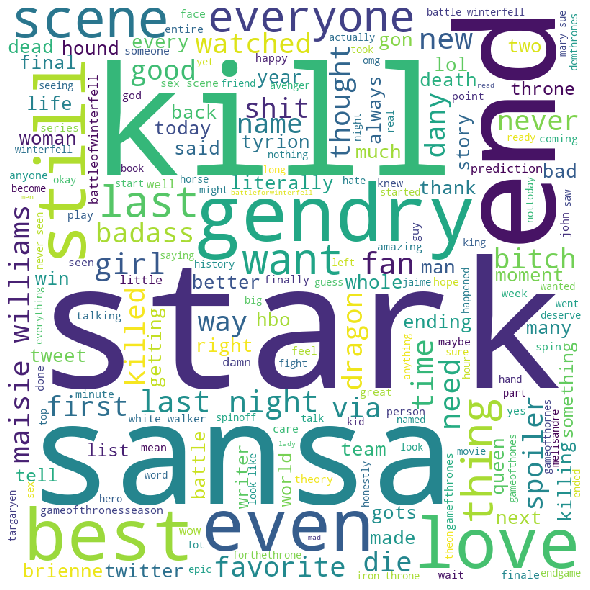

In [58]:
# splitting dataframe character wise
arya = character_tweet.loc[character_tweet.character=='arya']
jon = character_tweet.loc[character_tweet.character=='jon']
bran = character_tweet.loc[character_tweet.character=='bran']
cersei = character_tweet.loc[character_tweet.character=='cersei']
daenerys = character_tweet.loc[character_tweet.character=='daenerys']
night_king = character_tweet.loc[character_tweet.character=='night king']
#night_king_2 = character_tweet.loc[character_tweet.character=='night_king']

##################### creating word cloud to check if any further cleaning is required
# for arya

# forming wordcloud
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in arya.tweet: 
    val = str(val) 
    tokens = val.split()      
    for words in tokens: 
        comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 
 
# plot the WordCloud image 
print("Arya\n")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

Jon



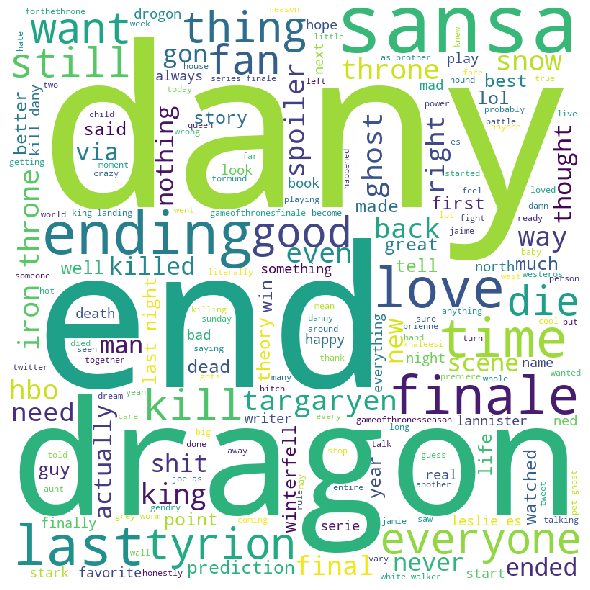

In [59]:
# for jon
print("Jon\n")
# forming wordcloud
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in jon.tweet: 
    val = str(val) 
    tokens = val.split()      
    for words in tokens: 
        comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 
 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 


Bran



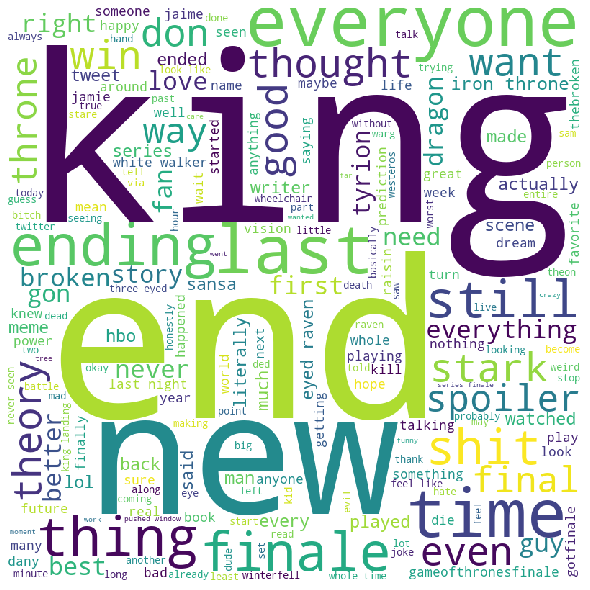

In [60]:
# for bran
print("Bran\n")
# forming wordcloud
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in bran.tweet: 
    val = str(val) 
    tokens = val.split()      
    for words in tokens: 
        comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 
 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

Cersei



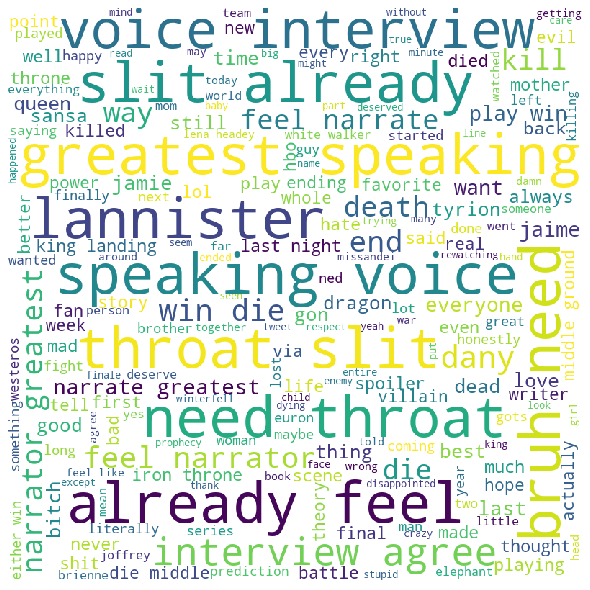

In [61]:
# for cersei
print("Cersei\n")
# forming wordcloud
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in cersei.tweet: 
    val = str(val) 
    tokens = val.split()      
    for words in tokens: 
        comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 
 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

Daenerys



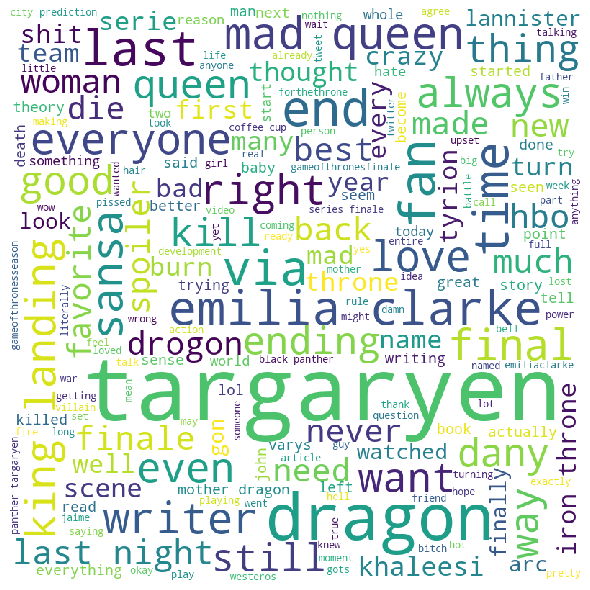

In [62]:
# for daenerys
print("Daenerys\n")
# forming wordcloud
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in daenerys.tweet: 
    val = str(val) 
    tokens = val.split()      
    for words in tokens: 
        comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 
 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

Night King



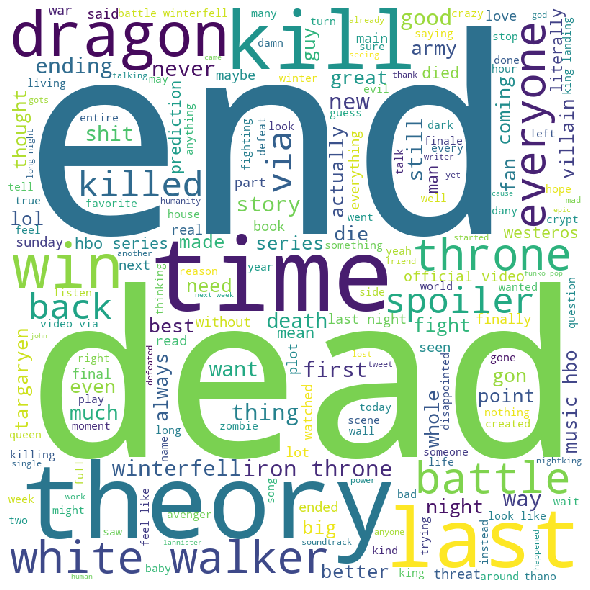

In [63]:
# for night_king
print("Night King\n")
# forming wordcloud
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in night_king.tweet: 
    val = str(val) 
    tokens = val.split()      
    for words in tokens: 
        comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 
 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) \
plt.axis("off") 
plt.tight_layout(pad = 0)

This gives a very good insight on words/phrases used by twitterati against majot characters. We will use these same words in the next section to perform sentiment analysis on these major characters.

## Sentiment Analysis

We will now use the the cleaned tweets dataframes produced on 6 major charcaters to analyse sentiments of twitterati against them.

In [64]:
sid_obj = SentimentIntensityAnalyzer() 

# VADER sentiment
character_tweet['VADER_score']=character_tweet.apply(lambda x : sid_obj.polarity_scores(str(x['lemmatised']))['compound'], axis =1  )
character_tweet['VADER_Polarity']=character_tweet.apply(lambda x : 'Negative' if x['VADER_score']< -0.05 else('Positive' if x['VADER_score']>0.05 else 'Neutral' ),axis=1 )

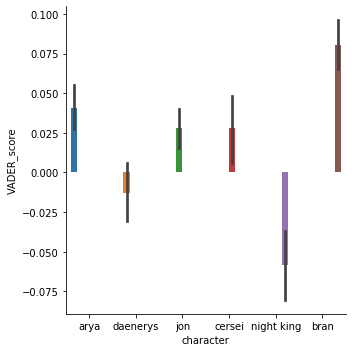

In [65]:
# overall sentiment_scores
import seaborn as sns
sns.catplot(x = 'character', y='VADER_score', hue = 'character',data=character_tweet, kind='bar')

We observed above that Night King has the highest median negative sentiment (or lowest sentiment) while Bran has the highest median postive sentiment. This goes with our understanding of characters and their respective positions in the show. 
Although, it is re-assuring to see it verified through data.

We will now visualize individual distribution of sentiments across characters to drill down into sentiments. Also, we will take a loot at the words/phrases which were most called out for each type of sentiment polarity for each character.

Bran



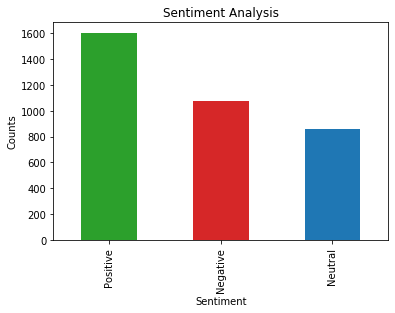

In [71]:
# character wise visuals 

# bran
print("Bran\n")
char = character_tweet.loc[character_tweet.character=='bran']
# sentiments
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
char['VADER_Polarity'].value_counts().plot(kind = 'bar', color=['C2', 'C3', 'C0'])
plt.show()

Jon



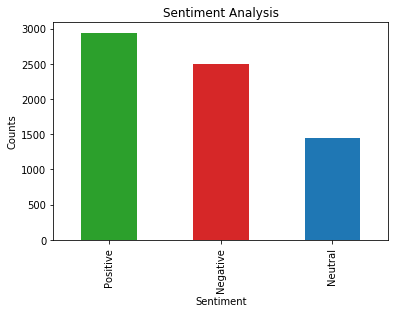

In [72]:
# Jon
print("Jon\n")
char = character_tweet.loc[character_tweet.character=='jon']
# sentiments
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
char['VADER_Polarity'].value_counts().plot(kind = 'bar', color=['C2', 'C3', 'C0'])
plt.show()

Arya



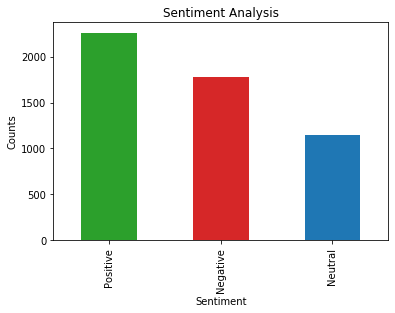

In [73]:
# arya
print("Arya\n")
char = character_tweet.loc[character_tweet.character=='arya']
# sentiments
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
char['VADER_Polarity'].value_counts().plot(kind = 'bar', color=['C2', 'C3', 'C0'])
plt.show()

Night King



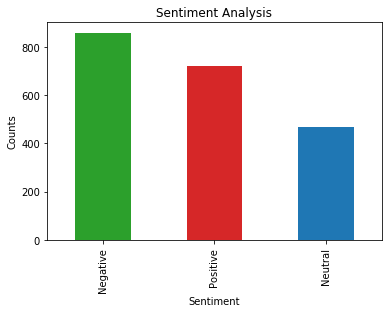

In [74]:
# Night King
print("Night King\n")
char = character_tweet.loc[character_tweet.character=='night king']
# sentiments
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
char['VADER_Polarity'].value_counts().plot(kind = 'bar', color=['C2', 'C3', 'C0'])
plt.show()

Cersei



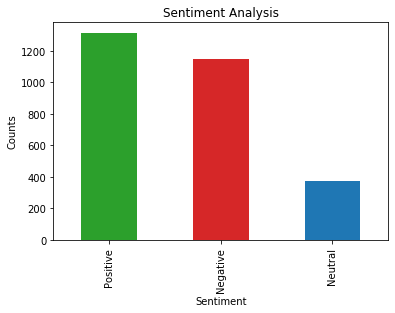

In [77]:
# cersei
print("Cersei\n")
char = character_tweet.loc[character_tweet.character=='cersei']
# sentiments
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
char['VADER_Polarity'].value_counts().plot(kind = 'bar', color=['C2', 'C3', 'C0'])
plt.show()

Daenerys



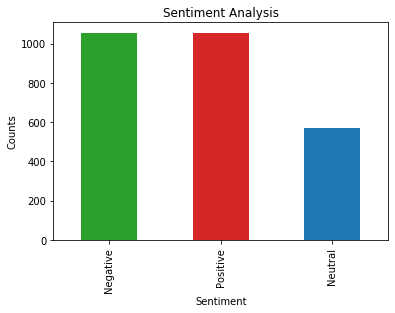

In [75]:
# daenerys
print("Daenerys\n")
char = character_tweet.loc[character_tweet.character=='daenerys']
# sentiments
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
char['VADER_Polarity'].value_counts().plot(kind = 'bar', color=['C2', 'C3', 'C0'])
plt.show()

From this drill down analysis following conclusions can be derived:
1. Danaerys Holds negative polarity from sentiment analysis
2. Jon Snow turns out to be polarizing character - Positive and negative sentiments are relatively equal
3. Arya comes out as strong lead character. Favourite, love and best depicts viewers’ likeability towards her. Most talked about character and she does not come out as polarizing.
4. Night King was showered with overwhelming negative sentiment.
5. Cersei showed a surprising behaviour - One would expect a swarm of negative tweets. But she gained sympathy in the last season.
6. Mixed set of sentiments. On one hand, viewers use words like good, ending while on the other hand, words like shit, ending are used.


